In [1]:
import numpy as np
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
#plt.style.use('ggplot')
%matplotlib inline 

In [2]:
data = pd.read_csv('new_composite_data')
data

dates       Xp       Yp       Hs       pp      mwdsn  \
0     2021-07-01 00:00:00  242.727  32.9626  0.73087  16.8800   7.760958   
1     2021-07-01 01:00:00  242.727  32.9626  0.73652  16.8615   7.726884   
2     2021-07-01 02:00:00  242.727  32.9626  0.73816  16.8487   7.749879   
3     2021-07-01 03:00:00  242.727  32.9626  0.73824  16.8354   7.771550   
4     2021-07-01 04:00:00  242.727  32.9626  0.73791  16.8229   7.797947   
...                   ...      ...      ...      ...      ...        ...   
3086  2021-11-06 14:00:00  242.727  32.9626  1.23583  12.9883  18.008702   
3087  2021-11-06 15:00:00  242.727  32.9626  1.21226  12.7324  17.906504   
3088  2021-11-06 16:00:00  242.727  32.9626  1.18647  12.5619  17.745607   
3089  2021-11-06 17:00:00  242.727  32.9626  1.15902  12.4407  17.502926   
3090  2021-11-06 18:00:00  242.727  32.9626  1.13109  12.3460  17.186024   

      origmwdsn     spread  origspread   level  probability  
0        14.463  10.042611     18.8150  0.5431         28.9  
1        14.342  10.361444     19.3516  0.5068         30.7  
2        14.369  10.388371     19.3809  0.3336         37.4  
3        14.409  10.371428     19.3473  0.2395         41.3  
4        14.462  10.272377     19.1618  0.1122         46.6  
...         ...        ...         ...     ...          ...  
3086     26.086   9.785429     13.9888  0.3064         84.0  
3087     26.202   9.918933     14.3218  0.6687         72.7  
3088     26.259  10.030990     14.6455  0.9448         60.8  
3089     26.213  10.101139     14.9268  1.0664         53.7  
3090     26.058  10.108915     15.1261  1.0037         54.1  

[3091 rows x 11 columns]

dates       Xp       Yp       Hs       pp      mwdsn  \
0     2021-07-01 00:00:00  242.727  32.9626  0.73087  16.8800   7.760958   
1     2021-07-01 01:00:00  242.727  32.9626  0.73652  16.8615   7.726884   
2     2021-07-01 02:00:00  242.727  32.9626  0.73816  16.8487   7.749879   
3     2021-07-01 03:00:00  242.727  32.9626  0.73824  16.8354   7.771550   
4     2021-07-01 04:00:00  242.727  32.9626  0.73791  16.8229   7.797947   
...                   ...      ...      ...      ...      ...        ...   
3086  2021-11-06 14:00:00  242.727  32.9626  1.23583  12.9883  18.008702   
3087  2021-11-06 15:00:00  242.727  32.9626  1.21226  12.7324  17.906504   
3088  2021-11-06 16:00:00  242.727  32.9626  1.18647  12.5619  17.745607   
3089  2021-11-06 17:00:00  242.727  32.9626  1.15902  12.4407  17.502926   
3090  2021-11-06 18:00:00  242.727  32.9626  1.13109  12.3460  17.186024   

      origmwdsn     spread  origspread   level  probability  
0        14.463  10.042611     18.8150  0.5431         28.9  
1        14.342  10.361444     19.3516  0.5068         30.7  
2        14.369  10.388371     19.3809  0.3336         37.4  
3        14.409  10.371428     19.3473  0.2395         41.3  
4        14.462  10.272377     19.1618  0.1122         46.6  
...         ...        ...         ...     ...          ...  
3086     26.086   9.785429     13.9888  0.3064         84.0  
3087     26.202   9.918933     14.3218  0.6687         72.7  
3088     26.259  10.030990     14.6455  0.9448         60.8  
3089     26.213  10.101139     14.9268  1.0664         53.7  
3090     26.058  10.108915     15.1261  1.0037         54.1  

[3091 rows x 11 columns]

In [3]:
dates = data['dates'].to_numpy()
Hs = data['Hs'].to_numpy()
pp = data['pp'].to_numpy()
mwdsn = data['mwdsn'].to_numpy()
origmwdsn = data['origmwdsn'].to_numpy()
spread = data['origspread'].to_numpy()
counterspread = data['spread'].to_numpy()
level = data['level'].to_numpy()
probability = data['probability'].to_numpy()/100

In [4]:
#Bathymetric speed parameterizations

gamma = 0.5
zbar = -1
zchan = -2
bathyspeed = []
type = []
diff = []
for i in range(len(Hs)):
    hbar = level[i] - zbar
    hchan = level[i] - zchan
    if Hs[i] < gamma*hbar:
        new = 0
        hsz = Hs[i]/gamma
        hnew = hsz - hbar
        bathyspeed.append(new)
        type.append(1)
        diff.append(hnew)
    elif Hs[i] >= gamma*hbar and Hs[i] <= gamma*hchan:
        hsz = Hs[i]/gamma
        hnew = hsz - hbar
        direction = mwdsn[i]*np.pi/180
        cosine = (np.cos(direction)**2)+0.5
        new = (2*9.8*(1/16)*(gamma**2)*cosine*hnew)**0.5
        bathyspeed.append(new)
        type.append(2)
        diff.append(hnew)
    elif Hs[i] > gamma*hchan:
        hsz = Hs[i]/gamma
        hnew = hchan - hbar
        direction = mwdsn[i]*np.pi/180
        cosine = (np.cos(direction)**2)+0.5
        new = (2*9.8*(1/16)*(gamma**2)*cosine*hnew)**0.5
        bathyspeed.append(new)
        type.append(3)
        diff.append(hnew)
    
bathyspeed

[0,
 0,
 0.2544940170059757,
 0.3279262425399201,
 0.40618705966475893,
 0.42744991976838936,
 0.42791815750746787,
 0.37073974426951345,
 0.31466048283630926,
 0.19680785452006616,
 0,
 0,
 0.11121342614407245,
 0.26482961123524473,
 0.42955663293959795,
 0.502696996879512,
 0.5712290508308885,
 0.6009273061116022,
 0.5944108646469279,
 0.5576196376221991,
 0.4644906978502395,
 0.30258359764085935,
 0,
 0,
 0,
 0,
 0,
 0.17744505337183666,
 0.344210609759191,
 0.42876851606145966,
 0.4831837543910484,
 0.49753651581835284,
 0.49405432315025277,
 0.4413871991556235,
 0.37355642009180146,
 0.34152829470183393,
 0.3223508030698621,
 0.35140047694498877,
 0.43570009352685984,
 0.4927073312423256,
 0.5614516137166581,
 0.6187311772786798,
 0.6480845276390749,
 0.6342530618186614,
 0.5978008179113921,
 0.5094681007349422,
 0.39653927879149936,
 0.2644798089138202,
 0.1068525125317409,
 0,
 0.17363684925341272,
 0.26784489044327453,
 0.3859286457464702,
 0.5080246633370057,
 0.59224701992628

[0,
 0,
 0.2544940170059757,
 0.3279262425399201,
 0.40618705966475893,
 0.42744991976838936,
 0.42791815750746787,
 0.37073974426951345,
 0.31466048283630926,
 0.19680785452006616,
 0,
 0,
 0.11121342614407245,
 0.26482961123524473,
 0.42955663293959795,
 0.502696996879512,
 0.5712290508308885,
 0.6009273061116022,
 0.5944108646469279,
 0.5576196376221991,
 0.4644906978502395,
 0.30258359764085935,
 0,
 0,
 0,
 0,
 0,
 0.17744505337183666,
 0.344210609759191,
 0.42876851606145966,
 0.4831837543910484,
 0.49753651581835284,
 0.49405432315025277,
 0.4413871991556235,
 0.37355642009180146,
 0.34152829470183393,
 0.3223508030698621,
 0.35140047694498877,
 0.43570009352685984,
 0.4927073312423256,
 0.5614516137166581,
 0.6187311772786798,
 0.6480845276390749,
 0.6342530618186614,
 0.5978008179113921,
 0.5094681007349422,
 0.39653927879149936,
 0.2644798089138202,
 0.1068525125317409,
 0,
 0.17363684925341272,
 0.26784489044327453,
 0.3859286457464702,
 0.5080246633370057,
 0.59224701992628

In [5]:
#Calculating suppression factor

beta = 0.5
alpha = 0.025
gamma = 0.5
C_d = 0.0033
F_v = []
v_A = []
eta = []
a = []

for i in range(len(Hs)):
    direction = mwdsn[i]*np.pi/180
    hbar = level[i] - zbar
    limit = gamma*hbar
    if Hs[i] < limit:
        use = 5**0.5/32*(C_d)**-0.5*alpha**0.5*gamma**0.5*(9.8*Hs[i]*np.sin(direction))**0.5
        if use == np.nan:
            use = 0
    elif Hs[i] >= limit:
        use = 5**0.5/32*(C_d)**-0.5*alpha**0.5*gamma**0.5*(9.8*limit*np.sin(direction))**0.5
        if use == np.nan:
            use = 0
    v_A.append(use)
    

for i in range(len(Hs)):
    hbar = level[i] - zbar
    hchan = level[i] - zchan
    if Hs[i] < gamma*hbar:
        new = 0
        eta.append(new)
    elif Hs[i] >= gamma*hbar and Hs[i] <= gamma*hchan:
        hsz = Hs[i]/gamma
        hnew = hsz - hbar
        direction = mwdsn[i]*np.pi/180
        cosine = (np.cos(direction)**2)+0.5
        new = (1/16)*(gamma**2)*cosine*hnew
        eta.append(new)
    elif Hs[i] > gamma*hchan:
        hsz = Hs[i]/gamma
        hnew = hchan - hbar
        direction = mwdsn[i]*np.pi/180
        cosine = (np.cos(direction)**2)+0.5
        new = (1/16)*(gamma**2)*cosine*hnew
        eta.append(new)
    a.append(v_A[i]/(2*9.8*eta[i])**0.5)
    
for i in range(len(Hs)):
    use = (1+(beta*a[i])**2)**0.5-beta*a[i]
    F_v.append(use)
        
F_v = [1 if pd.isna(x) else x for x in F_v]

F_v

C:\Users\audre\AppData\Local\Temp\ipykernel_20040\370447331.py:21: RuntimeWarning: invalid value encountered in double_scalars
  use = 5**0.5/32*(C_d)**-0.5*alpha**0.5*gamma**0.5*(9.8*limit*np.sin(direction))**0.5
C:\Users\audre\AppData\Local\Temp\ipykernel_20040\370447331.py:47: RuntimeWarning: divide by zero encountered in double_scalars
  a.append(v_A[i]/(2*9.8*eta[i])**0.5)
C:\Users\audre\AppData\Local\Temp\ipykernel_20040\370447331.py:50: RuntimeWarning: invalid value encountered in double_scalars
  use = (1+(beta*a[i])**2)**0.5-beta*a[i]
C:\Users\audre\AppData\Local\Temp\ipykernel_20040\370447331.py:21: RuntimeWarning: invalid value encountered in double_scalars
  use = 5**0.5/32*(C_d)**-0.5*alpha**0.5*gamma**0.5*(9.8*limit*np.sin(direction))**0.5
C:\Users\audre\AppData\Local\Temp\ipykernel_20040\370447331.py:47: RuntimeWarning: divide by zero encountered in double_scalars
  a.append(v_A[i]/(2*9.8*eta[i])**0.5)
C:\Users\audre\AppData\Local\Temp\ipykernel_20040\370447331.py:50: Ru

[1,
 1,
 0.7801565767497578,
 0.8295832591312916,
 0.8663540302603112,
 0.874825739703919,
 0.8765969567117464,
 0.8536944102470404,
 0.8264732409294,
 0.7310226881567631,
 1,
 1,
 0.587844025112629,
 0.8016584575667245,
 0.8846369985714218,
 0.9080238076670327,
 0.926434614030024,
 0.9339614522558835,
 0.9331352198156206,
 0.9239530276843582,
 0.8986949780743713,
 0.8313276581247476,
 1,
 1,
 1,
 1,
 1,
 0.6986070331707026,
 0.8367893378671434,
 0.8722881839037518,
 0.8910846996453314,
 0.8937146997440263,
 0.8907934667853834,
 0.8706171009950344,
 0.8400448504198241,
 0.8217900494779405,
 0.8106213462442204,
 0.8245854671254707,
 0.8616038265252096,
 0.8808004771217074,
 0.9008853172122678,
 0.9158634596215385,
 0.923879094753473,
 0.9192674207554526,
 0.9085808931448385,
 0.8810551695741078,
 0.8357909686989236,
 0.75037251049806,
 0.4998024407880012,
 1,
 0.6382362831286452,
 0.747493418244068,
 0.823268452909729,
 0.8717274627149693,
 0.897212495213968,
 0.9098601073140442,
 0.916

[1,
 1,
 0.7801565767497578,
 0.8295832591312916,
 0.8663540302603112,
 0.874825739703919,
 0.8765969567117464,
 0.8536944102470404,
 0.8264732409294,
 0.7310226881567631,
 1,
 1,
 0.587844025112629,
 0.8016584575667245,
 0.8846369985714218,
 0.9080238076670327,
 0.926434614030024,
 0.9339614522558835,
 0.9331352198156206,
 0.9239530276843582,
 0.8986949780743713,
 0.8313276581247476,
 1,
 1,
 1,
 1,
 1,
 0.6986070331707026,
 0.8367893378671434,
 0.8722881839037518,
 0.8910846996453314,
 0.8937146997440263,
 0.8907934667853834,
 0.8706171009950344,
 0.8400448504198241,
 0.8217900494779405,
 0.8106213462442204,
 0.8245854671254707,
 0.8616038265252096,
 0.8808004771217074,
 0.9008853172122678,
 0.9158634596215385,
 0.923879094753473,
 0.9192674207554526,
 0.9085808931448385,
 0.8810551695741078,
 0.8357909686989236,
 0.75037251049806,
 0.4998024407880012,
 1,
 0.6382362831286452,
 0.747493418244068,
 0.823268452909729,
 0.8717274627149693,
 0.897212495213968,
 0.9098601073140442,
 0.916

In [6]:
#Incorporating suppression factor

for i in range(len(bathyspeed)):
    bathyspeed[i] = F_v[i]*bathyspeed[i]   

In [7]:
#checking channel depth influence
max(bathyspeed)

0.6757880876965259

0.6757880876965259

In [8]:
#Transient speed parameterizations

gamma = 0.5
Dr = .3
directional_spread = spread*3.14/180
square_root = (9.8*Hs/gamma)**0.5
steepness = (Hs)/(((9.8*Hs/gamma)**0.5)*pp)

parentheses = (1+70*steepness)


dates = data['dates']
transspeed = 0.03*directional_spread*square_root*parentheses*(1/Dr)

transspeed

array([0.22370315, 0.23148009, 0.2322824 , ..., 0.29211412, 0.29391916,
       0.29346032])

array([0.22370315, 0.23148009, 0.2322824 , ..., 0.29211412, 0.29391916,
       0.29346032])

In [9]:
#checking general timeseries stats
import statistics
max(transspeed)
min(transspeed)
sum(probability)/len(probability)
res = statistics.pstdev(probability) 
print(res)
sum(transspeed)/len(transspeed)

0.24573468603496745
0.24573468603496745


0.2818841521995871

0.2818841521995871

In [10]:
combinedspeed = transspeed + bathyspeed
print(combinedspeed)

[0.22370315 0.23148009 0.43082758 ... 0.62111493 0.52555232 0.53153747]
[0.22370315 0.23148009 0.43082758 ... 0.62111493 0.52555232 0.53153747]


In [11]:
data.insert(11, "bathyspeed", bathyspeed)
data.insert(12, "transspeed", transspeed)
data.insert(13, "combinedspeed", combinedspeed)
data

dates       Xp       Yp       Hs       pp      mwdsn  \
0     2021-07-01 00:00:00  242.727  32.9626  0.73087  16.8800   7.760958   
1     2021-07-01 01:00:00  242.727  32.9626  0.73652  16.8615   7.726884   
2     2021-07-01 02:00:00  242.727  32.9626  0.73816  16.8487   7.749879   
3     2021-07-01 03:00:00  242.727  32.9626  0.73824  16.8354   7.771550   
4     2021-07-01 04:00:00  242.727  32.9626  0.73791  16.8229   7.797947   
...                   ...      ...      ...      ...      ...        ...   
3086  2021-11-06 14:00:00  242.727  32.9626  1.23583  12.9883  18.008702   
3087  2021-11-06 15:00:00  242.727  32.9626  1.21226  12.7324  17.906504   
3088  2021-11-06 16:00:00  242.727  32.9626  1.18647  12.5619  17.745607   
3089  2021-11-06 17:00:00  242.727  32.9626  1.15902  12.4407  17.502926   
3090  2021-11-06 18:00:00  242.727  32.9626  1.13109  12.3460  17.186024   

      origmwdsn     spread  origspread   level  probability  bathyspeed  \
0        14.463  10.042611     18.8150  0.5431         28.9    0.000000   
1        14.342  10.361444     19.3516  0.5068         30.7    0.000000   
2        14.369  10.388371     19.3809  0.3336         37.4    0.198545   
3        14.409  10.371428     19.3473  0.2395         41.3    0.272042   
4        14.462  10.272377     19.1618  0.1122         46.6    0.351902   
...         ...        ...         ...     ...          ...         ...   
3086     26.086   9.785429     13.9888  0.3064         84.0    0.567102   
3087     26.202   9.918933     14.3218  0.6687         72.7    0.472655   
3088     26.259  10.030990     14.6455  0.9448         60.8    0.329001   
3089     26.213  10.101139     14.9268  1.0664         53.7    0.231633   
3090     26.058  10.108915     15.1261  1.0037         54.1    0.238077   

      transspeed  combinedspeed  
0       0.223703       0.223703  
1       0.231480       0.231480  
2       0.232282       0.430828  
3       0.231980       0.504022  
4       0.229757       0.581659  
...          ...            ...  
3086    0.282634       0.849736  
3087    0.288291       0.760945  
3088    0.292114       0.621115  
3089    0.293919       0.525552  
3090    0.293460       0.531537  

[3091 rows x 14 columns]

dates       Xp       Yp       Hs       pp      mwdsn  \
0     2021-07-01 00:00:00  242.727  32.9626  0.73087  16.8800   7.760958   
1     2021-07-01 01:00:00  242.727  32.9626  0.73652  16.8615   7.726884   
2     2021-07-01 02:00:00  242.727  32.9626  0.73816  16.8487   7.749879   
3     2021-07-01 03:00:00  242.727  32.9626  0.73824  16.8354   7.771550   
4     2021-07-01 04:00:00  242.727  32.9626  0.73791  16.8229   7.797947   
...                   ...      ...      ...      ...      ...        ...   
3086  2021-11-06 14:00:00  242.727  32.9626  1.23583  12.9883  18.008702   
3087  2021-11-06 15:00:00  242.727  32.9626  1.21226  12.7324  17.906504   
3088  2021-11-06 16:00:00  242.727  32.9626  1.18647  12.5619  17.745607   
3089  2021-11-06 17:00:00  242.727  32.9626  1.15902  12.4407  17.502926   
3090  2021-11-06 18:00:00  242.727  32.9626  1.13109  12.3460  17.186024   

      origmwdsn     spread  origspread   level  probability  bathyspeed  \
0        14.463  10.042611     18.8150  0.5431         28.9    0.000000   
1        14.342  10.361444     19.3516  0.5068         30.7    0.000000   
2        14.369  10.388371     19.3809  0.3336         37.4    0.198545   
3        14.409  10.371428     19.3473  0.2395         41.3    0.272042   
4        14.462  10.272377     19.1618  0.1122         46.6    0.351902   
...         ...        ...         ...     ...          ...         ...   
3086     26.086   9.785429     13.9888  0.3064         84.0    0.567102   
3087     26.202   9.918933     14.3218  0.6687         72.7    0.472655   
3088     26.259  10.030990     14.6455  0.9448         60.8    0.329001   
3089     26.213  10.101139     14.9268  1.0664         53.7    0.231633   
3090     26.058  10.108915     15.1261  1.0037         54.1    0.238077   

      transspeed  combinedspeed  
0       0.223703       0.223703  
1       0.231480       0.231480  
2       0.232282       0.430828  
3       0.231980       0.504022  
4       0.229757       0.581659  
...          ...            ...  
3086    0.282634       0.849736  
3087    0.288291       0.760945  
3088    0.292114       0.621115  
3089    0.293919       0.525552  
3090    0.293460       0.531537  

[3091 rows x 14 columns]

In [12]:
july = data[0:750]
august = data[750:1498]
september = data[1498:2175]
october = data[2175:2924]
november = data[2934:]

In [13]:
#max of both speeds 

maxspeed = []

for i in range(len(bathyspeed)):
    if bathyspeed[i] >= transspeed[i]:
        maxspeed.append(bathyspeed[i])
    elif transspeed[i] > bathyspeed[i]:
        maxspeed.append(transspeed[i])

print(maxspeed)

[0.2237031450058502, 0.23148009240384973, 0.23228240285036517, 0.27204212104094533, 0.3519017961801494, 0.37394419224776204, 0.3751117545927441, 0.3164984473393009, 0.26005846904213437, 0.20837465765233631, 0.20674339001801886, 0.20477572305762187, 0.1926301178352226, 0.2123028976608416, 0.3800016904801318, 0.4564608412093169, 0.5292063652292511, 0.5612429395162077, 0.5546657128431043, 0.5152143524772855, 0.4174354575202704, 0.2515461136137365, 0.19488937505439827, 0.2081214583067549, 0.19550648704833334, 0.21183595634328395, 0.22205161191785136, 0.23259472629132555, 0.2880317682272391, 0.3740097101903573, 0.4305576506550509, 0.4446556978462882, 0.4401003632993198, 0.38427924374518685, 0.31380414703938236, 0.2806645542011368, 0.26130444194739716, 0.28975972642979675, 0.37540086780013415, 0.4339768524396035, 0.5058035151224712, 0.5666732765981591, 0.5987517467189206, 0.5830481762442895, 0.5431504010606476, 0.44886950388562313, 0.33142394794831975, 0.2839712398718865, 0.27309304417694863

In [14]:
lifeguard = pd.read_csv('Salt Creek - SaltCreekRipReports.csv')
lifeguard = lifeguard[66:136]
lifeguard = lifeguard.reset_index()
lifeguard

index            Timestamp Observation Date Observation Time  \
0      66    7/1/2021 19:41:20         7/1/2021       4:00:00 PM   
1      67    7/2/2021 19:55:33         7/2/2021       5:00:00 PM   
2      68    7/3/2021 18:48:05         7/3/2021       3:46:00 PM   
3      69    7/6/2021 19:52:33         7/6/2021       4:49:00 PM   
4      70    7/8/2021 18:57:29         7/8/2021       4:00:00 PM   
..    ...                  ...              ...              ...   
65    131  10/26/2021 21:10:16       10/26/2021       3:30:00 PM   
66    132  10/30/2021 16:38:21       10/30/2021       1:37:00 PM   
67    133   11/2/2021 21:16:15        11/2/2021       3:00:00 PM   
68    134   11/4/2021 19:10:32        11/4/2021       4:10:00 PM   
69    135   11/5/2021 20:57:53        11/5/2021       6:00:00 PM   

   Observation Date + Time  Rip Current Activity  \
0      7/1/2021 4:00:00 PM                   NaN   
1      7/2/2021 5:00:00 PM                   NaN   
2      7/3/2021 3:46:00 PM                   NaN   
3      7/6/2021 4:49:00 PM                   NaN   
4      7/8/2021 4:00:00 PM                   NaN   
..                     ...                   ...   
65   10/26/2021 3:30:00 PM                   NaN   
66   10/30/2021 1:37:00 PM                   NaN   
67    11/2/2021 3:00:00 PM                   NaN   
68    11/4/2021 4:10:00 PM                   NaN   
69    11/5/2021 6:00:00 PM                   NaN   

    Rip Strength (within 1 hour of observation time) [Salt Creek Beach]  \
0                                                 3.0                     
1                                                 2.0                     
2                                                 2.0                     
3                                                 3.0                     
4                                                 3.0                     
..                                                ...                     
65                                                3.0                     
66                                                1.0                     
67                                                2.0                     
68                                                2.0                     
69                                                3.0                     

    Rip Presence  \
0              1   
1              1   
2              1   
3              1   
4              1   
..           ...   
65             1   
66             0   
67             1   
68             1   
69             1   

    Rip Strength (within 1 hour of observation time) [Strand Beach]  \
0                                                 2.0                 
1                                                 2.0                 
2                                                 2.0                 
3                                                 2.0                 
4                                                 2.0                 
..                                                ...                 
65                                                3.0                 
66                                                1.0                 
67                                                0.0                 
68                                                1.0                 
69                                                2.0                 

    Rip Behavior ("0" if rips are listed above as not present or unknown) [Salt Creek Beach]  \
0                                                 1.0                                          
1                                                 1.0                                          
2                                                 1.0                                          
3                                                 1.0                                          
4                                                 2.0                                  

index            Timestamp Observation Date Observation Time  \
0      66    7/1/2021 19:41:20         7/1/2021       4:00:00 PM   
1      67    7/2/2021 19:55:33         7/2/2021       5:00:00 PM   
2      68    7/3/2021 18:48:05         7/3/2021       3:46:00 PM   
3      69    7/6/2021 19:52:33         7/6/2021       4:49:00 PM   
4      70    7/8/2021 18:57:29         7/8/2021       4:00:00 PM   
..    ...                  ...              ...              ...   
65    131  10/26/2021 21:10:16       10/26/2021       3:30:00 PM   
66    132  10/30/2021 16:38:21       10/30/2021       1:37:00 PM   
67    133   11/2/2021 21:16:15        11/2/2021       3:00:00 PM   
68    134   11/4/2021 19:10:32        11/4/2021       4:10:00 PM   
69    135   11/5/2021 20:57:53        11/5/2021       6:00:00 PM   

   Observation Date + Time  Rip Current Activity  \
0      7/1/2021 4:00:00 PM                   NaN   
1      7/2/2021 5:00:00 PM                   NaN   
2      7/3/2021 3:46:00 PM                   NaN   
3      7/6/2021 4:49:00 PM                   NaN   
4      7/8/2021 4:00:00 PM                   NaN   
..                     ...                   ...   
65   10/26/2021 3:30:00 PM                   NaN   
66   10/30/2021 1:37:00 PM                   NaN   
67    11/2/2021 3:00:00 PM                   NaN   
68    11/4/2021 4:10:00 PM                   NaN   
69    11/5/2021 6:00:00 PM                   NaN   

    Rip Strength (within 1 hour of observation time) [Salt Creek Beach]  \
0                                                 3.0                     
1                                                 2.0                     
2                                                 2.0                     
3                                                 3.0                     
4                                                 3.0                     
..                                                ...                     
65                                                3.0                     
66                                                1.0                     
67                                                2.0                     
68                                                2.0                     
69                                                3.0                     

    Rip Presence  \
0              1   
1              1   
2              1   
3              1   
4              1   
..           ...   
65             1   
66             0   
67             1   
68             1   
69             1   

    Rip Strength (within 1 hour of observation time) [Strand Beach]  \
0                                                 2.0                 
1                                                 2.0                 
2                                                 2.0                 
3                                                 2.0                 
4                                                 2.0                 
..                                                ...                 
65                                                3.0                 
66                                                1.0                 
67                                                0.0                 
68                                                1.0                 
69                                                2.0                 

    Rip Behavior ("0" if rips are listed above as not present or unknown) [Salt Creek Beach]  \
0                                                 1.0                                          
1                                                 1.0                                          
2                                                 1.0                                          
3                                                 1.0                                          
4                                                 2.0                                  

In [15]:
timestamps = lifeguard['Observation Date + Time'].to_numpy()
observations = []
for i in range(len(timestamps)):
    new = datetime.strptime(timestamps[i], '%m/%d/%Y %I:%M:%S %p')
    observations.append(new)
print(observations)

lifeguard.insert(18, "observations", observations)
lifeguard

[datetime.datetime(2021, 7, 1, 16, 0), datetime.datetime(2021, 7, 2, 17, 0), datetime.datetime(2021, 7, 3, 15, 46), datetime.datetime(2021, 7, 6, 16, 49), datetime.datetime(2021, 7, 8, 16, 0), datetime.datetime(2021, 7, 9, 16, 40), datetime.datetime(2021, 7, 10, 16, 0), datetime.datetime(2021, 7, 14, 10, 0), datetime.datetime(2021, 7, 16, 6, 0), datetime.datetime(2021, 7, 18, 8, 22), datetime.datetime(2021, 7, 18, 8, 0), datetime.datetime(2021, 7, 24, 22, 0), datetime.datetime(2021, 7, 26, 8, 0), datetime.datetime(2021, 7, 28, 6, 40), datetime.datetime(2021, 7, 30, 17, 0), datetime.datetime(2021, 7, 31, 17, 0), datetime.datetime(2021, 7, 31, 18, 51), datetime.datetime(2021, 8, 13, 18, 0), datetime.datetime(2021, 8, 15, 13, 0), datetime.datetime(2021, 8, 16, 18, 31), datetime.datetime(2021, 8, 17, 15, 0), datetime.datetime(2021, 8, 18, 18, 0), datetime.datetime(2021, 8, 19, 17, 30), datetime.datetime(2021, 8, 20, 16, 0), datetime.datetime(2021, 8, 21, 10, 0), datetime.datetime(2021, 8, 

index            Timestamp Observation Date Observation Time  \
0      66    7/1/2021 19:41:20         7/1/2021       4:00:00 PM   
1      67    7/2/2021 19:55:33         7/2/2021       5:00:00 PM   
2      68    7/3/2021 18:48:05         7/3/2021       3:46:00 PM   
3      69    7/6/2021 19:52:33         7/6/2021       4:49:00 PM   
4      70    7/8/2021 18:57:29         7/8/2021       4:00:00 PM   
..    ...                  ...              ...              ...   
65    131  10/26/2021 21:10:16       10/26/2021       3:30:00 PM   
66    132  10/30/2021 16:38:21       10/30/2021       1:37:00 PM   
67    133   11/2/2021 21:16:15        11/2/2021       3:00:00 PM   
68    134   11/4/2021 19:10:32        11/4/2021       4:10:00 PM   
69    135   11/5/2021 20:57:53        11/5/2021       6:00:00 PM   

   Observation Date + Time  Rip Current Activity  \
0      7/1/2021 4:00:00 PM                   NaN   
1      7/2/2021 5:00:00 PM                   NaN   
2      7/3/2021 3:46:00 PM                   NaN   
3      7/6/2021 4:49:00 PM                   NaN   
4      7/8/2021 4:00:00 PM                   NaN   
..                     ...                   ...   
65   10/26/2021 3:30:00 PM                   NaN   
66   10/30/2021 1:37:00 PM                   NaN   
67    11/2/2021 3:00:00 PM                   NaN   
68    11/4/2021 4:10:00 PM                   NaN   
69    11/5/2021 6:00:00 PM                   NaN   

    Rip Strength (within 1 hour of observation time) [Salt Creek Beach]  \
0                                                 3.0                     
1                                                 2.0                     
2                                                 2.0                     
3                                                 3.0                     
4                                                 3.0                     
..                                                ...                     
65                                                3.0                     
66                                                1.0                     
67                                                2.0                     
68                                                2.0                     
69                                                3.0                     

    Rip Presence  \
0              1   
1              1   
2              1   
3              1   
4              1   
..           ...   
65             1   
66             0   
67             1   
68             1   
69             1   

    Rip Strength (within 1 hour of observation time) [Strand Beach]  \
0                                                 2.0                 
1                                                 2.0                 
2                                                 2.0                 
3                                                 2.0                 
4                                                 2.0                 
..                                                ...                 
65                                                3.0                 
66                                                1.0                 
67                                                0.0                 
68                                                1.0                 
69                                                2.0                 

    Rip Behavior ("0" if rips are listed above as not present or unknown) [Salt Creek Beach]  \
0                                                 1.0                                          
1                                                 1.0                                          
2                                                 1.0                                          
3                                                 1.0                                          
4                                                 2.0                                  

[datetime.datetime(2021, 7, 1, 16, 0), datetime.datetime(2021, 7, 2, 17, 0), datetime.datetime(2021, 7, 3, 15, 46), datetime.datetime(2021, 7, 6, 16, 49), datetime.datetime(2021, 7, 8, 16, 0), datetime.datetime(2021, 7, 9, 16, 40), datetime.datetime(2021, 7, 10, 16, 0), datetime.datetime(2021, 7, 14, 10, 0), datetime.datetime(2021, 7, 16, 6, 0), datetime.datetime(2021, 7, 18, 8, 22), datetime.datetime(2021, 7, 18, 8, 0), datetime.datetime(2021, 7, 24, 22, 0), datetime.datetime(2021, 7, 26, 8, 0), datetime.datetime(2021, 7, 28, 6, 40), datetime.datetime(2021, 7, 30, 17, 0), datetime.datetime(2021, 7, 31, 17, 0), datetime.datetime(2021, 7, 31, 18, 51), datetime.datetime(2021, 8, 13, 18, 0), datetime.datetime(2021, 8, 15, 13, 0), datetime.datetime(2021, 8, 16, 18, 31), datetime.datetime(2021, 8, 17, 15, 0), datetime.datetime(2021, 8, 18, 18, 0), datetime.datetime(2021, 8, 19, 17, 30), datetime.datetime(2021, 8, 20, 16, 0), datetime.datetime(2021, 8, 21, 10, 0), datetime.datetime(2021, 8, 

index            Timestamp Observation Date Observation Time  \
0      66    7/1/2021 19:41:20         7/1/2021       4:00:00 PM   
1      67    7/2/2021 19:55:33         7/2/2021       5:00:00 PM   
2      68    7/3/2021 18:48:05         7/3/2021       3:46:00 PM   
3      69    7/6/2021 19:52:33         7/6/2021       4:49:00 PM   
4      70    7/8/2021 18:57:29         7/8/2021       4:00:00 PM   
..    ...                  ...              ...              ...   
65    131  10/26/2021 21:10:16       10/26/2021       3:30:00 PM   
66    132  10/30/2021 16:38:21       10/30/2021       1:37:00 PM   
67    133   11/2/2021 21:16:15        11/2/2021       3:00:00 PM   
68    134   11/4/2021 19:10:32        11/4/2021       4:10:00 PM   
69    135   11/5/2021 20:57:53        11/5/2021       6:00:00 PM   

   Observation Date + Time  Rip Current Activity  \
0      7/1/2021 4:00:00 PM                   NaN   
1      7/2/2021 5:00:00 PM                   NaN   
2      7/3/2021 3:46:00 PM                   NaN   
3      7/6/2021 4:49:00 PM                   NaN   
4      7/8/2021 4:00:00 PM                   NaN   
..                     ...                   ...   
65   10/26/2021 3:30:00 PM                   NaN   
66   10/30/2021 1:37:00 PM                   NaN   
67    11/2/2021 3:00:00 PM                   NaN   
68    11/4/2021 4:10:00 PM                   NaN   
69    11/5/2021 6:00:00 PM                   NaN   

    Rip Strength (within 1 hour of observation time) [Salt Creek Beach]  \
0                                                 3.0                     
1                                                 2.0                     
2                                                 2.0                     
3                                                 3.0                     
4                                                 3.0                     
..                                                ...                     
65                                                3.0                     
66                                                1.0                     
67                                                2.0                     
68                                                2.0                     
69                                                3.0                     

    Rip Presence  \
0              1   
1              1   
2              1   
3              1   
4              1   
..           ...   
65             1   
66             0   
67             1   
68             1   
69             1   

    Rip Strength (within 1 hour of observation time) [Strand Beach]  \
0                                                 2.0                 
1                                                 2.0                 
2                                                 2.0                 
3                                                 2.0                 
4                                                 2.0                 
..                                                ...                 
65                                                3.0                 
66                                                1.0                 
67                                                0.0                 
68                                                1.0                 
69                                                2.0                 

    Rip Behavior ("0" if rips are listed above as not present or unknown) [Salt Creek Beach]  \
0                                                 1.0                                          
1                                                 1.0                                          
2                                                 1.0                                          
3                                                 1.0                                          
4                                                 2.0                                  

In [16]:
use = data['dates'].to_numpy()
dates = [0]*len(use)
for i in range(len(use)):
    dates[i] = use[i]
observations = lifeguard['observations'].to_numpy()
dates = pd.to_datetime(dates)
observations = pd.to_datetime(observations)
print(len(dates))
print(len(observations))


lifeguardprobabilities = []
lifeguardbathyspeed = []
lifeguardtransspeed = []
indices = []
for i in range(0, len(observations)):
    time = observations[i]
    for i in range(0, 3091):
        if dates[i] <= time and time < dates[i+1]:
            if i == len(dates):
                lifeguardprobabilities.append(probability[i]) 
                lifeguardbathyspeed.append(bathyspeed[i])
                lifeguardtransspeed.append(transspeed[i])
                indices.append(i) 
            elif (dates[i] - time) < (dates[i+1]-time):
                lifeguardprobabilities.append(probability[i]) 
                lifeguardbathyspeed.append(bathyspeed[i])
                lifeguardtransspeed.append(transspeed[i])
                indices.append(i)
            elif (dates[i]-time) > (dates[i+1]-time):
                lifeguardprobabilities.append(probability[i+1])
                lifeguardbathyspeed.append(bathyspeed[i])
                lifeguardtransspeed.append(transspeed[i])
                indices.append(i)
            else:
                lifeguardprobabilities.append(probability[i])  
                lifeguardbathyspeed.append(bathyspeed[i])
                lifeguardtransspeed.append(transspeed[i])
                indices.append(i)
print(lifeguardprobabilities)
print(indices)
lifeguard.insert(19, "probabilities", lifeguardprobabilities)
lifeguard.insert(20, "lgbathyspeed", lifeguardbathyspeed)
lifeguard.insert(21, "lgtransspeed", lifeguardtransspeed)

3091
70
3091
70
[0.49200000000000005, 0.608, 0.507, 0.68, 0.698, 0.54, 0.41200000000000003, 0.12300000000000001, 0.145, 0.433, 0.433, 0.32799999999999996, 0.046, 0.221, 0.542, 0.426, 0.377, 0.205, 0.564, 0.40700000000000003, 0.265, 0.46299999999999997, 0.43200000000000005, 0.415, 0.8909999999999999, 0.336, 0.615, 0.239, 0.106, 0.221, 0.632, 0.11199999999999999, 0.076, 0.081, 0.066, 0.6829999999999999, 0.685, 0.496, 0.258, 0.138, 0.174, 0.61, 0.17800000000000002, 0.579, 0.122, 0.248, 0.37799999999999995, 0.746, 0.303, 0.28, 0.26, 0.245, 0.142, 0.282, 0.601, 0.8170000000000001, 0.44799999999999995, 0.10800000000000001, 0.11599999999999999, 0.34700000000000003, 0.6, 0.32, 0.828, 0.575, 0.446, 0.9520000000000001, 0.16399999999999998, 0.24600000000000002, 0.165, 0.6709999999999999]
[16, 41, 63, 136, 184, 208, 232, 322, 366, 416, 416, 574, 608, 654, 713, 737, 738, 1050, 1093, 1122, 1143, 1170, 1193, 1216, 1234, 1287, 1383, 1410, 1528, 1554, 1621, 1648, 1675, 1698, 1722, 1769, 1794, 1842, 189

In [17]:
behavior = lifeguard['Rip Behavior ("0" if rips are listed above as not present or unknown) [Salt Creek Beach]'].to_numpy()
strength = lifeguard['Rip Strength (within 1 hour of observation time) [Salt Creek Beach]'].to_numpy()
riptype = [np.nan]*len(dates)
ripstrength = [np.nan]*len(dates)
transindices = []
bathyindices = []

for i in range(len(indices)):
    index = indices[i]
    use = behavior[i]
    new = strength[i]
    riptype[index] = use
    ripstrength[index] = new
    
bathytype = []
transtype = []
bathystrength = []
transstrength = []
    
for i in range(len(riptype)):
    if riptype[i] == 1:
        bathytype.append(probability[i])
        bathystrength.append(ripstrength[i])
        bathyindices.append(i)
    else:
        bathytype.append(np.nan)
        bathystrength.append(np.nan)
        
for i in range(len(riptype)):
    if riptype[i] == 2:
        transtype.append(probability[i])
        transstrength.append(ripstrength[i])
        transindices.append(i)
    else:
        transtype.append(np.nan)
        transstrength.append(np.nan)
                

data.insert(14, "riptype", riptype)
data.insert(15, "ripstrength", ripstrength)
data.insert(16, "bathytype", bathytype)
data.insert(17, "transtype", transtype)
data.insert(18, "bathystrength", bathystrength)
data.insert(19, "transstrength", transstrength)


data

dates       Xp       Yp       Hs       pp      mwdsn  \
0     2021-07-01 00:00:00  242.727  32.9626  0.73087  16.8800   7.760958   
1     2021-07-01 01:00:00  242.727  32.9626  0.73652  16.8615   7.726884   
2     2021-07-01 02:00:00  242.727  32.9626  0.73816  16.8487   7.749879   
3     2021-07-01 03:00:00  242.727  32.9626  0.73824  16.8354   7.771550   
4     2021-07-01 04:00:00  242.727  32.9626  0.73791  16.8229   7.797947   
...                   ...      ...      ...      ...      ...        ...   
3086  2021-11-06 14:00:00  242.727  32.9626  1.23583  12.9883  18.008702   
3087  2021-11-06 15:00:00  242.727  32.9626  1.21226  12.7324  17.906504   
3088  2021-11-06 16:00:00  242.727  32.9626  1.18647  12.5619  17.745607   
3089  2021-11-06 17:00:00  242.727  32.9626  1.15902  12.4407  17.502926   
3090  2021-11-06 18:00:00  242.727  32.9626  1.13109  12.3460  17.186024   

      origmwdsn     spread  origspread   level  probability  bathyspeed  \
0        14.463  10.042611     18.8150  0.5431         28.9    0.000000   
1        14.342  10.361444     19.3516  0.5068         30.7    0.000000   
2        14.369  10.388371     19.3809  0.3336         37.4    0.198545   
3        14.409  10.371428     19.3473  0.2395         41.3    0.272042   
4        14.462  10.272377     19.1618  0.1122         46.6    0.351902   
...         ...        ...         ...     ...          ...         ...   
3086     26.086   9.785429     13.9888  0.3064         84.0    0.567102   
3087     26.202   9.918933     14.3218  0.6687         72.7    0.472655   
3088     26.259  10.030990     14.6455  0.9448         60.8    0.329001   
3089     26.213  10.101139     14.9268  1.0664         53.7    0.231633   
3090     26.058  10.108915     15.1261  1.0037         54.1    0.238077   

      transspeed  combinedspeed  riptype  ripstrength  bathytype  transtype  \
0       0.223703       0.223703      NaN          NaN        NaN        NaN   
1       0.231480       0.231480      NaN          NaN        NaN        NaN   
2       0.232282       0.430828      NaN          NaN        NaN        NaN   
3       0.231980       0.504022      NaN          NaN        NaN        NaN   
4       0.229757       0.581659      NaN          NaN        NaN        NaN   
...          ...            ...      ...          ...        ...        ...   
3086    0.282634       0.849736      NaN          NaN        NaN        NaN   
3087    0.288291       0.760945      NaN          NaN        NaN        NaN   
3088    0.292114       0.621115      NaN          NaN        NaN        NaN   
3089    0.293919       0.525552      NaN          NaN        NaN        NaN   
3090    0.293460       0.531537      NaN          NaN        NaN        NaN   

      bathystrength  transstrength  
0               NaN            NaN  
1               NaN            NaN  
2               NaN            NaN  
3               NaN            NaN  
4               NaN            NaN  
...             ...            ...  
3086            NaN            NaN  
3087            NaN            NaN  
3088            NaN            NaN  
3089            NaN            NaN  
3090            NaN            NaN  

[3091 rows x 20 columns]

dates       Xp       Yp       Hs       pp      mwdsn  \
0     2021-07-01 00:00:00  242.727  32.9626  0.73087  16.8800   7.760958   
1     2021-07-01 01:00:00  242.727  32.9626  0.73652  16.8615   7.726884   
2     2021-07-01 02:00:00  242.727  32.9626  0.73816  16.8487   7.749879   
3     2021-07-01 03:00:00  242.727  32.9626  0.73824  16.8354   7.771550   
4     2021-07-01 04:00:00  242.727  32.9626  0.73791  16.8229   7.797947   
...                   ...      ...      ...      ...      ...        ...   
3086  2021-11-06 14:00:00  242.727  32.9626  1.23583  12.9883  18.008702   
3087  2021-11-06 15:00:00  242.727  32.9626  1.21226  12.7324  17.906504   
3088  2021-11-06 16:00:00  242.727  32.9626  1.18647  12.5619  17.745607   
3089  2021-11-06 17:00:00  242.727  32.9626  1.15902  12.4407  17.502926   
3090  2021-11-06 18:00:00  242.727  32.9626  1.13109  12.3460  17.186024   

      origmwdsn     spread  origspread   level  probability  bathyspeed  \
0        14.463  10.042611     18.8150  0.5431         28.9    0.000000   
1        14.342  10.361444     19.3516  0.5068         30.7    0.000000   
2        14.369  10.388371     19.3809  0.3336         37.4    0.198545   
3        14.409  10.371428     19.3473  0.2395         41.3    0.272042   
4        14.462  10.272377     19.1618  0.1122         46.6    0.351902   
...         ...        ...         ...     ...          ...         ...   
3086     26.086   9.785429     13.9888  0.3064         84.0    0.567102   
3087     26.202   9.918933     14.3218  0.6687         72.7    0.472655   
3088     26.259  10.030990     14.6455  0.9448         60.8    0.329001   
3089     26.213  10.101139     14.9268  1.0664         53.7    0.231633   
3090     26.058  10.108915     15.1261  1.0037         54.1    0.238077   

      transspeed  combinedspeed  riptype  ripstrength  bathytype  transtype  \
0       0.223703       0.223703      NaN          NaN        NaN        NaN   
1       0.231480       0.231480      NaN          NaN        NaN        NaN   
2       0.232282       0.430828      NaN          NaN        NaN        NaN   
3       0.231980       0.504022      NaN          NaN        NaN        NaN   
4       0.229757       0.581659      NaN          NaN        NaN        NaN   
...          ...            ...      ...          ...        ...        ...   
3086    0.282634       0.849736      NaN          NaN        NaN        NaN   
3087    0.288291       0.760945      NaN          NaN        NaN        NaN   
3088    0.292114       0.621115      NaN          NaN        NaN        NaN   
3089    0.293919       0.525552      NaN          NaN        NaN        NaN   
3090    0.293460       0.531537      NaN          NaN        NaN        NaN   

      bathystrength  transstrength  
0               NaN            NaN  
1               NaN            NaN  
2               NaN            NaN  
3               NaN            NaN  
4               NaN            NaN  
...             ...            ...  
3086            NaN            NaN  
3087            NaN            NaN  
3088            NaN            NaN  
3089            NaN            NaN  
3090            NaN            NaN  

[3091 rows x 20 columns]

In [18]:
july = data[0:750]
august = data[750:1498]
september = data[1498:2175]
october = data[2175:2924]
november = data[2934:]

lgjuly = lifeguard[0:17]
lgaugust = lifeguard[17:28]
lgseptember = lifeguard[28:48]
lgoctober = lifeguard[48:67]
lgnovember = lifeguard[67:]

In [19]:
thresh_list = []

for i in range(0, 7):
    thresh_list.append(i/10)
    thresh_list.append((i/10)+0.0025)
    thresh_list.append((i/10)+0.005)
    thresh_list.append((i/10)+0.0075)
    thresh_list.append((i/10)+0.01)
    thresh_list.append((i/10)+0.0125)
    thresh_list.append((i/10)+0.015)
    thresh_list.append((i/10)+0.0175)
    thresh_list.append((i/10)+0.02)
    thresh_list.append((i/10)+0.0225)
    thresh_list.append((i/10)+0.025)
    thresh_list.append((i/10)+0.0275)
    thresh_list.append((i/10)+0.03)
    thresh_list.append((i/10)+0.0325)
    thresh_list.append((i/10)+0.035)
    thresh_list.append((i/10)+0.0375)
    thresh_list.append((i/10)+0.04)
    thresh_list.append((i/10)+0.0425)
    thresh_list.append((i/10)+0.045)
    thresh_list.append((i/10)+0.0475)
    thresh_list.append((i/10)+0.05)
    thresh_list.append((i/10)+0.0525)
    thresh_list.append((i/10)+0.055)
    thresh_list.append((i/10)+0.0575)
    thresh_list.append((i/10)+0.06)
    thresh_list.append((i/10)+0.0625)
    thresh_list.append((i/10)+0.065)
    thresh_list.append((i/10)+0.0675)
    thresh_list.append((i/10)+0.07)
    thresh_list.append((i/10)+0.0725)
    thresh_list.append((i/10)+0.075)
    thresh_list.append((i/10)+0.0775)
    thresh_list.append((i/10)+0.08)
    thresh_list.append((i/10)+0.0825)
    thresh_list.append((i/10)+0.085)
    thresh_list.append((i/10)+0.0875)
    thresh_list.append((i/10)+0.09)
    thresh_list.append((i/10)+0.0925)
    thresh_list.append((i/10)+0.095)
    thresh_list.append((i/10)+0.0975)
    

In [20]:
print(thresh_list)

[0.0, 0.0025, 0.005, 0.0075, 0.01, 0.0125, 0.015, 0.0175, 0.02, 0.0225, 0.025, 0.0275, 0.03, 0.0325, 0.035, 0.0375, 0.04, 0.0425, 0.045, 0.0475, 0.05, 0.0525, 0.055, 0.0575, 0.06, 0.0625, 0.065, 0.0675, 0.07, 0.0725, 0.075, 0.0775, 0.08, 0.0825, 0.085, 0.0875, 0.09, 0.0925, 0.095, 0.0975, 0.1, 0.10250000000000001, 0.10500000000000001, 0.10750000000000001, 0.11, 0.1125, 0.115, 0.11750000000000001, 0.12000000000000001, 0.1225, 0.125, 0.1275, 0.13, 0.1325, 0.135, 0.1375, 0.14, 0.14250000000000002, 0.14500000000000002, 0.14750000000000002, 0.15000000000000002, 0.1525, 0.155, 0.1575, 0.16, 0.1625, 0.165, 0.1675, 0.17, 0.1725, 0.175, 0.1775, 0.18, 0.1825, 0.185, 0.1875, 0.19, 0.1925, 0.195, 0.1975, 0.2, 0.2025, 0.20500000000000002, 0.20750000000000002, 0.21000000000000002, 0.21250000000000002, 0.21500000000000002, 0.21750000000000003, 0.22, 0.2225, 0.225, 0.2275, 0.23, 0.2325, 0.23500000000000001, 0.23750000000000002, 0.24000000000000002, 0.24250000000000002, 0.245, 0.2475, 0.25, 0.2525, 0.2

In [21]:
N_10 = 0
N_10_indices = []
N_20 = 0
N_20_indices = []
N_30 = 0
N_30_indices = []
N_40 = 0
N_40_indices = []
N_50 = 0
N_50_indices = []
N_60 = 0
N_60_indices = []
N_70 = 0
N_70_indices = []
N_80 = 0
N_80_indices = []
N_90 = 0
N_90_indices = []
N_100 = 0
N_100_indices = []
for i in range(len(probability)):
    if probability[i] > 0 and probability[i] <= .1:
        N_10 += 1
        N_10_indices.append(i)
    elif probability[i] > .1 and probability[i] <= .2:
        N_20 += 1
        N_20_indices.append(i)
    elif probability[i] > .2 and probability[i] <= .3:
        N_30 += 1
        N_30_indices.append(i)
    elif probability[i] > .3 and probability[i] <= .4:
        N_40 += 1
        N_40_indices.append(i)
    elif probability[i] > .4 and probability[i] <= .5:
        N_50 += 1
        N_50_indices.append(i)
    elif probability[i] > .5 and probability[i] <= .6:
        N_60 += 1
        N_60_indices.append(i)
    elif probability[i] > .6 and probability[i] <= .7:
        N_70 += 1
        N_70_indices.append(i)
    elif probability[i] > .7 and probability[i] <= .8:
        N_80 += 1
        N_80_indices.append(i)
    elif probability[i] > .8 and probability[i] <= .9:
        N_90 += 1
        N_90_indices.append(i)
    elif probability[i] > .9 and probability[i] <= 1:
        N_100 += 1
        N_100_indices.append(i)
        
print(N_40)
print(N_40_indices)
print(len(N_40_indices))

N = []
N.append(N_10)
N.append(N_10)

438
[1, 2, 8, 9, 10, 12, 13, 20, 28, 29, 34, 35, 36, 37, 47, 51, 71, 72, 76, 96, 97, 100, 145, 146, 150, 171, 173, 174, 194, 199, 217, 233, 237, 238, 239, 241, 249, 257, 264, 280, 288, 289, 290, 299, 305, 313, 314, 329, 350, 351, 352, 373, 374, 378, 379, 387, 388, 391, 392, 399, 402, 403, 412, 413, 417, 418, 424, 425, 426, 427, 437, 444, 450, 451, 452, 453, 470, 473, 474, 479, 496, 504, 520, 521, 522, 536, 543, 549, 550, 552, 561, 574, 575, 576, 611, 636, 640, 648, 651, 652, 658, 666, 672, 676, 677, 682, 683, 690, 691, 696, 704, 705, 706, 715, 721, 722, 729, 730, 731, 732, 738, 739, 746, 764, 765, 770, 791, 792, 793, 794, 816, 817, 818, 867, 903, 907, 908, 909, 910, 911, 946, 974, 1007, 1008, 1009, 1010, 1024, 1032, 1035, 1036, 1043, 1049, 1056, 1061, 1067, 1068, 1074, 1100, 1105, 1114, 1115, 1116, 1117, 1118, 1119, 1123, 1131, 1139, 1140, 1144, 1145, 1146, 1147, 1148, 1166, 1168, 1169, 1175, 1180, 1191, 1192, 1200, 1205, 1225, 1239, 1243, 1249, 1256, 1269, 1273, 1280, 1287, 1294, 1296

In [22]:
#average forecasts

N_10_avg = 0
N_20_avg = 0
N_30_avg = 0
N_40_avg = 0
N_50_avg = 0
N_60_avg = 0
N_70_avg = 0
N_80_avg = 0
N_90_avg = 0
N_100_avg = 0

compilation = 0

for i in range(len(N_10_indices)):
    compilation = 0
    index = N_10_indices[i]
    compilation += probability[index]
N_10_avg = compilation/len(N_10_indices)

compilation = 0

for i in range(len(N_20_indices)):
    index = N_20_indices[i]
    compilation += probability[index]
N_20_avg = compilation/len(N_20_indices)

compilation = 0

for i in range(len(N_30_indices)):
    index = N_30_indices[i]
    compilation += probability[index]
N_30_avg = compilation/len(N_30_indices)

compilation = 0

for i in range(len(N_40_indices)):
    index = N_40_indices[i]
    compilation += probability[index]
N_40_avg = compilation/len(N_40_indices)

compilation = 0

for i in range(len(N_50_indices)):
    index = N_50_indices[i]
    compilation += probability[index]
N_50_avg = compilation/len(N_50_indices)

compilation = 0

for i in range(len(N_60_indices)):
    index = N_60_indices[i]
    compilation += probability[index]
N_60_avg = compilation/len(N_60_indices)

compilation = 0

for i in range(len(N_70_indices)):
    index = N_70_indices[i]
    compilation += probability[index]
N_70_avg = compilation/len(N_70_indices)

compilation = 0

for i in range(len(N_80_indices)):
    index = N_80_indices[i]
    compilation += probability[index]
N_80_avg = compilation/len(N_80_indices)

compilation = 0

for i in range(len(N_90_indices)):
    index = N_90_indices[i]
    compilation += probability[index]
N_90_avg = compilation/len(N_90_indices)

compilation = 0

for i in range(len(N_100_indices)):
    index = N_100_indices[i]
    compilation += probability[index]
N_100_avg = compilation/len(N_100_indices)

print(N_60_avg)

0.5501565495207669
0.5501565495207669


[0.37254145648657444, 0.19662880685862213, 0.195992119702362, 0.1959131808476224, 0.19550748689744443, 0.19550748689744443, 0.19550748689744443, 0.19533472727272755, 0.19488115237787146, 0.19451233969589146, 0.19438357877709497, 0.1940568236816566, 0.1937417153024913, 0.19352301585247514, 0.1932240834681335, 0.19249422258168908, 0.1921402918149469, 0.1918335949530899, 0.19168801099967678, 0.19148936978324196, 0.19109402846975115, 0.19086627046263369, 0.19053433904885173, 0.1902587000970562, 0.18992547460368833, 0.18929525784535772, 0.18899567842122314, 0.1887252157877712, 0.1887252157877712, 0.1887252157877712, 0.18833505079262397, 0.18814482109349745, 0.1878452416693628, 0.18738131413781967, 0.18657898479456506, 0.18612411582012317, 0.18601217793594332, 0.18562071886121018, 0.18523184794564884, 0.1850739702361697, 0.1847718026528633, 0.18425028857974787, 0.18398564930443248, 0.18299438434163728, 0.18252333937237167, 0.18195070915561334, 0.18177212617275987, 0.18119820187641567, 0.1808

Text(0.5, 1.0, 'Bathymetric Brier Score')

[0.37254145648657444, 0.19662880685862213, 0.195992119702362, 0.1959131808476224, 0.19550748689744443, 0.19550748689744443, 0.19550748689744443, 0.19533472727272755, 0.19488115237787146, 0.19451233969589146, 0.19438357877709497, 0.1940568236816566, 0.1937417153024913, 0.19352301585247514, 0.1932240834681335, 0.19249422258168908, 0.1921402918149469, 0.1918335949530899, 0.19168801099967678, 0.19148936978324196, 0.19109402846975115, 0.19086627046263369, 0.19053433904885173, 0.1902587000970562, 0.18992547460368833, 0.18929525784535772, 0.18899567842122314, 0.1887252157877712, 0.1887252157877712, 0.1887252157877712, 0.18833505079262397, 0.18814482109349745, 0.1878452416693628, 0.18738131413781967, 0.18657898479456506, 0.18612411582012317, 0.18601217793594332, 0.18562071886121018, 0.18523184794564884, 0.1850739702361697, 0.1847718026528633, 0.18425028857974787, 0.18398564930443248, 0.18299438434163728, 0.18252333937237167, 0.18195070915561334, 0.18177212617275987, 0.18119820187641567, 0.1808

Text(0.5, 1.0, 'Bathymetric Brier Score')

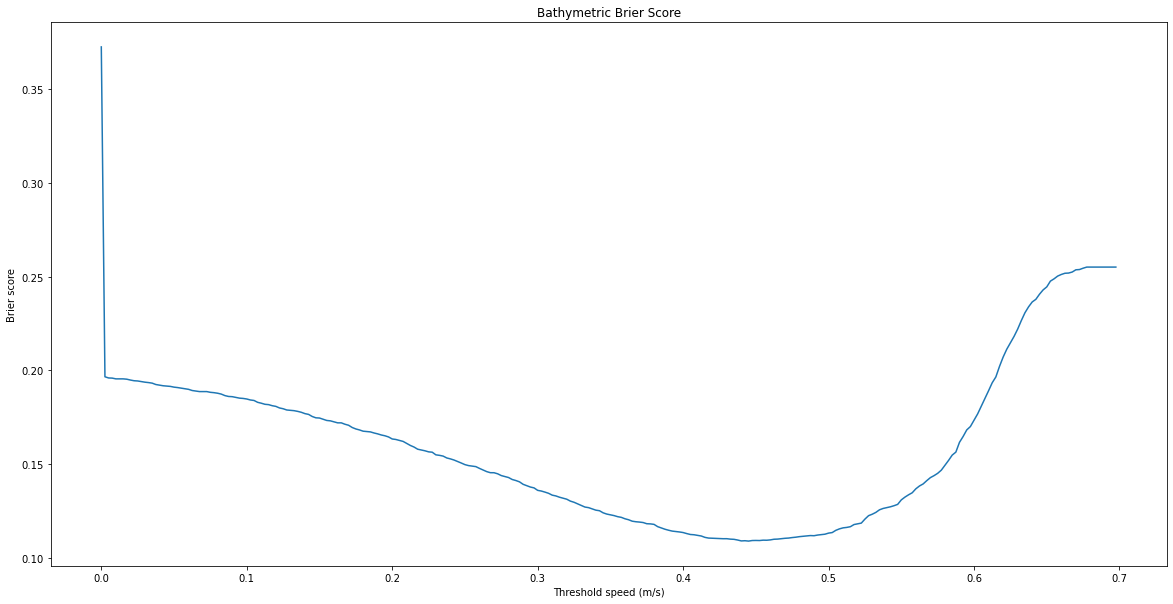

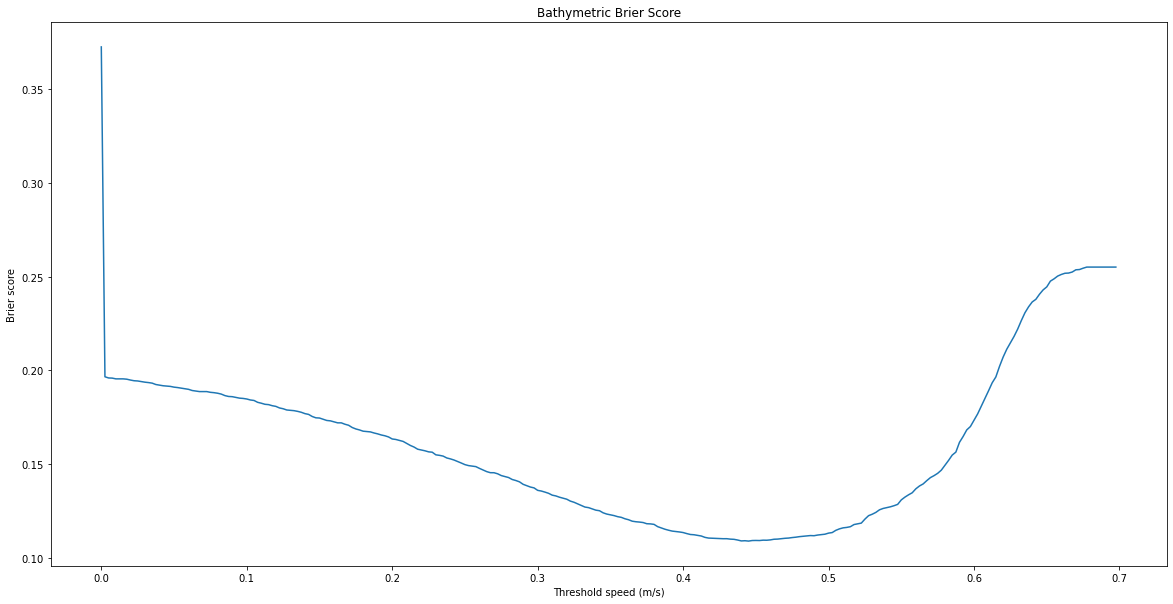

In [23]:
fig, ax = plt.subplots(nrows=1, figsize=(20,10))


bathyresolution = []
bathyreliability = []
bathyuncertainty = []
bathyscorevals = []
probability = data['probability'].to_numpy()/100

for i in range(len(thresh_list)):
    threshold = thresh_list[i]
    brierscore = 0
    for i in range(len(probability)):
        if bathyspeed[i] >= threshold:
            add = ((probability[i])-1)**2
            brierscore+=add
           # print(brierscore)
        else: 
            add = ((probability[i])-0)**2
            brierscore+=add
          #  print(brierscore)
        brierscore = brierscore
    bathyscorevals.append(brierscore/len(probability))
print(bathyscorevals)
print(len(bathyscorevals))

plt.plot(thresh_list, bathyscorevals)
plt.xlabel("Threshold speed (m/s)")
plt.ylabel("Brier score")
plt.title("Bathymetric Brier Score")

In [24]:
#bathymetric o_bar_i

o_bar_i_10 = []
o_bar_i_20 = []
o_bar_i_30 = []
o_bar_i_40 = []
o_bar_i_50 = []
o_bar_i_60 = []
o_bar_i_70 = []
o_bar_i_80 = []
o_bar_i_90 = []
o_bar_i_100 = []

for i in range(len(thresh_list)):
    threshold = thresh_list[i]
    count = 0
    for i in range (len(N_10_indices)):
        index = N_10_indices[i]
        if bathyspeed[index] > threshold:
            count += 1
    o_bar_i_10.append((1/N_10)*count)
    count = 0
    for i in range (len(N_20_indices)):
        index = N_20_indices[i]
        if bathyspeed[index] > threshold:
            count += 1
    o_bar_i_20.append(((1/N_20))*count)
    count = 0
    for i in range (len(N_30_indices)):
        index = N_30_indices[i]
        if bathyspeed[index] > threshold:
            count += 1
    o_bar_i_30.append((1/N_30)*count)
    count = 0
    for i in range (len(N_40_indices)):
        index = N_40_indices[i]
        if bathyspeed[index] > threshold:
            count += 1
    o_bar_i_40.append((1/N_40)*count)
    count = 0
    for i in range (len(N_50_indices)):
        index = N_50_indices[i]
        if bathyspeed[index] > threshold:
            count += 1
    o_bar_i_50.append((1/N_50)*count)
    count = 0
    for i in range (len(N_60_indices)):
        index = N_60_indices[i]
        if bathyspeed[index] > threshold:
            count += 1
    o_bar_i_60.append((1/N_60)*count)
    count = 0
    for i in range (len(N_70_indices)):
        index = N_70_indices[i]
        if bathyspeed[index] > threshold:
            count += 1
    o_bar_i_70.append((1/N_70)*count)
    count = 0
    for i in range (len(N_80_indices)):
        index = N_80_indices[i]
        if bathyspeed[index] > threshold:
            count += 1
    o_bar_i_80.append((1/N_80)*count)
    count = 0
    for i in range (len(N_90_indices)):
        index = N_90_indices[i]
        if bathyspeed[index] > threshold:
            count += 1
    o_bar_i_90.append((1/N_90)*count)
    count = 0
    for i in range (len(N_100_indices)):
        index = N_100_indices[i]
        if bathyspeed[index] > threshold:
            count += 1
    o_bar_i_100.append((1/N_100)*count)


In [25]:
o_bar = []

for i in range(len(thresh_list)):
    use = 0
    use += N_10*o_bar_i_10[i]
    use += N_20*o_bar_i_20[i]
    use += N_30*o_bar_i_30[i]
    use += N_40*o_bar_i_40[i]
    use += N_50*o_bar_i_50[i]
    use += N_60*o_bar_i_60[i]
    use += N_70*o_bar_i_70[i]
    use += N_80*o_bar_i_80[i]
    use += N_90*o_bar_i_90[i]
    use += N_100*o_bar_i_100[i]
    o_bar.append(use/len(probability))
    
print(o_bar)

[0.7440957618893562, 0.7437722419928826, 0.742478162406988, 0.7421546425105144, 0.7415076027175671, 0.7415076027175671, 0.7415076027175671, 0.7411840828210935, 0.7402135231316725, 0.7395664833387253, 0.7392429634422517, 0.7385959236493045, 0.7379488838563572, 0.7376253639598835, 0.7369783241669363, 0.7353607246845681, 0.7347136848916208, 0.7340666450986736, 0.7337431252022, 0.7334196053057263, 0.732772565512779, 0.7321255257198318, 0.7314784859268845, 0.7308314461339372, 0.73018440634099, 0.7285668068586219, 0.7275962471692009, 0.7269492073762537, 0.7269492073762537, 0.7269492073762537, 0.7259786476868327, 0.7256551277903591, 0.7250080879974118, 0.724037528307991, 0.7224199288256228, 0.7214493691362018, 0.7211258492397282, 0.720478809446781, 0.71950824975736, 0.7191847298608864, 0.7185376900679392, 0.7172436104820447, 0.7165965706890974, 0.7146554513102555, 0.7133613717243611, 0.7120672921384665, 0.7117437722419929, 0.7104496926560984, 0.7094791329666774, 0.7075380135878356, 0.70656745

In [26]:
BathyBS = []
BathyBSS = []
reliability = []
resolution = []
uncertainty = []

# construct reliability
for i in range(len(thresh_list)):
    use = 0
    use += (N_10)*(N_10_avg - o_bar_i_10[i])**2
    use += (N_20)*(N_20_avg - o_bar_i_20[i])**2  
    use += (N_30)*(N_30_avg - o_bar_i_30[i])**2
    use += (N_40)*(N_40_avg - o_bar_i_40[i])**2
    use += (N_50)*(N_50_avg - o_bar_i_50[i])**2
    use += (N_60)*(N_60_avg - o_bar_i_60[i])**2
    use += (N_70)*(N_70_avg - o_bar_i_70[i])**2
    use += (N_80)*(N_80_avg - o_bar_i_80[i])**2
    use += (N_90)*(N_90_avg - o_bar_i_90[i])**2
    use += (N_100)*(N_100_avg - o_bar_i_100[i])**2
    reliability.append((1/len(probability))*use)

# construct resolution 
for i in range(len(thresh_list)):
    use = 0
    use += (N_10)*(o_bar_i_10[i] - o_bar[i])**2
    use += (N_20)*(o_bar_i_20[i] - o_bar[i])**2
    use += (N_30)*(o_bar_i_30[i] - o_bar[i])**2
    use += (N_40)*(o_bar_i_40[i] - o_bar[i])**2
    use += (N_50)*(o_bar_i_50[i] - o_bar[i])**2
    use += (N_60)*(o_bar_i_60[i] - o_bar[i])**2
    use += (N_70)*(o_bar_i_70[i] - o_bar[i])**2
    use += (N_80)*(o_bar_i_80[i] - o_bar[i])**2
    use += (N_90)*(o_bar_i_90[i] - o_bar[i])**2
    use += (N_100)*(o_bar_i_100[i] - o_bar[i])**2
    resolution.append((1/len(probability)*use))

#construct uncertainty
for i in range(len(thresh_list)):
    uncertainty.append(o_bar[i]*(1-o_bar[i]))

#construct Brier score
for i in range(len(thresh_list)):
    BathyBS.append(reliability[i]-resolution[i]+uncertainty[i])
    
#construct Brier Skill Score

for i in range(len(thresh_list)):
    if uncertainty[i] == 0:
        BathyBSS.append(-100)
    else:
        BathyBSS.append((resolution[i]-reliability[i])/uncertainty[i])  
print(BathyBSS)

[-0.03878070236853516, -0.03707679199116749, -0.030302036234970006, -0.028958478239242986, -0.024923588367896758, -0.024923588367896758, -0.024923588367896758, -0.023251175479929137, -0.01859595077670839, -0.014947799152989532, -0.013636419207125014, -0.010347849214550566, -0.007074155384017885, -0.005107410227667435, -0.001856349579069461, 0.005872662066175923, 0.009073658048648566, 0.012260442602451299, 0.013848539098054469, 0.015765165169694617, 0.01925486647040914, 0.02173371607391674, 0.024864719982080043, 0.02765058921607631, 0.030754824754634258, 0.03749164225740102, 0.0411009137161447, 0.04381310163443892, 0.04381310163443892, 0.04381310163443892, 0.048022710300934815, 0.04952895438296468, 0.05253183493919395, 0.05701231254751949, 0.06441696472895009, 0.06849812142179945, 0.06963653906730904, 0.07287549963586684, 0.0769039817670901, 0.07834872811805144, 0.08122788956254624, 0.0863105648644748, 0.08884673349704453, 0.09699753914727215, 0.10164428228124614, 0.10688597025205174, 0

[0.37254145648657444, 0.19662880685862213, 0.195992119702362, 0.1959131808476224, 0.19550748689744443, 0.19550748689744443, 0.19550748689744443, 0.19533472727272755, 0.19488115237787146, 0.19451233969589146, 0.19438357877709497, 0.1940568236816566, 0.1937417153024913, 0.19352301585247514, 0.1932240834681335, 0.19249422258168908, 0.1921402918149469, 0.1918335949530899, 0.19168801099967678, 0.19148936978324196, 0.19109402846975115, 0.19086627046263369, 0.19053433904885173, 0.1902587000970562, 0.18992547460368833, 0.18929525784535772, 0.18899567842122314, 0.1887252157877712, 0.1887252157877712, 0.1887252157877712, 0.18833505079262397, 0.18814482109349745, 0.1878452416693628, 0.18738131413781967, 0.18657898479456506, 0.18612411582012317, 0.18601217793594332, 0.18562071886121018, 0.18523184794564884, 0.1850739702361697, 0.1847718026528633, 0.18425028857974787, 0.18398564930443248, 0.18299438434163728, 0.18252333937237167, 0.18195070915561334, 0.18177212617275987, 0.18119820187641567, 0.1808

Text(0.5, 1.0, 'Bathymetric Brier Score')

[0.37254145648657444, 0.19662880685862213, 0.195992119702362, 0.1959131808476224, 0.19550748689744443, 0.19550748689744443, 0.19550748689744443, 0.19533472727272755, 0.19488115237787146, 0.19451233969589146, 0.19438357877709497, 0.1940568236816566, 0.1937417153024913, 0.19352301585247514, 0.1932240834681335, 0.19249422258168908, 0.1921402918149469, 0.1918335949530899, 0.19168801099967678, 0.19148936978324196, 0.19109402846975115, 0.19086627046263369, 0.19053433904885173, 0.1902587000970562, 0.18992547460368833, 0.18929525784535772, 0.18899567842122314, 0.1887252157877712, 0.1887252157877712, 0.1887252157877712, 0.18833505079262397, 0.18814482109349745, 0.1878452416693628, 0.18738131413781967, 0.18657898479456506, 0.18612411582012317, 0.18601217793594332, 0.18562071886121018, 0.18523184794564884, 0.1850739702361697, 0.1847718026528633, 0.18425028857974787, 0.18398564930443248, 0.18299438434163728, 0.18252333937237167, 0.18195070915561334, 0.18177212617275987, 0.18119820187641567, 0.1808

Text(0.5, 1.0, 'Bathymetric Brier Score')

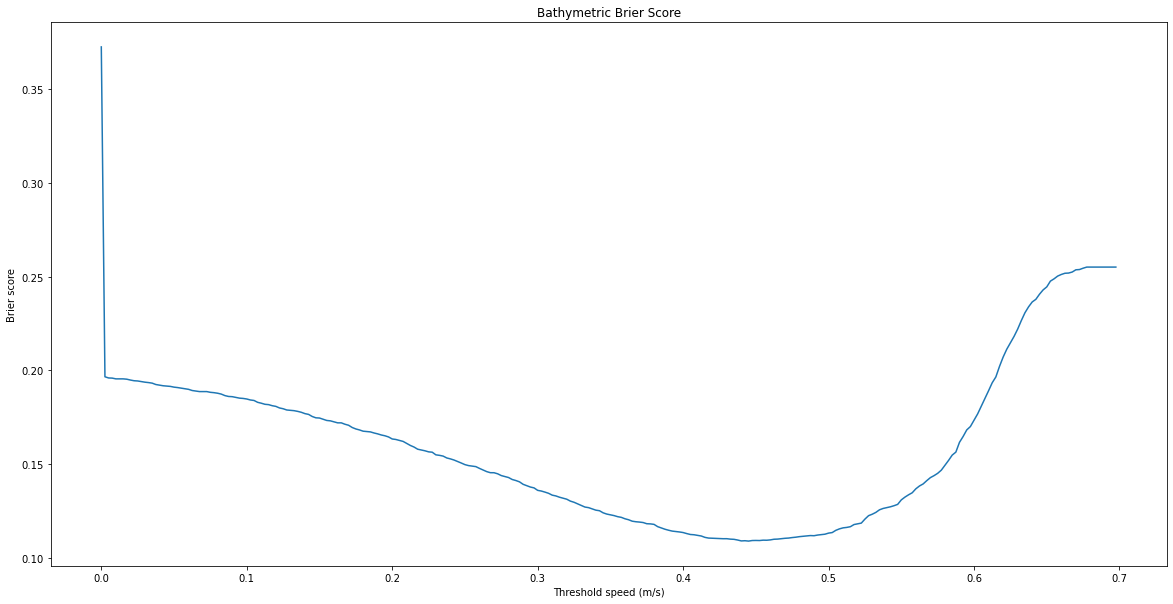

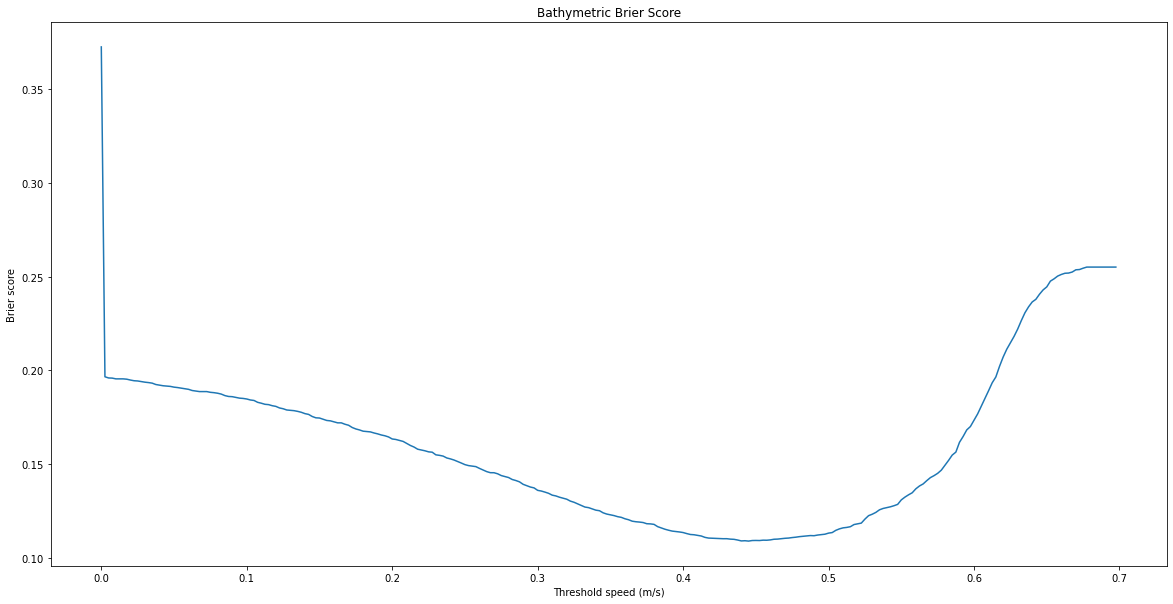

In [27]:
fig, ax = plt.subplots(nrows=1, figsize=(20,10))


bathyresolution = []
bathyreliability = []
bathyuncertainty = []
bathyscorevals = []
probability = data['probability'].to_numpy()/100
    
len(thresh_list)

for i in range(len(thresh_list)):
    threshold = thresh_list[i]
    brierscore = 0
    for i in range(len(probability)):
        if bathyspeed[i] >= threshold:
            add = ((probability[i])-1)**2
            brierscore+=add
           # print(brierscore)
        else: 
            add = ((probability[i])-0)**2
            brierscore+=add
          #  print(brierscore)
        brierscore = brierscore
    bathyscorevals.append(brierscore/len(probability))
print(bathyscorevals)
print(len(bathyscorevals))

plt.plot(thresh_list, bathyscorevals)
plt.xlabel("Threshold speed (m/s)")
plt.ylabel("Brier score")
plt.title("Bathymetric Brier Score")

Text(0, 0.5, 'Brier Score')

Text(0, 0.5, 'Brier Score')

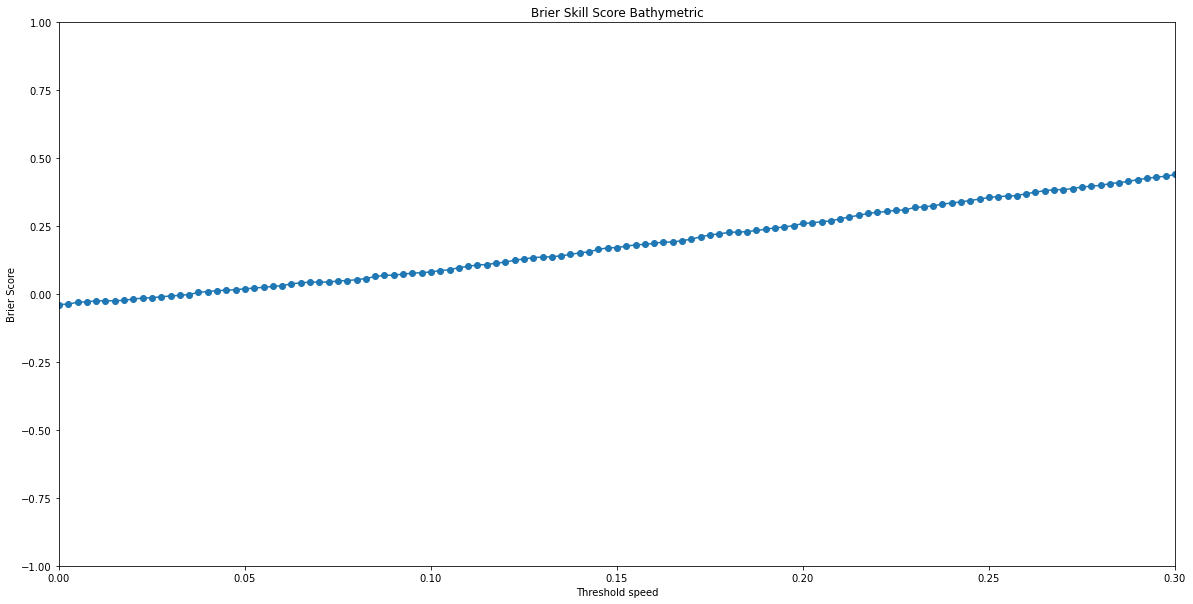

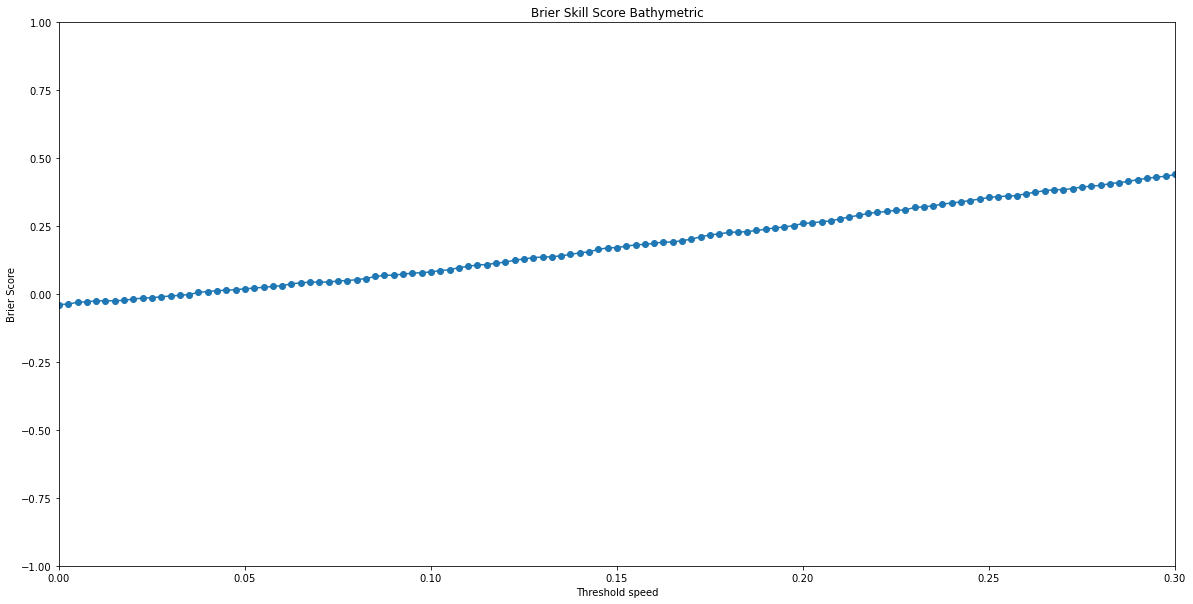

In [28]:
fig, ax = plt.subplots(nrows=1, figsize=(20,10))

plt.xlim(0, 0.3)
plt.ylim(-1, 1)

plt.scatter(thresh_list, BathyBSS)
plt.plot(thresh_list, BathyBSS)
plt.title("Brier Skill Score Bathymetric")
plt.xlabel("Threshold speed")
plt.ylabel("Brier Score")

In [29]:
# transient o_bar_i

o_bar_i_10 = []
o_bar_i_20 = []
o_bar_i_30 = []
o_bar_i_40 = []
o_bar_i_50 = []
o_bar_i_60 = []
o_bar_i_70 = []
o_bar_i_80 = []
o_bar_i_90 = []
o_bar_i_100 = []

for i in range(len(thresh_list)):
    threshold = thresh_list[i]
    count = 0
    for i in range (len(N_10_indices)):
        index = N_10_indices[i]
        if transspeed[index] > threshold:
            count += 1
    o_bar_i_10.append((1/N_10)*count)
    count = 0
    for i in range (len(N_20_indices)):
        index = N_20_indices[i]
        if transspeed[index] > threshold:
            count += 1
    o_bar_i_20.append(((1/N_20))*count)
    count = 0
    for i in range (len(N_30_indices)):
        index = N_30_indices[i]
        if transspeed[index] > threshold:
            count += 1
    o_bar_i_30.append((1/N_30)*count)
    count = 0
    for i in range (len(N_40_indices)):
        index = N_40_indices[i]
        if transspeed[index] > threshold:
            count += 1
    o_bar_i_40.append((1/N_40)*count)
    count = 0
    for i in range (len(N_50_indices)):
        index = N_50_indices[i]
        if transspeed[index] > threshold:
            count += 1
    o_bar_i_50.append((1/N_50)*count)
    count = 0
    for i in range (len(N_60_indices)):
        index = N_60_indices[i]
        if transspeed[index] > threshold:
            count += 1
    o_bar_i_60.append((1/N_60)*count)
    count = 0
    for i in range (len(N_70_indices)):
        index = N_70_indices[i]
        if transspeed[index] > threshold:
            count += 1
    o_bar_i_70.append((1/N_70)*count)
    count = 0
    for i in range (len(N_80_indices)):
        index = N_80_indices[i]
        if transspeed[index] > threshold:
            count += 1
    o_bar_i_80.append((1/N_80)*count)
    count = 0
    for i in range (len(N_90_indices)):
        index = N_90_indices[i]
        if transspeed[index] > threshold:
            count += 1
    o_bar_i_90.append((1/N_90)*count)
    count = 0
    for i in range (len(N_100_indices)):
        index = N_100_indices[i]
        if transspeed[index] > threshold:
            count += 1
    o_bar_i_100.append((1/N_100)*count)

In [30]:
o_bar = []

for i in range(len(thresh_list)):
    use = 0
    use += N_10*o_bar_i_10[i]
    use += N_20*o_bar_i_20[i]
    use += N_30*o_bar_i_30[i]
    use += N_40*o_bar_i_40[i]
    use += N_50*o_bar_i_50[i]
    use += N_60*o_bar_i_60[i]
    use += N_70*o_bar_i_70[i]
    use += N_80*o_bar_i_80[i]
    use += N_90*o_bar_i_90[i]
    use += N_100*o_bar_i_100[i]
    o_bar.append(use/len(probability))
    
print(o_bar)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.999029440310579, 0.9977353607246846, 0.9974118408282109, 0.9967648010352637, 0.9957942413458428, 0.9938531219670009, 0.9890003235198964, 0.9847945648657392, 0.9792947266256875, 0.9741184082821094, 0.9660304108702685, 0.9572953736654805, 0.9459721772889033, 0.9333549013264316, 0.9239728243286962, 0.9123261080556454, 0.9000323519896474, 0.8916208346813329, 0.8815917178906503, 0.8680038822387577, 0.8547395664833387, 0.8392106114526043, 0.8304755742478163, 0.822711096732449, 0.8142995794241346, 0.8071821417017147, 0.7987706243934002, 0.791006146878033, 0.7803299902944031, 0.7709479132966678, 0.7612423164024588, 0.7525072791976707, 0.7434487220964089, 0.7353607246845681, 0.72403

In [31]:
TransBS = []
TransBSS = []
reliability = []
resolution = []
uncertainty = []

# construct reliability
for i in range(len(thresh_list)):
    use = 0
    use += (N_10)*(N_10_avg - o_bar_i_10[i])**2
    use += (N_20)*(N_20_avg - o_bar_i_20[i])**2  
    use += (N_30)*(N_30_avg - o_bar_i_30[i])**2
    use += (N_40)*(N_40_avg - o_bar_i_40[i])**2
    use += (N_50)*(N_50_avg - o_bar_i_50[i])**2
    use += (N_60)*(N_60_avg - o_bar_i_60[i])**2
    use += (N_70)*(N_70_avg - o_bar_i_70[i])**2
    use += (N_80)*(N_80_avg - o_bar_i_80[i])**2
    use += (N_90)*(N_90_avg - o_bar_i_90[i])**2
    use += (N_100)*(N_100_avg - o_bar_i_100[i])**2
    reliability.append((1/len(probability))*use)

# construct resolution 
for i in range(len(thresh_list)):
    use = 0
    use += (N_10)*(o_bar_i_10[i] - o_bar[i])**2
    use += (N_20)*(o_bar_i_20[i] - o_bar[i])**2
    use += (N_30)*(o_bar_i_30[i] - o_bar[i])**2
    use += (N_40)*(o_bar_i_40[i] - o_bar[i])**2
    use += (N_50)*(o_bar_i_50[i] - o_bar[i])**2
    use += (N_60)*(o_bar_i_60[i] - o_bar[i])**2
    use += (N_70)*(o_bar_i_70[i] - o_bar[i])**2
    use += (N_80)*(o_bar_i_80[i] - o_bar[i])**2
    use += (N_90)*(o_bar_i_90[i] - o_bar[i])**2
    use += (N_100)*(o_bar_i_100[i] - o_bar[i])**2
    resolution.append((1/len(probability)*use))

#construct uncertainty
for i in range(len(thresh_list)):
    uncertainty.append(o_bar[i]*(1-o_bar[i]))


#construct Brier score
for i in range(len(thresh_list)):
    TransBS.append(reliability[i]-resolution[i]+uncertainty[i])
    
#construct Brier Skill Score 

for i in range(len(thresh_list)):
    if uncertainty[i] == 0:
        TransBSS.append(-100)
    else:
        TransBSS.append((resolution[i]-reliability[i])/uncertainty[i])  
print(TransBSS)

[-100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -390.98478570565356, -167.09773055159246, -146.12048179100915, -116.67307816290379, -89.45981370523616, -60.76615714732846, -33.44232214675898, -23.899327776030482, -17.34653816718756, -13.725831490954837, -10.248681471831626, -7.970188820139273, -6.099775328070168, -4.775474295883813, -4.065059694311702, -3.367639338963278, -2.8223321554390295, -2.5118637365529763, -2.2167118608255367, -1.8877333032389783, -1.6320437112158677, -1.379307288447081, -1.260915575375953, -1.1601911322474299, -1.0693316409400682, -0.9937409069552523, -0.9128839951894148, -0.8394424309513416, -0.7576003347553049, -0.6966097138586532, -0

Text(0, 0.5, 'Brier Score')

Text(0, 0.5, 'Brier Score')

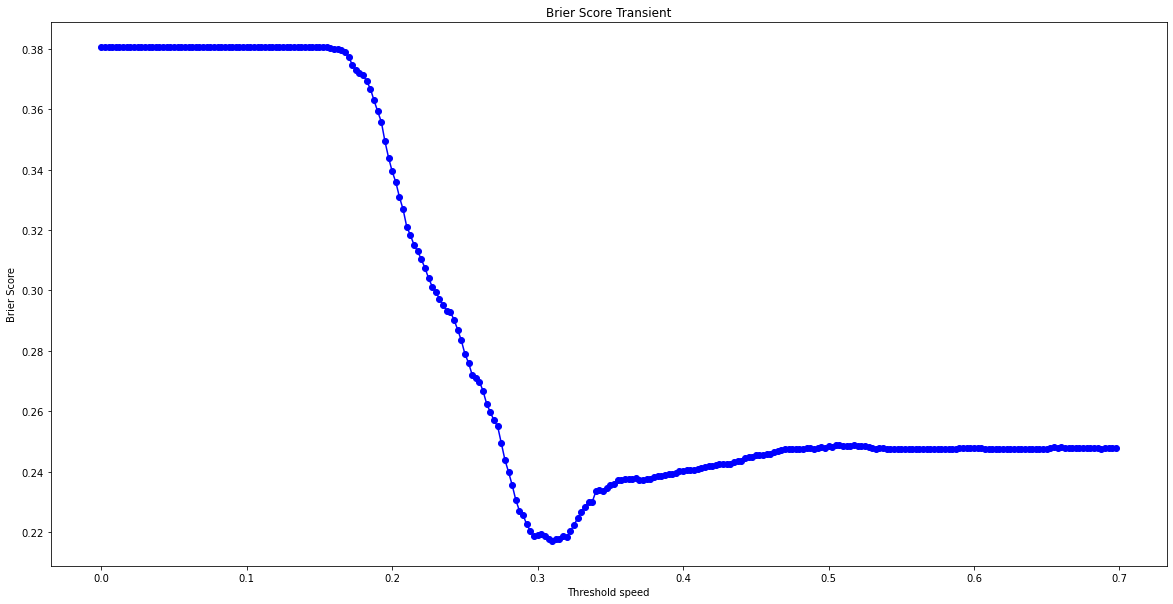

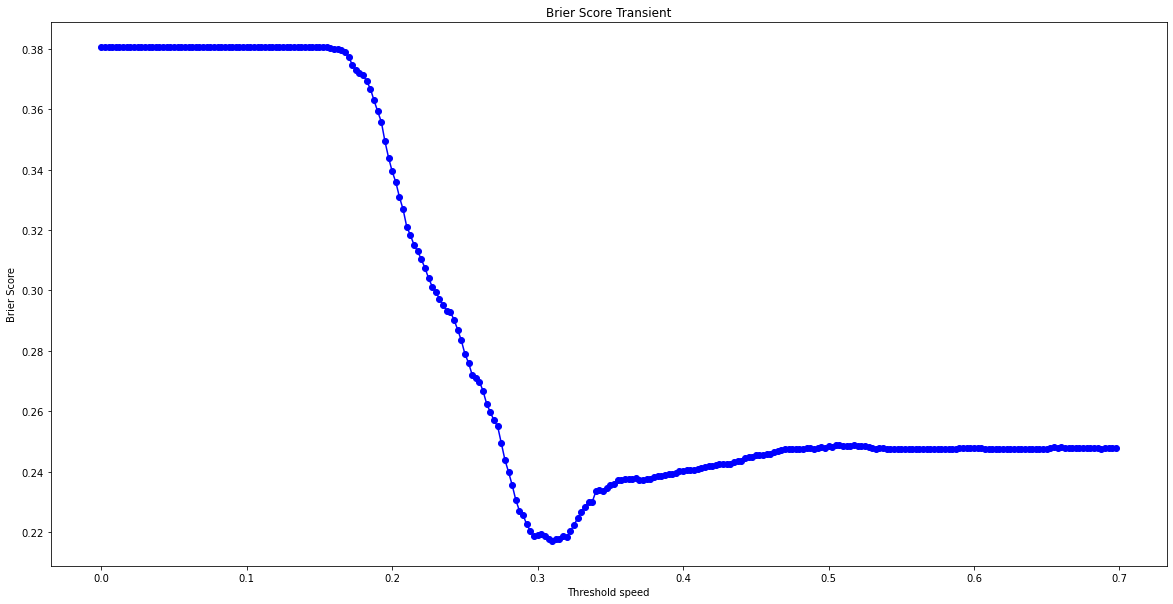

In [32]:
fig, ax = plt.subplots(nrows=1, figsize=(20,10))

plt.scatter(thresh_list, TransBS, color = 'blue')
plt.plot(thresh_list, TransBS, color = 'blue')
plt.title("Brier Score Transient")
plt.xlabel("Threshold speed")
plt.ylabel("Brier Score")

Text(0, 0.5, 'Brier Score')

Text(0, 0.5, 'Brier Score')

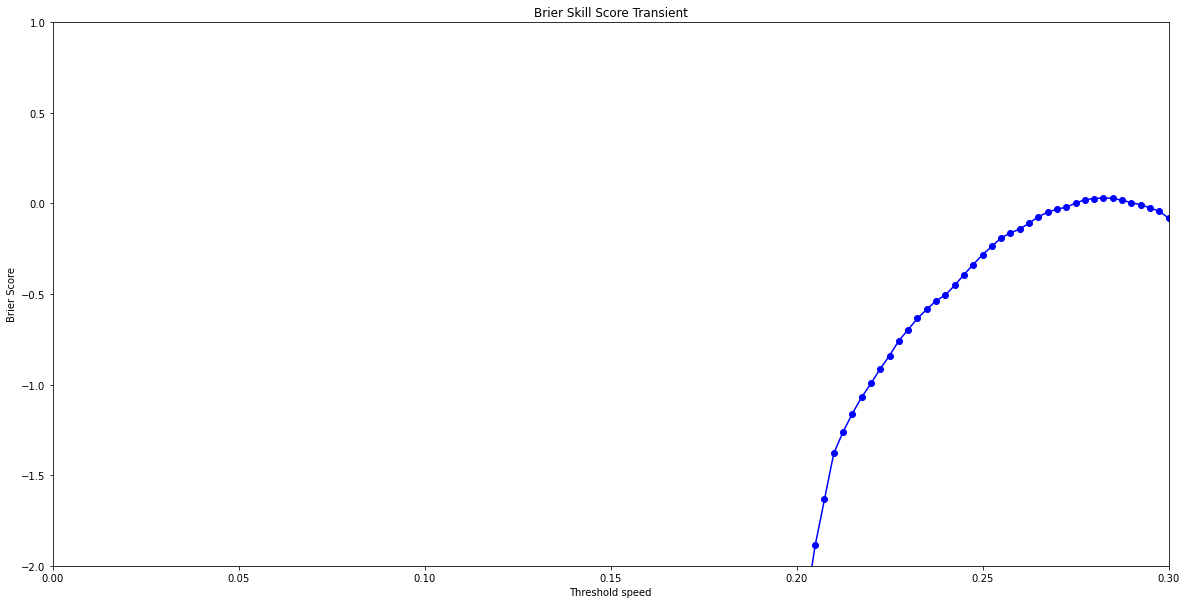

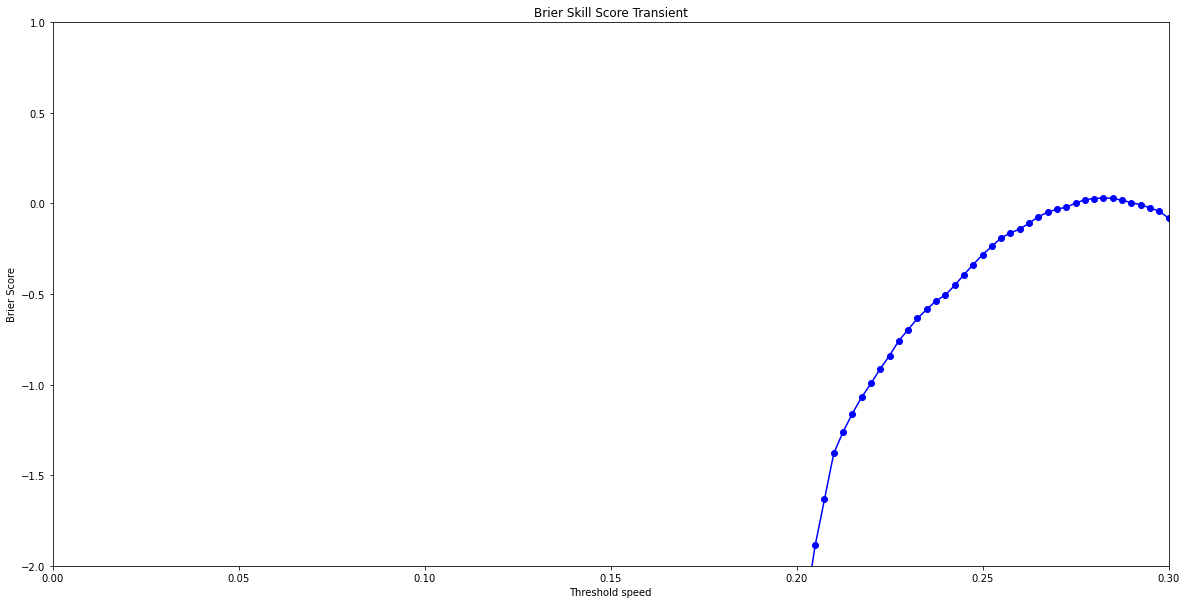

In [33]:
fig, ax = plt.subplots(nrows=1, figsize=(20,10))

plt.xlim(0, 0.3)
plt.ylim(-2, 1)


plt.scatter(thresh_list, TransBSS, color = 'blue')
plt.plot(thresh_list, TransBSS, color = 'blue')
plt.title("Brier Skill Score Transient")
plt.xlabel("Threshold speed")
plt.ylabel("Brier Score")

In [34]:
# max o_bar_i

o_bar_i_10 = []
o_bar_i_20 = []
o_bar_i_30 = []
o_bar_i_40 = []
o_bar_i_50 = []
o_bar_i_60 = []
o_bar_i_70 = []
o_bar_i_80 = []
o_bar_i_90 = []
o_bar_i_100 = []

for i in range(len(thresh_list)):
    threshold = thresh_list[i]
    count = 0
    for i in range (len(N_10_indices)):
        index = N_10_indices[i]
        if maxspeed[index] > threshold:
            count += 1
    o_bar_i_10.append((1/N_10)*count)
    count = 0
    for i in range (len(N_20_indices)):
        index = N_20_indices[i]
        if maxspeed[index] > threshold:
            count += 1
    o_bar_i_20.append(((1/N_20))*count)
    count = 0
    for i in range (len(N_30_indices)):
        index = N_30_indices[i]
        if maxspeed[index] > threshold:
            count += 1
    o_bar_i_30.append((1/N_30)*count)
    count = 0
    for i in range (len(N_40_indices)):
        index = N_40_indices[i]
        if maxspeed[index] > threshold:
            count += 1
    o_bar_i_40.append((1/N_40)*count)
    count = 0
    for i in range (len(N_50_indices)):
        index = N_50_indices[i]
        if maxspeed[index] > threshold:
            count += 1
    o_bar_i_50.append((1/N_50)*count)
    count = 0
    for i in range (len(N_60_indices)):
        index = N_60_indices[i]
        if maxspeed[index] > threshold:
            count += 1
    o_bar_i_60.append((1/N_60)*count)
    count = 0
    for i in range (len(N_70_indices)):
        index = N_70_indices[i]
        if maxspeed[index] > threshold:
            count += 1
    o_bar_i_70.append((1/N_70)*count)
    count = 0
    for i in range (len(N_80_indices)):
        index = N_80_indices[i]
        if maxspeed[index] > threshold:
            count += 1
    o_bar_i_80.append((1/N_80)*count)
    count = 0
    for i in range (len(N_90_indices)):
        index = N_90_indices[i]
        if maxspeed[index] > threshold:
            count += 1
    o_bar_i_90.append((1/N_90)*count)
    count = 0
    for i in range (len(N_100_indices)):
        index = N_100_indices[i]
        if maxspeed[index] > threshold:
            count += 1
    o_bar_i_100.append((1/N_100)*count)

In [35]:
o_bar = []

for i in range(len(thresh_list)):
    use = 0
    use += N_10*o_bar_i_10[i]
    use += N_20*o_bar_i_20[i]
    use += N_30*o_bar_i_30[i]
    use += N_40*o_bar_i_40[i]
    use += N_50*o_bar_i_50[i]
    use += N_60*o_bar_i_60[i]
    use += N_70*o_bar_i_70[i]
    use += N_80*o_bar_i_80[i]
    use += N_90*o_bar_i_90[i]
    use += N_100*o_bar_i_100[i]
    o_bar.append(use/len(probability))
    
print(o_bar)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9996764801035264, 0.9996764801035264, 0.9996764801035264, 0.9996764801035264, 0.999029440310579, 0.9977353607246846, 0.9948236816564219, 0.9932060821740537, 0.9912649627952119, 0.9899708832093174, 0.986735684244581, 0.9828534454868975, 0.9789712067292139, 0.9754124878680038, 0.9715302491103203, 0.9640892914914267, 0.9569718537690068, 0.9517955354254287, 0.9469427369783242, 0.9407958589453251, 0.9349725008087998, 0.9278550630863798, 0.9213846651569072, 0.9175024263992235, 0.9142672274344872, 0.9110320284697508, 0.9071497897120673, 0.9026205111614364, 0.897767712714332, 0.8948560336460692, 0.8912973147848593, 0.8874150760271756, 0.8828857974765448, 0.8806211582012293, 0.87673

In [36]:
MaxBS = []
MaxBSS = []
reliability = []
resolution = []
uncertainty = []

# construct reliability
for i in range(len(thresh_list)):
    use = 0
    use += (N_10)*(N_10_avg - o_bar_i_10[i])**2
    use += (N_20)*(N_20_avg - o_bar_i_20[i])**2  
    use += (N_30)*(N_30_avg - o_bar_i_30[i])**2
    use += (N_40)*(N_40_avg - o_bar_i_40[i])**2
    use += (N_50)*(N_50_avg - o_bar_i_50[i])**2
    use += (N_60)*(N_60_avg - o_bar_i_60[i])**2
    use += (N_70)*(N_70_avg - o_bar_i_70[i])**2
    use += (N_80)*(N_80_avg - o_bar_i_80[i])**2
    use += (N_90)*(N_90_avg - o_bar_i_90[i])**2
    use += (N_100)*(N_100_avg - o_bar_i_100[i])**2
    reliability.append((1/len(probability))*use)

# construct resolution 
for i in range(len(thresh_list)):
    use = 0
    use += (N_10)*(o_bar_i_10[i] - o_bar[i])**2
    use += (N_20)*(o_bar_i_20[i] - o_bar[i])**2
    use += (N_30)*(o_bar_i_30[i] - o_bar[i])**2
    use += (N_40)*(o_bar_i_40[i] - o_bar[i])**2
    use += (N_50)*(o_bar_i_50[i] - o_bar[i])**2
    use += (N_60)*(o_bar_i_60[i] - o_bar[i])**2
    use += (N_70)*(o_bar_i_70[i] - o_bar[i])**2
    use += (N_80)*(o_bar_i_80[i] - o_bar[i])**2
    use += (N_90)*(o_bar_i_90[i] - o_bar[i])**2
    use += (N_100)*(o_bar_i_100[i] - o_bar[i])**2
    resolution.append((1/len(probability)*use))

#construct uncertainty
for i in range(len(thresh_list)):
    uncertainty.append(o_bar[i]*(1-o_bar[i]))


#construct Brier score
for i in range(len(thresh_list)):
    MaxBS.append(reliability[i]-resolution[i]+uncertainty[i])
    
#construct Brier Skill Score 

for i in range(len(thresh_list)):
    if uncertainty[i] == 0:
        MaxBSS.append(-100)
    else:
        MaxBSS.append((resolution[i]-reliability[i])/uncertainty[i])  
print(MaxBSS)

[-100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -1174.9858012757811, -1174.9858012757811, -1174.9858012757811, -1174.9858012757811, -390.7836340340208, -166.59605730775732, -72.0487646473218, -54.521815469437044, -42.12304164515379, -36.513668140632376, -27.301929120614425, -20.819708565776747, -16.695717717577008, -14.0767104825527, -11.972556823493242, -9.208356448036161, -7.468056909695608, -6.514758619704863, -5.800211225140874, -5.056420337871977, -4.487461653155281, -3.907923143112946, -3.475983202991534, -3.247613890877356, -3.0717533434915847, -2.906970684274535, -2.7282523543290917, -2.5407719241414575, -2.354748112731316, -2.25259648852768, -2.1333878

Text(0, 0.5, 'Brier Score')

Text(0, 0.5, 'Brier Score')

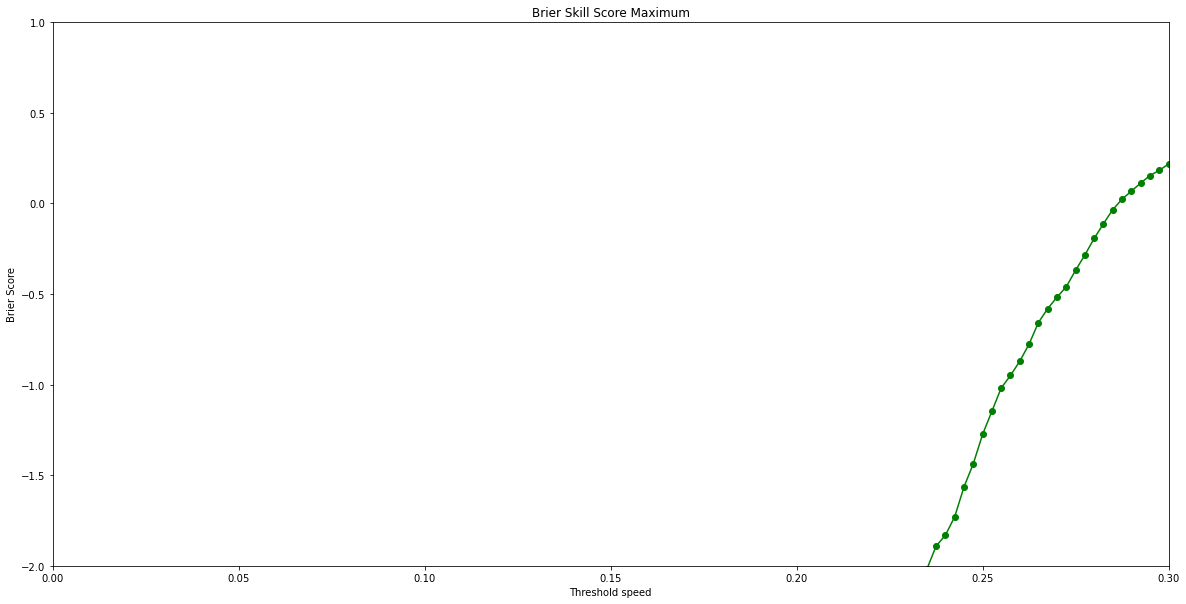

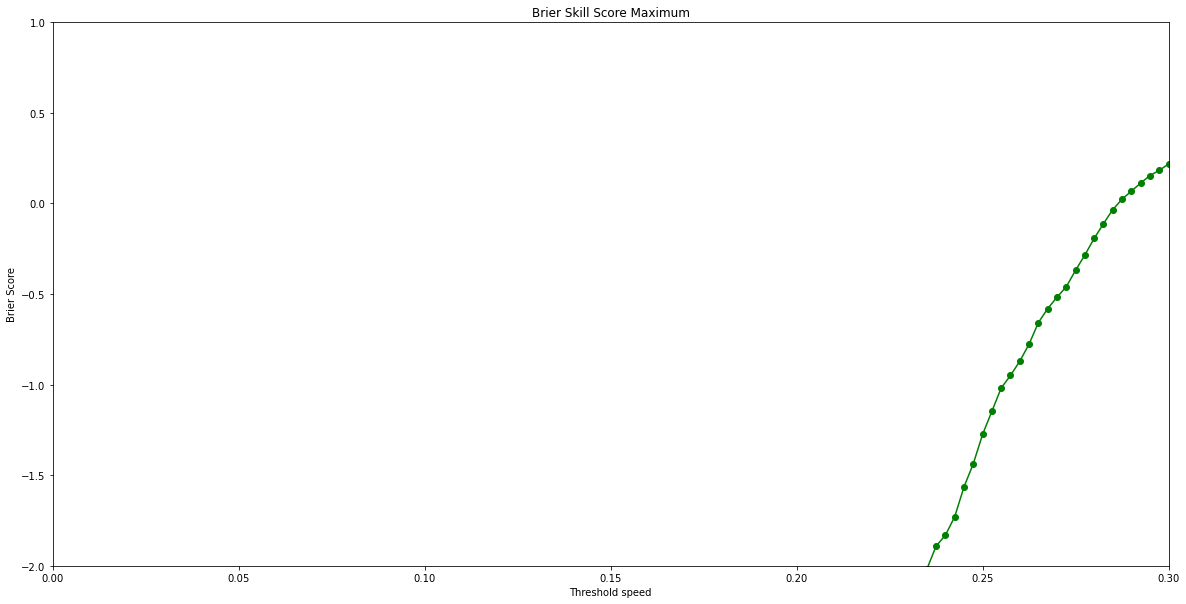

In [37]:
fig, ax = plt.subplots(nrows=1, figsize=(20,10))

plt.xlim(0, 0.3)
plt.ylim(-2, 1)


plt.scatter(thresh_list, MaxBSS, color = 'green')
plt.plot(thresh_list, MaxBSS, color = 'green')
plt.title("Brier Skill Score Maximum")
plt.xlabel("Threshold speed")
plt.ylabel("Brier Score")

In [38]:
# combined o_bar_i

o_bar_i_10 = []
o_bar_i_20 = []
o_bar_i_30 = []
o_bar_i_40 = []
o_bar_i_50 = []
o_bar_i_60 = []
o_bar_i_70 = []
o_bar_i_80 = []
o_bar_i_90 = []
o_bar_i_100 = []

for i in range(len(thresh_list)):
    threshold = thresh_list[i]
    count = 0
    for i in range (len(N_10_indices)):
        index = N_10_indices[i]
        if bathyspeed[index] + transspeed[index] > threshold:
            count += 1
    o_bar_i_10.append((1/N_10)*count)
    count = 0
    for i in range (len(N_20_indices)):
        index = N_20_indices[i]
        if bathyspeed[index] + transspeed[index] > threshold:
            count += 1
    o_bar_i_20.append(((1/N_20))*count)
    count = 0
    for i in range (len(N_30_indices)):
        index = N_30_indices[i]
        if bathyspeed[index] + transspeed[index] > threshold:
            count += 1
    o_bar_i_30.append((1/N_30)*count)
    count = 0
    for i in range (len(N_40_indices)):
        index = N_40_indices[i]
        if bathyspeed[index] + transspeed[index] > threshold:
            count += 1
    o_bar_i_40.append((1/N_40)*count)
    count = 0
    for i in range (len(N_50_indices)):
        index = N_50_indices[i]
        if bathyspeed[index] + transspeed[index] > threshold:
            count += 1
    o_bar_i_50.append((1/N_50)*count)
    count = 0
    for i in range (len(N_60_indices)):
        index = N_60_indices[i]
        if bathyspeed[index] + transspeed[index] > threshold:
            count += 1
    o_bar_i_60.append((1/N_60)*count)
    count = 0
    for i in range (len(N_70_indices)):
        index = N_70_indices[i]
        if bathyspeed[index] + transspeed[index] > threshold:
            count += 1
    o_bar_i_70.append((1/N_70)*count)
    count = 0
    for i in range (len(N_80_indices)):
        index = N_80_indices[i]
        if bathyspeed[index] + transspeed[index] > threshold:
            count += 1
    o_bar_i_80.append((1/N_80)*count)
    count = 0
    for i in range (len(N_90_indices)):
        index = N_90_indices[i]
        if bathyspeed[index] + transspeed[index] > threshold:
            count += 1
    o_bar_i_90.append((1/N_90)*count)
    count = 0
    for i in range (len(N_100_indices)):
        index = N_100_indices[i]
        if bathyspeed[index] + transspeed[index] > threshold:
            count += 1
    o_bar_i_100.append((1/N_100)*count)

In [39]:
o_bar = []

for i in range(len(thresh_list)):
    use = 0
    use += N_10*o_bar_i_10[i]
    use += N_20*o_bar_i_20[i]
    use += N_30*o_bar_i_30[i]
    use += N_40*o_bar_i_40[i]
    use += N_50*o_bar_i_50[i]
    use += N_60*o_bar_i_60[i]
    use += N_70*o_bar_i_70[i]
    use += N_80*o_bar_i_80[i]
    use += N_90*o_bar_i_90[i]
    use += N_100*o_bar_i_100[i]
    o_bar.append(use/len(probability))
    
print(o_bar)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9996764801035264, 0.9996764801035264, 0.9996764801035264, 0.9996764801035264, 0.999029440310579, 0.9980588806211582, 0.9954707214493691, 0.9938531219670009, 0.9925590423811065, 0.9912649627952119, 0.9886768036234228, 0.9854416046586865, 0.9818828857974765, 0.9792947266256875, 0.9767065674538984, 0.9702361695244257, 0.9657068909737949, 0.9608540925266904, 0.9576188935619541, 0.9527660951148496, 0.9475897767712714, 0.9420899385312197, 0.9375606599805888, 0.9346489809123261, 0.9320608217405371, 0.9291491426722743, 0.9265609835004853, 0.9242963442251698, 0.9207376253639599, 0.9191200258815917, 0.916208346813329, 0.9149142672274345, 0.9103849886768036, 0.9094144289873827, 0.9071

In [40]:
CombinedBS = []
CombinedBSS = []
reliability = []
resolution = []
uncertainty = []

# construct reliability
for i in range(len(thresh_list)):
    use = 0
    use += (N_10)*(N_10_avg - o_bar_i_10[i])**2
    use += (N_20)*(N_20_avg - o_bar_i_20[i])**2  
    use += (N_30)*(N_30_avg - o_bar_i_30[i])**2
    use += (N_40)*(N_40_avg - o_bar_i_40[i])**2
    use += (N_50)*(N_50_avg - o_bar_i_50[i])**2
    use += (N_60)*(N_60_avg - o_bar_i_60[i])**2
    use += (N_70)*(N_70_avg - o_bar_i_70[i])**2
    use += (N_80)*(N_80_avg - o_bar_i_80[i])**2
    use += (N_90)*(N_90_avg - o_bar_i_90[i])**2
    use += (N_100)*(N_100_avg - o_bar_i_100[i])**2
    reliability.append((1/len(probability))*use)

# construct resolution 
for i in range(len(thresh_list)):
    use = 0
    use += (N_10)*(o_bar_i_10[i] - o_bar[i])**2
    use += (N_20)*(o_bar_i_20[i] - o_bar[i])**2
    use += (N_30)*(o_bar_i_30[i] - o_bar[i])**2
    use += (N_40)*(o_bar_i_40[i] - o_bar[i])**2
    use += (N_50)*(o_bar_i_50[i] - o_bar[i])**2
    use += (N_60)*(o_bar_i_60[i] - o_bar[i])**2
    use += (N_70)*(o_bar_i_70[i] - o_bar[i])**2
    use += (N_80)*(o_bar_i_80[i] - o_bar[i])**2
    use += (N_90)*(o_bar_i_90[i] - o_bar[i])**2
    use += (N_100)*(o_bar_i_100[i] - o_bar[i])**2
    resolution.append((1/len(probability)*use))

#construct uncertainty
for i in range(len(thresh_list)):
    uncertainty.append(o_bar[i]*(1-o_bar[i]))


#construct Brier score
for i in range(len(thresh_list)):
    CombinedBS.append(reliability[i]-resolution[i]+uncertainty[i])
    
#construct Brier Skill Score 

for i in range(len(thresh_list)):
    if uncertainty[i] == 0:
        CombinedBSS.append(-100)
    else:
        CombinedBSS.append((resolution[i]-reliability[i])/uncertainty[i])  
print(CombinedBSS)

[-100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -1174.9858012757811, -1174.9858012757811, -1174.9858012757811, -1174.9858012757811, -390.7836340340208, -194.58184523420448, -82.53014905285251, -60.400150485971125, -49.6701407508558, -42.11178056454271, -32.19213152766045, -24.73900189062676, -19.574683245208742, -16.937339826815954, -14.892903463425931, -11.351053143821892, -9.665818934361042, -8.291288085577522, -7.5538085420457035, -6.6366879123848515, -5.850605270982711, -5.158710404708799, -4.680032200786115, -4.406353885978971, -4.181706429710481, -3.949032313060676, -3.756642731815463, -3.60075333129672, -3.375373246582726, -3.2797941627871348, -3.1164763

Text(0, 0.5, 'Brier Skill Score')

Text(0, 0.5, 'Brier Skill Score')

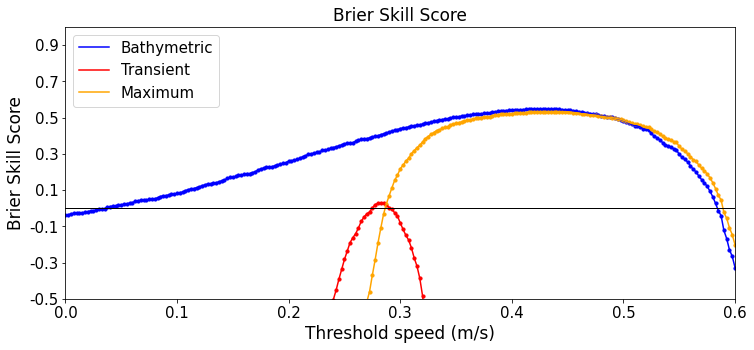

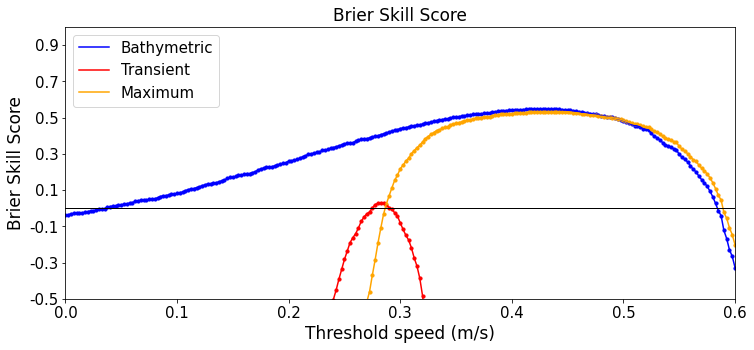

In [41]:
#closer look

fig, ax = plt.subplots(nrows=1, figsize=(12,5))


plt.xlim(0, 0.6)
plt.ylim(-0.5, 1)

test = np.arange(-0.5,1.1,0.2)
test_str = [str(round(t, 1)) for t in test ]

test2 = np.arange(0,0.7,0.1)
test_str2 = [str(round(t, 1)) for t in test2 ]

plt.plot(thresh_list, BathyBSS, color = 'blue')
plt.plot(thresh_list, TransBSS, color = 'red')
plt.plot(thresh_list, MaxBSS, color = 'orange')
plt.scatter(thresh_list, BathyBSS, color = 'blue', s=10)
plt.scatter(thresh_list, TransBSS, color = 'red', s=10)
plt.scatter(thresh_list, MaxBSS, color = 'orange', s=10)
plt.axhline(y=0, color = 'black', linewidth = 1)
ax.set_yticks(test)
ax.set_yticklabels(test_str, fontsize=15)
ax.set_xticks(test2)
ax.set_xticklabels(test_str2, fontsize = 15)
plt.legend(["Bathymetric", "Transient", "Maximum"], loc = 'upper left', fontsize = 15)
plt.title("Brier Skill Score", fontsize = 17)
plt.xlabel("Threshold speed (m/s)", fontsize = 17)
plt.ylabel("Brier Skill Score", fontsize = 17)

In [42]:
max(BathyBSS)

0.5489286332464642

0.5489286332464642

In [43]:
res = [idx for idx, val in enumerate(BathyBSS) if BathyBSS[idx] > 0]
print(res)
thresh_list[15]

[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231,

0.0375

[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231,

0.0375

In [44]:
res = [idx for idx, val in enumerate(BathyBSS) if TransBSS[idx] > 0]
print(res)
thresh_list[116]

[110, 111, 112, 113, 114, 115, 116]
[110, 111, 112, 113, 114, 115, 116]


0.29000000000000004

0.29000000000000004

In [45]:
res = [idx for idx, val in enumerate(BathyBSS) if MaxBSS[idx] > 0]
print(res)
thresh_list[235]

[115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235]
[115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193

0.5875

0.5875

In [46]:
res = [idx for idx, val in enumerate(BathyBSS) if MaxBSS[idx] > BathyBSS[idx]]
print(res)
thresh_list[197]

[197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279]
[197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279]


0.49250000000000005

0.49250000000000005

In [47]:
d = {"thresh_list": thresh_list, "BathyBSS": BathyBSS, "TransBSS": TransBSS, "MaxBSS": MaxBSS}
bss = pd.DataFrame(d)
bss

thresh_list    BathyBSS    TransBSS      MaxBSS
0         0.0000   -0.038781 -100.000000 -100.000000
1         0.0025   -0.037077 -100.000000 -100.000000
2         0.0050   -0.030302 -100.000000 -100.000000
3         0.0075   -0.028958 -100.000000 -100.000000
4         0.0100   -0.024924 -100.000000 -100.000000
..           ...         ...         ...         ...
275       0.6875 -100.000000  -28.684800  -28.684800
276       0.6900 -100.000000  -29.898225  -29.898225
277       0.6925 -100.000000  -31.179369  -31.179369
278       0.6950 -100.000000  -31.179369  -31.179369
279       0.6975 -100.000000  -31.179369  -31.179369

[280 rows x 4 columns]

thresh_list    BathyBSS    TransBSS      MaxBSS
0         0.0000   -0.038781 -100.000000 -100.000000
1         0.0025   -0.037077 -100.000000 -100.000000
2         0.0050   -0.030302 -100.000000 -100.000000
3         0.0075   -0.028958 -100.000000 -100.000000
4         0.0100   -0.024924 -100.000000 -100.000000
..           ...         ...         ...         ...
275       0.6875 -100.000000  -28.684800  -28.684800
276       0.6900 -100.000000  -29.898225  -29.898225
277       0.6925 -100.000000  -31.179369  -31.179369
278       0.6950 -100.000000  -31.179369  -31.179369
279       0.6975 -100.000000  -31.179369  -31.179369

[280 rows x 4 columns]

In [48]:
bss.to_csv('bss', index = False, header = True)

In [49]:
print(N_10, N_20, N_30, N_40, N_50, N_60, N_70, N_80, N_90, N_100)

192 431 432 438 417 313 304 243 204 117
192 431 432 438 417 313 304 243 204 117


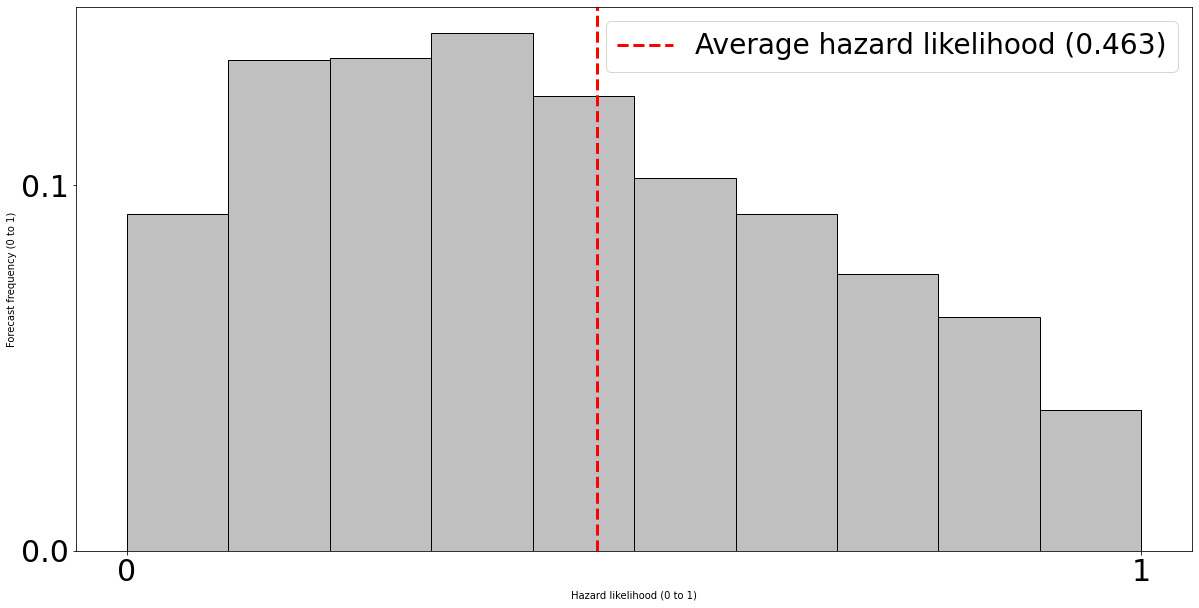

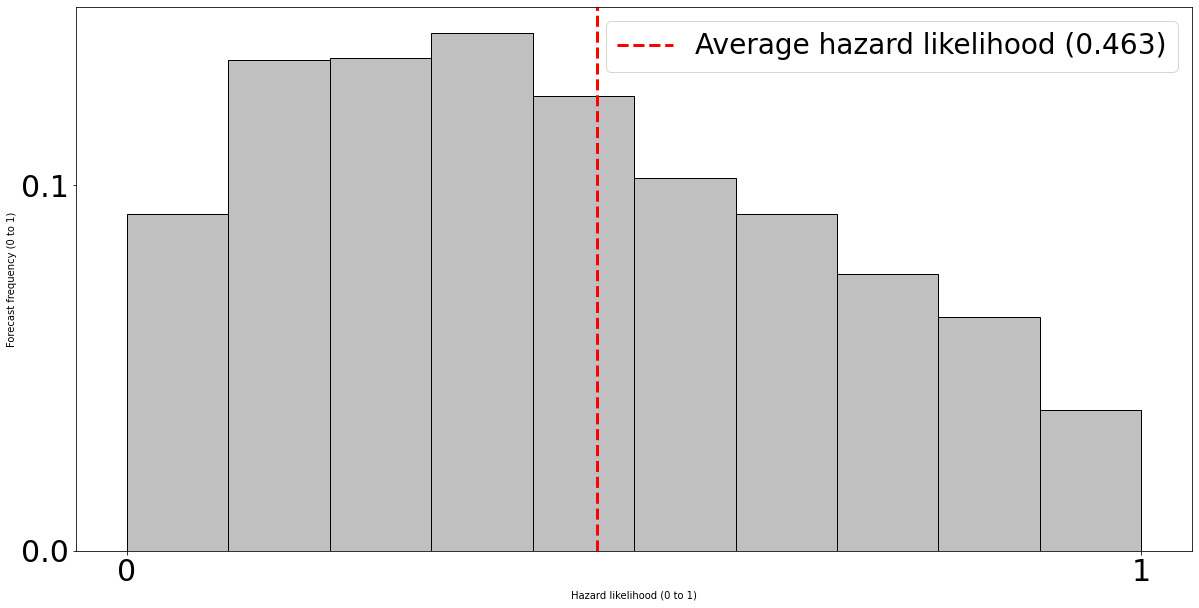

In [50]:
fig, ax = plt.subplots(nrows=1, figsize=(20,10))

plt.rcParams['font.size'] = '28'
plt.tick_params(axis='both', which='major', labelsize=30)
plt.tick_params(axis='both', which='minor', labelsize=30)

bincenter = [0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95]

hist, edges = np.histogram(probability)
freq = hist / float(hist.sum())
width = np.diff(edges) # edges is bins
plt.xticks(np.arange(0, 1.1, 1))
plt.yticks(np.arange(0, 0.25, 0.1))
plt.bar(bincenter, freq, width = 0.1, align="center", ec="black", color = 'silver')
plt.xlabel("Hazard likelihood (0 to 1)")
plt.ylabel("Forecast frequency (0 to 1)")
plt.axvline(x = 0.4631, linestyle = '--', color = 'red', linewidth = 3)
plt.legend(["Average hazard likelihood (0.463)"])

In [51]:
avgbathyprob = 0
avgbathycount = 0
avgtransprob = 0
avgtranscount = 0
for i in range(len(riptype)):
    if riptype[i] == 1:
        avgbathyprob += probability[i]
        avgbathycount += 1
    if riptype[i] == 2:
        avgtransprob += probability[i]
        avgtranscount += 1
avgbathyprob /= avgbathycount
avgtransprob /= avgtranscount

print(avgbathyprob)
print(avgtransprob)

0.4412857142857143
0.3205757575757575
0.4412857142857143
0.3205757575757575


In [52]:
res = [idx for idx, val in enumerate(riptype) if riptype[idx] == 1]
print(res)

values = []
for i in range(len(res)):
    use = res[i]
    values.append(probability[use])
    
print(values)

[16, 41, 63, 136, 208, 232, 322, 366, 416, 574, 654, 713, 737, 738, 1143, 1193, 1216, 1410, 1621, 1648, 1890, 2008, 2081, 2175, 2388, 2512, 2562, 2645, 2701, 2748, 2753, 2777, 2823, 2991, 3066]
[0.49200000000000005, 0.608, 0.507, 0.68, 0.54, 0.41200000000000003, 0.12300000000000001, 0.145, 0.433, 0.32799999999999996, 0.221, 0.542, 0.426, 0.377, 0.265, 0.43200000000000005, 0.415, 0.239, 0.632, 0.11199999999999999, 0.258, 0.17800000000000002, 0.122, 0.746, 0.282, 0.8170000000000001, 0.44799999999999995, 0.34700000000000003, 0.6, 0.828, 0.575, 0.446, 0.9520000000000001, 0.24600000000000002, 0.6709999999999999]
[16, 41, 63, 136, 208, 232, 322, 366, 416, 574, 654, 713, 737, 738, 1143, 1193, 1216, 1410, 1621, 1648, 1890, 2008, 2081, 2175, 2388, 2512, 2562, 2645, 2701, 2748, 2753, 2777, 2823, 2991, 3066]
[0.49200000000000005, 0.608, 0.507, 0.68, 0.54, 0.41200000000000003, 0.12300000000000001, 0.145, 0.433, 0.32799999999999996, 0.221, 0.542, 0.426, 0.377, 0.265, 0.43200000000000005, 0.415, 0.2

In [53]:
lgmaxspeed = []
for i in range(len(indices)):
    use = indices[i]
    lgmaxspeed.append(maxspeed[use])

In [54]:
print(lgmaxspeed)
sum(lgmaxspeed)/len(lgmaxspeed)

[0.5292063652292511, 0.5666732765981591, 0.44798032181941655, 0.4833637448614765, 0.49931378899919826, 0.42522229994177585, 0.3605996495974258, 0.19797804456265608, 0.18102188061028893, 0.45950912563857105, 0.45950912563857105, 0.36297114353407317, 0.1986786518503011, 0.3568142742113497, 0.47937473298372363, 0.5084516758937248, 0.5109365932082828, 0.19621573889015292, 0.5220553347515087, 0.40538142658752646, 0.22223764849656436, 0.47948899437709874, 0.4303692267638899, 0.2897361064950582, 0.6757758310145091, 0.31970234439452894, 0.5010650660925661, 0.2562265598420172, 0.29119206371795514, 0.31090077987344616, 0.6074647155449439, 0.2237024014040202, 0.1946450702844814, 0.27500452365258443, 0.24386240300479983, 0.5676745223744945, 0.5257410608030145, 0.4339792565371527, 0.2435239834632912, 0.15543259020959366, 0.31379062424052745, 0.526343464746588, 0.27319322210961877, 0.5275670265133633, 0.20747850489670375, 0.2644183065907738, 0.31255575532355256, 0.5235302158905216, 0.310831975812810

0.3794355549886442

0.3794355549886442

In [55]:
lifeguard.insert(22, "lgmaxspeed", lgmaxspeed)
lifeguard

index            Timestamp Observation Date Observation Time  \
0      66    7/1/2021 19:41:20         7/1/2021       4:00:00 PM   
1      67    7/2/2021 19:55:33         7/2/2021       5:00:00 PM   
2      68    7/3/2021 18:48:05         7/3/2021       3:46:00 PM   
3      69    7/6/2021 19:52:33         7/6/2021       4:49:00 PM   
4      70    7/8/2021 18:57:29         7/8/2021       4:00:00 PM   
..    ...                  ...              ...              ...   
65    131  10/26/2021 21:10:16       10/26/2021       3:30:00 PM   
66    132  10/30/2021 16:38:21       10/30/2021       1:37:00 PM   
67    133   11/2/2021 21:16:15        11/2/2021       3:00:00 PM   
68    134   11/4/2021 19:10:32        11/4/2021       4:10:00 PM   
69    135   11/5/2021 20:57:53        11/5/2021       6:00:00 PM   

   Observation Date + Time  Rip Current Activity  \
0      7/1/2021 4:00:00 PM                   NaN   
1      7/2/2021 5:00:00 PM                   NaN   
2      7/3/2021 3:46:00 PM                   NaN   
3      7/6/2021 4:49:00 PM                   NaN   
4      7/8/2021 4:00:00 PM                   NaN   
..                     ...                   ...   
65   10/26/2021 3:30:00 PM                   NaN   
66   10/30/2021 1:37:00 PM                   NaN   
67    11/2/2021 3:00:00 PM                   NaN   
68    11/4/2021 4:10:00 PM                   NaN   
69    11/5/2021 6:00:00 PM                   NaN   

    Rip Strength (within 1 hour of observation time) [Salt Creek Beach]  \
0                                                 3.0                     
1                                                 2.0                     
2                                                 2.0                     
3                                                 3.0                     
4                                                 3.0                     
..                                                ...                     
65                                                3.0                     
66                                                1.0                     
67                                                2.0                     
68                                                2.0                     
69                                                3.0                     

    Rip Presence  \
0              1   
1              1   
2              1   
3              1   
4              1   
..           ...   
65             1   
66             0   
67             1   
68             1   
69             1   

    Rip Strength (within 1 hour of observation time) [Strand Beach]  \
0                                                 2.0                 
1                                                 2.0                 
2                                                 2.0                 
3                                                 2.0                 
4                                                 2.0                 
..                                                ...                 
65                                                3.0                 
66                                                1.0                 
67                                                0.0                 
68                                                1.0                 
69                                                2.0                 

    Rip Behavior ("0" if rips are listed above as not present or unknown) [Salt Creek Beach]  \
0                                                 1.0                                          
1                                                 1.0                                          
2                                                 1.0                                          
3                                                 1.0                                          
4                                                 2.0                                  

index            Timestamp Observation Date Observation Time  \
0      66    7/1/2021 19:41:20         7/1/2021       4:00:00 PM   
1      67    7/2/2021 19:55:33         7/2/2021       5:00:00 PM   
2      68    7/3/2021 18:48:05         7/3/2021       3:46:00 PM   
3      69    7/6/2021 19:52:33         7/6/2021       4:49:00 PM   
4      70    7/8/2021 18:57:29         7/8/2021       4:00:00 PM   
..    ...                  ...              ...              ...   
65    131  10/26/2021 21:10:16       10/26/2021       3:30:00 PM   
66    132  10/30/2021 16:38:21       10/30/2021       1:37:00 PM   
67    133   11/2/2021 21:16:15        11/2/2021       3:00:00 PM   
68    134   11/4/2021 19:10:32        11/4/2021       4:10:00 PM   
69    135   11/5/2021 20:57:53        11/5/2021       6:00:00 PM   

   Observation Date + Time  Rip Current Activity  \
0      7/1/2021 4:00:00 PM                   NaN   
1      7/2/2021 5:00:00 PM                   NaN   
2      7/3/2021 3:46:00 PM                   NaN   
3      7/6/2021 4:49:00 PM                   NaN   
4      7/8/2021 4:00:00 PM                   NaN   
..                     ...                   ...   
65   10/26/2021 3:30:00 PM                   NaN   
66   10/30/2021 1:37:00 PM                   NaN   
67    11/2/2021 3:00:00 PM                   NaN   
68    11/4/2021 4:10:00 PM                   NaN   
69    11/5/2021 6:00:00 PM                   NaN   

    Rip Strength (within 1 hour of observation time) [Salt Creek Beach]  \
0                                                 3.0                     
1                                                 2.0                     
2                                                 2.0                     
3                                                 3.0                     
4                                                 3.0                     
..                                                ...                     
65                                                3.0                     
66                                                1.0                     
67                                                2.0                     
68                                                2.0                     
69                                                3.0                     

    Rip Presence  \
0              1   
1              1   
2              1   
3              1   
4              1   
..           ...   
65             1   
66             0   
67             1   
68             1   
69             1   

    Rip Strength (within 1 hour of observation time) [Strand Beach]  \
0                                                 2.0                 
1                                                 2.0                 
2                                                 2.0                 
3                                                 2.0                 
4                                                 2.0                 
..                                                ...                 
65                                                3.0                 
66                                                1.0                 
67                                                0.0                 
68                                                1.0                 
69                                                2.0                 

    Rip Behavior ("0" if rips are listed above as not present or unknown) [Salt Creek Beach]  \
0                                                 1.0                                          
1                                                 1.0                                          
2                                                 1.0                                          
3                                                 1.0                                          
4                                                 2.0                                  

In [56]:
lgprobability = lifeguard['probabilities'].to_numpy()
lgbathyspeed = lifeguard['lgbathyspeed'].to_numpy()
lgtransspeed = lifeguard['lgtransspeed'].to_numpy()

In [57]:
bathyindices

[16,
 41,
 63,
 136,
 208,
 232,
 322,
 366,
 416,
 574,
 654,
 713,
 737,
 738,
 1143,
 1193,
 1216,
 1410,
 1621,
 1648,
 1890,
 2008,
 2081,
 2175,
 2388,
 2512,
 2562,
 2645,
 2701,
 2748,
 2753,
 2777,
 2823,
 2991,
 3066]

[16,
 41,
 63,
 136,
 208,
 232,
 322,
 366,
 416,
 574,
 654,
 713,
 737,
 738,
 1143,
 1193,
 1216,
 1410,
 1621,
 1648,
 1890,
 2008,
 2081,
 2175,
 2388,
 2512,
 2562,
 2645,
 2701,
 2748,
 2753,
 2777,
 2823,
 2991,
 3066]

Text(0.5, 1.0, 'Rip current strength')

Text(0.5, 1.0, 'Rip current strength')

C:\Users\audre\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\audre\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


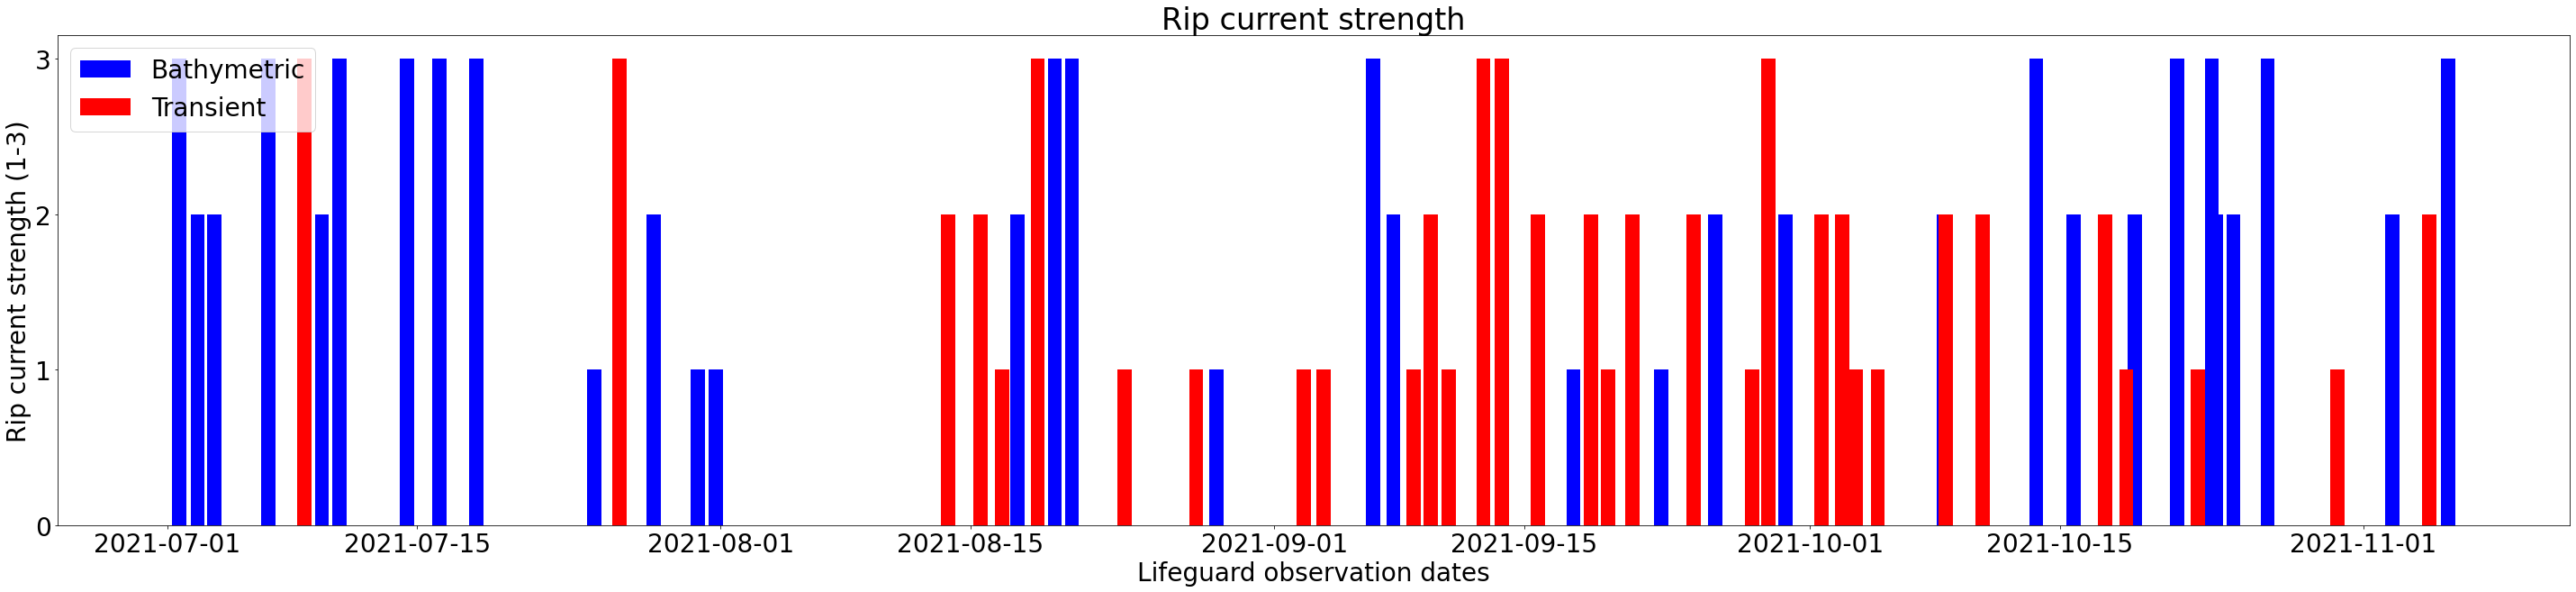

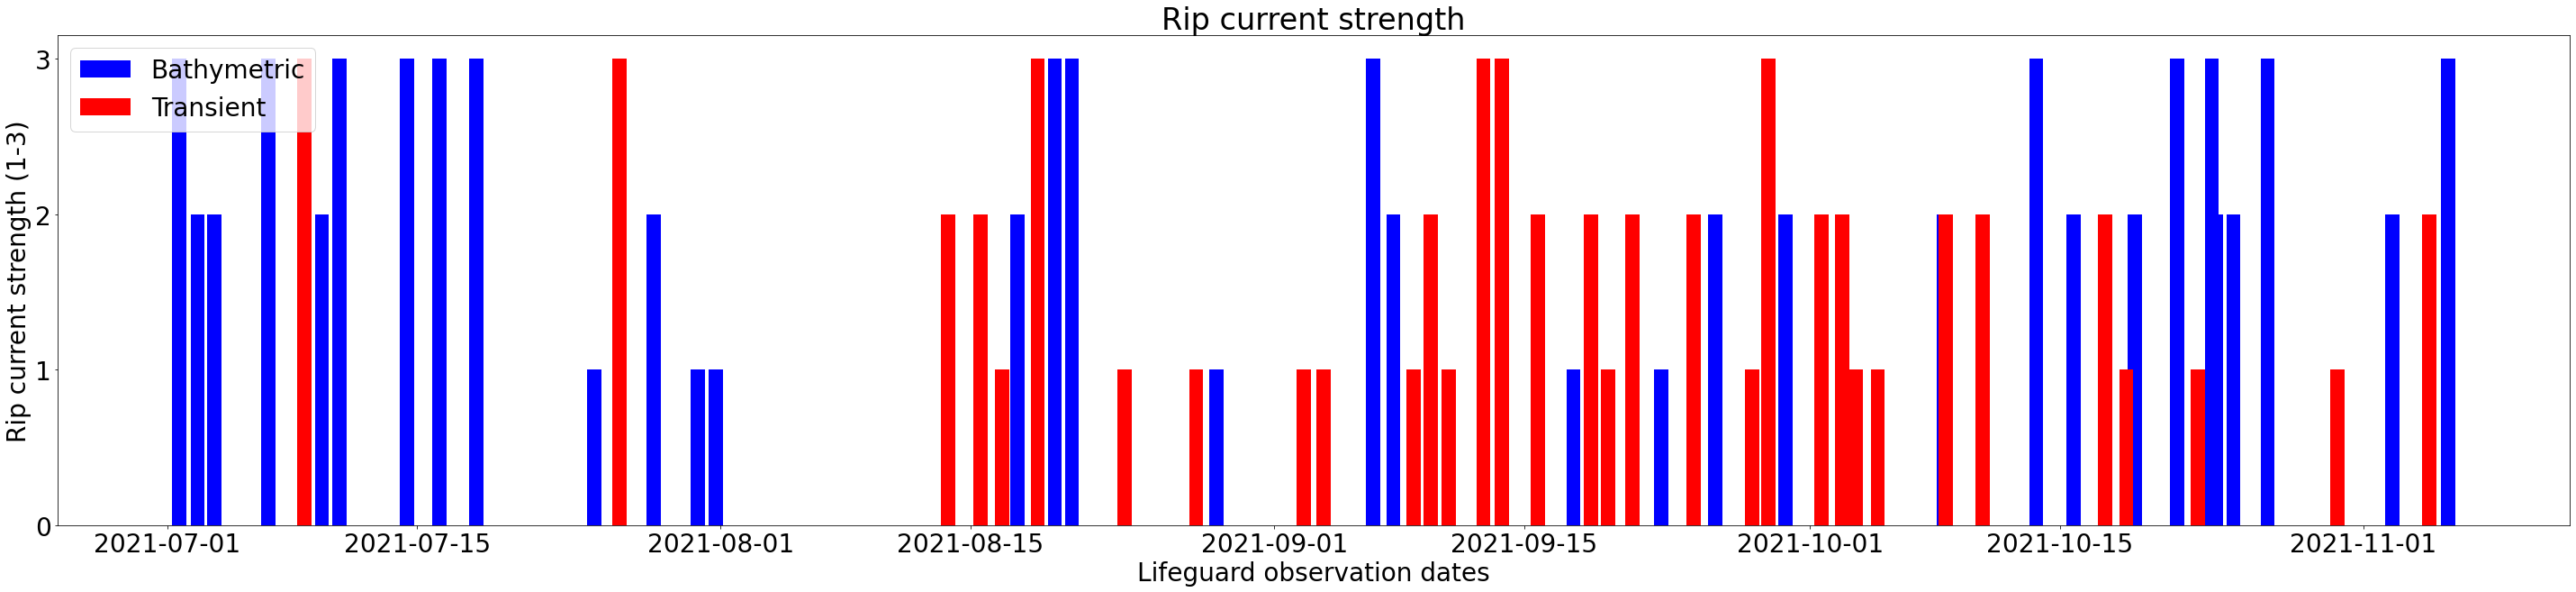

In [58]:
fig, ax = plt.subplots(nrows=1, figsize=(50,10))

plt.bar(dates, bathystrength, color = 'blue')
plt.bar(dates, transstrength, color = 'red')
plt.yticks(np.arange(0, 4, 1))
plt.xlabel("Lifeguard observation dates")
plt.ylabel("Rip current strength (1-3)")
plt.legend(["Bathymetric", "Transient"])
plt.title("Rip current strength")

In [59]:
count = 0

for i in range(len(transstrength)):
    if transstrength == 3:
        count+=1
        
print(count)

0
0


In [60]:
count = 0
for i in range(len(transindices)):
    use = transindices[i]
    print(transstrength[use])
    count += 1

print(count)

3.0
3.0
2.0
2.0
1.0
3.0
1.0
1.0
1.0
1.0
1.0
2.0
1.0
3.0
3.0
2.0
2.0
1.0
2.0
2.0
1.0
3.0
2.0
2.0
1.0
1.0
2.0
2.0
2.0
1.0
1.0
1.0
2.0
33
3.0
3.0
2.0
2.0
1.0
3.0
1.0
1.0
1.0
1.0
1.0
2.0
1.0
3.0
3.0
2.0
2.0
1.0
2.0
2.0
1.0
3.0
2.0
2.0
1.0
1.0
2.0
2.0
2.0
1.0
1.0
1.0
2.0
33


Text(0.5, 0, 'Dates')

Text(0.5, 0, 'Dates')

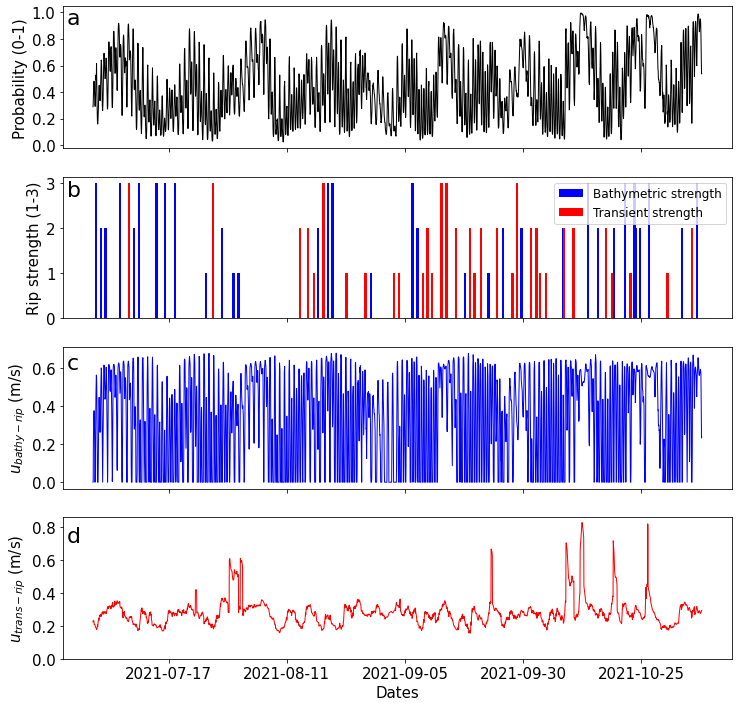

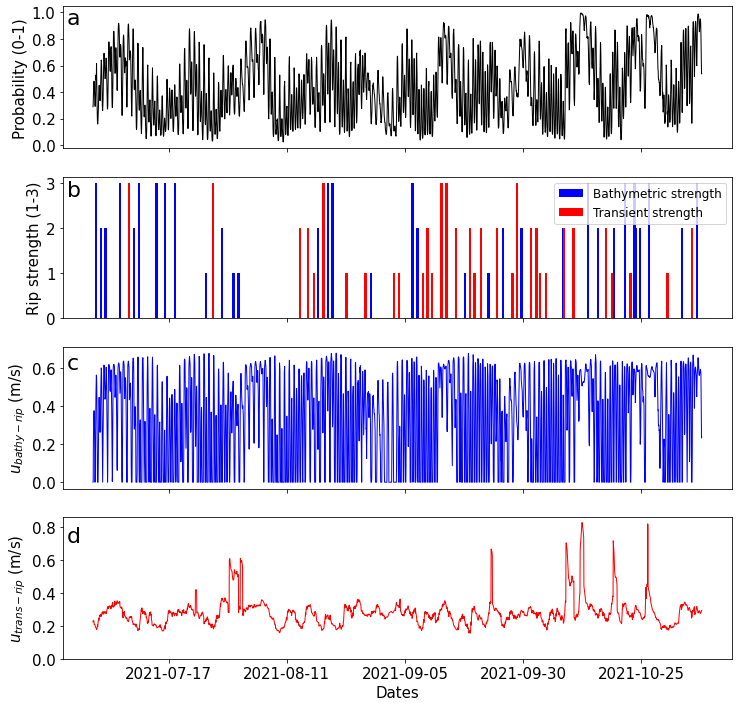

In [61]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(12, 12), sharex=True, sharey=False)

test = np.arange(0, 1.1, 0.2)
test_str = [str(round(t, 1)) for t in test]

test2 = np.arange(0, 4, 1)
test_str2 = [str(round(t, 1)) for t in test2 ]

test3 = np.arange(0, 0.8, 0.2)
test_str3 = [str(round(t, 1)) for t in test3 ]

test4 = np.arange(0, 1, 0.2)
test_str4 = [str(round(t, 1)) for t in test4 ]

plt.figtext(0.13, 0.86, 'a', fontsize = 22)
plt.figtext(0.13, 0.66, 'b', fontsize = 22)
plt.figtext(0.13, 0.46, 'c', fontsize = 22)
plt.figtext(0.13, 0.26, 'd', fontsize = 22)

ax1.tick_params(axis='both', which='major', labelsize=15)

ax1.plot(dates, probability, linewidth = 1, color = 'black')
ax1.set_yticks(test)
#ax1.yaxis.set_major_locator(plt.MaxNLocator(7))
ax1.set_yticklabels(test_str, fontsize=15)
ax1.set_ylabel("Probability (0-1)", fontsize = 15)

ax2.bar(dates, bathystrength, color = 'blue', width = 0.5)
ax2.bar(dates, transstrength, color = 'red', width = 0.5)
ax2.set_yticks(test2)
ax2.set_yticklabels(test_str2, fontsize=15)
ax2.legend(["Bathymetric strength", "Transient strength"], loc = 'upper right', fontsize = 12)
ax2.set_ylabel("Rip strength (1-3)", fontsize = 15)

ax3.plot(dates, bathyspeed, linewidth = 1, color = 'blue')
ax3.set_yticks(test3)
ax3.set_yticklabels(test_str3, fontsize=15)
ax3.set_ylabel("$u_{bathy-rip}$ (m/s)", fontsize = 15)

ax4.tick_params(axis='both', which='major', labelsize=15)

ax4.plot(dates, transspeed, linewidth = 1, color = 'red')
ax4.set_yticks(test4)
ax4.set_yticklabels(test_str4, fontsize=15)
ax4.set_ylabel("$u_{trans-rip}$ (m/s)", fontsize = 15)
ax4.xaxis.set_major_locator(plt.MaxNLocator(6))
ax4.set_xlabel("Dates", fontsize = 15)

In [62]:
#transient lifeguard reliability diagram using just the strength rating 

binwidth = 0.2
bincenter = [0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95]
#bincenter = [0.1, 0.3, 0.5, 0.7, 0.9]
lgtransproportions = []

for i in range(len(bincenter)):
    indexprob = []
    indexspeed = []
    lowedge = bincenter[i] - binwidth/2
    highedge = bincenter[i] + binwidth/2
    for i in range(len(transindices)):
        use = transindices[i]
        if probability[use] >= lowedge and probability[use] < highedge:
            indexprob.append(use)
    for i in range(len(indexprob)):
        use = indexprob[i]
        if transstrength[use] >= 2:
            indexspeed.append(use)
    if len(indexprob) == 0:
        lgtransproportions.append(np.nan)
    else:
        lgtransproportions.append(len(indexspeed)/len(indexprob))

In [63]:
#bathymetric lifeguard reliability diagram using just the strength rating 

binwidth = 0.2
#bincenter = [0.1, 0.3, 0.5, 0.7, 0.9]
bincenter = [0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95]
lgbathyproportions = []

for i in range(len(bincenter)):
    indexprob = []
    indexspeed = []
    lowedge = bincenter[i] - binwidth/2
    highedge = bincenter[i] + binwidth/2
    for i in range(len(bathyindices)):
        use = bathyindices[i]
        if probability[use] >= lowedge and probability[use] < highedge:
            indexprob.append(use)
    for i in range(len(indexprob)):
        use = indexprob[i]
        if bathystrength[use] >= 2:
            indexspeed.append(use)
    if len(indexprob) == 0:
        lgbathyproportions.append(np.nan)
    else:
        lgbathyproportions.append(len(indexspeed)/len(indexprob))

In [64]:
#maximum lifeguard reliability diagram using just the strength rating 

binwidth = 0.2
bincenter = [0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95]
#bincenter = [0.1, 0.3, 0.5, 0.7, 0.9]
lgoverallproportions = []

for i in range(len(bincenter)):
    indexprob = []
    indexspeed = []
    lowedge = bincenter[i] - binwidth/2
    highedge = bincenter[i] + binwidth/2
    for i in range(len(indices)):
        use = indices[i]
        if probability[use] >= lowedge and probability[use] < highedge:
            indexprob.append(use)
    for i in range(len(indexprob)):
        use = indexprob[i]
        if ripstrength[use] >= 2:
            indexspeed.append(use)
    if len(indexprob) == 0:
        lgoverallproportions.append(np.nan)
    else:
        lgoverallproportions.append(len(indexspeed)/len(indexprob))

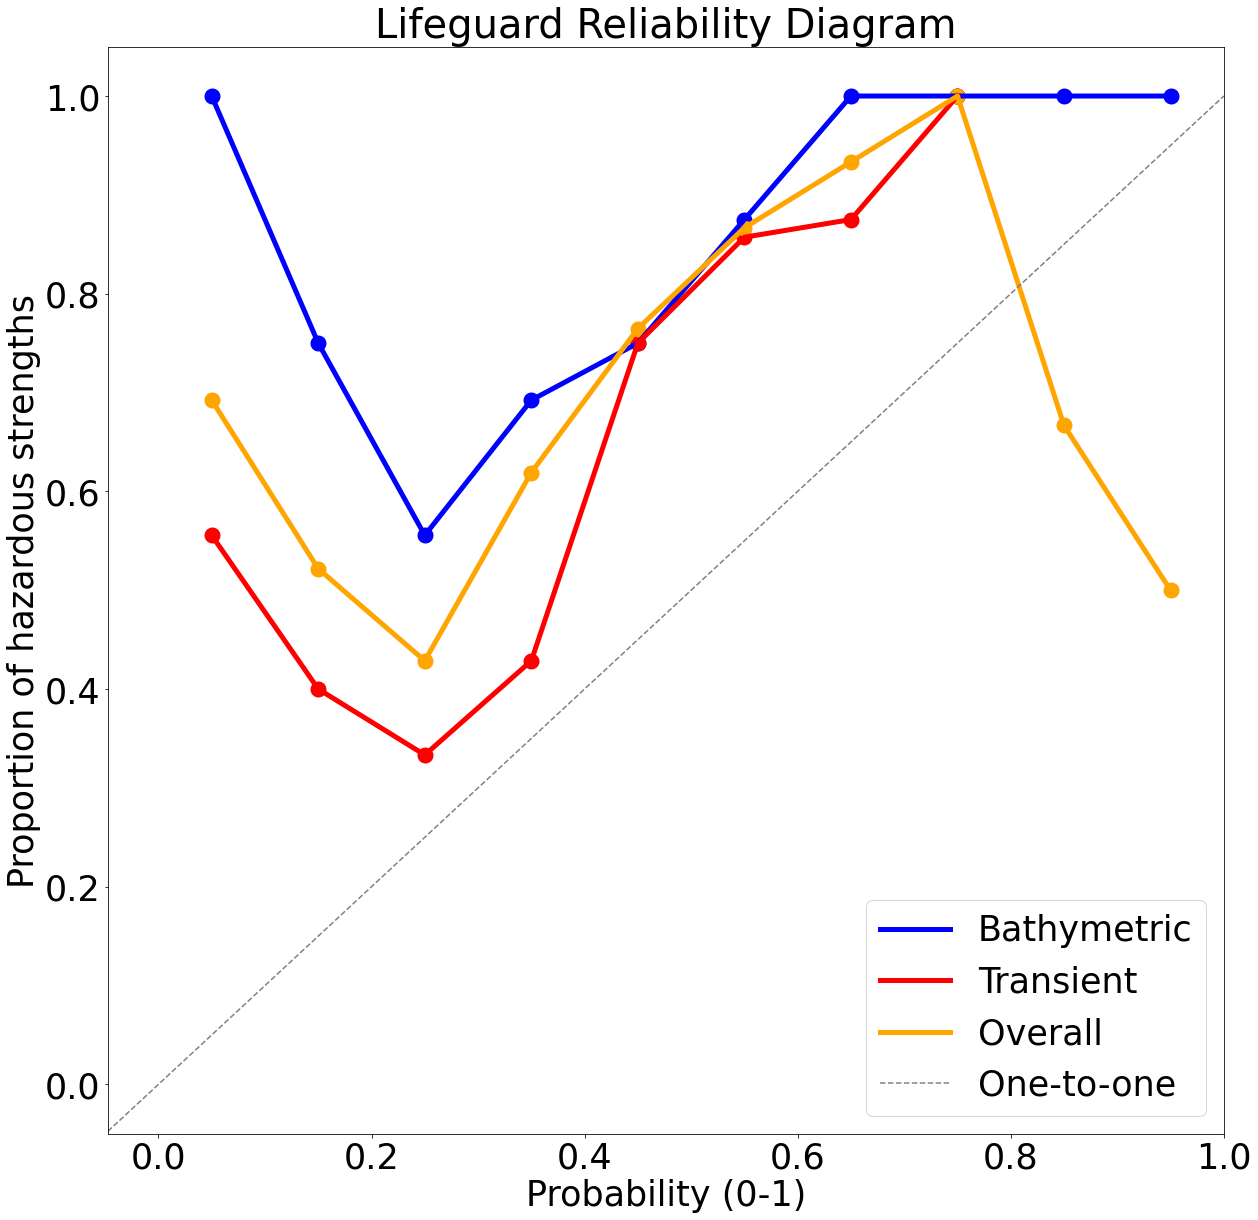

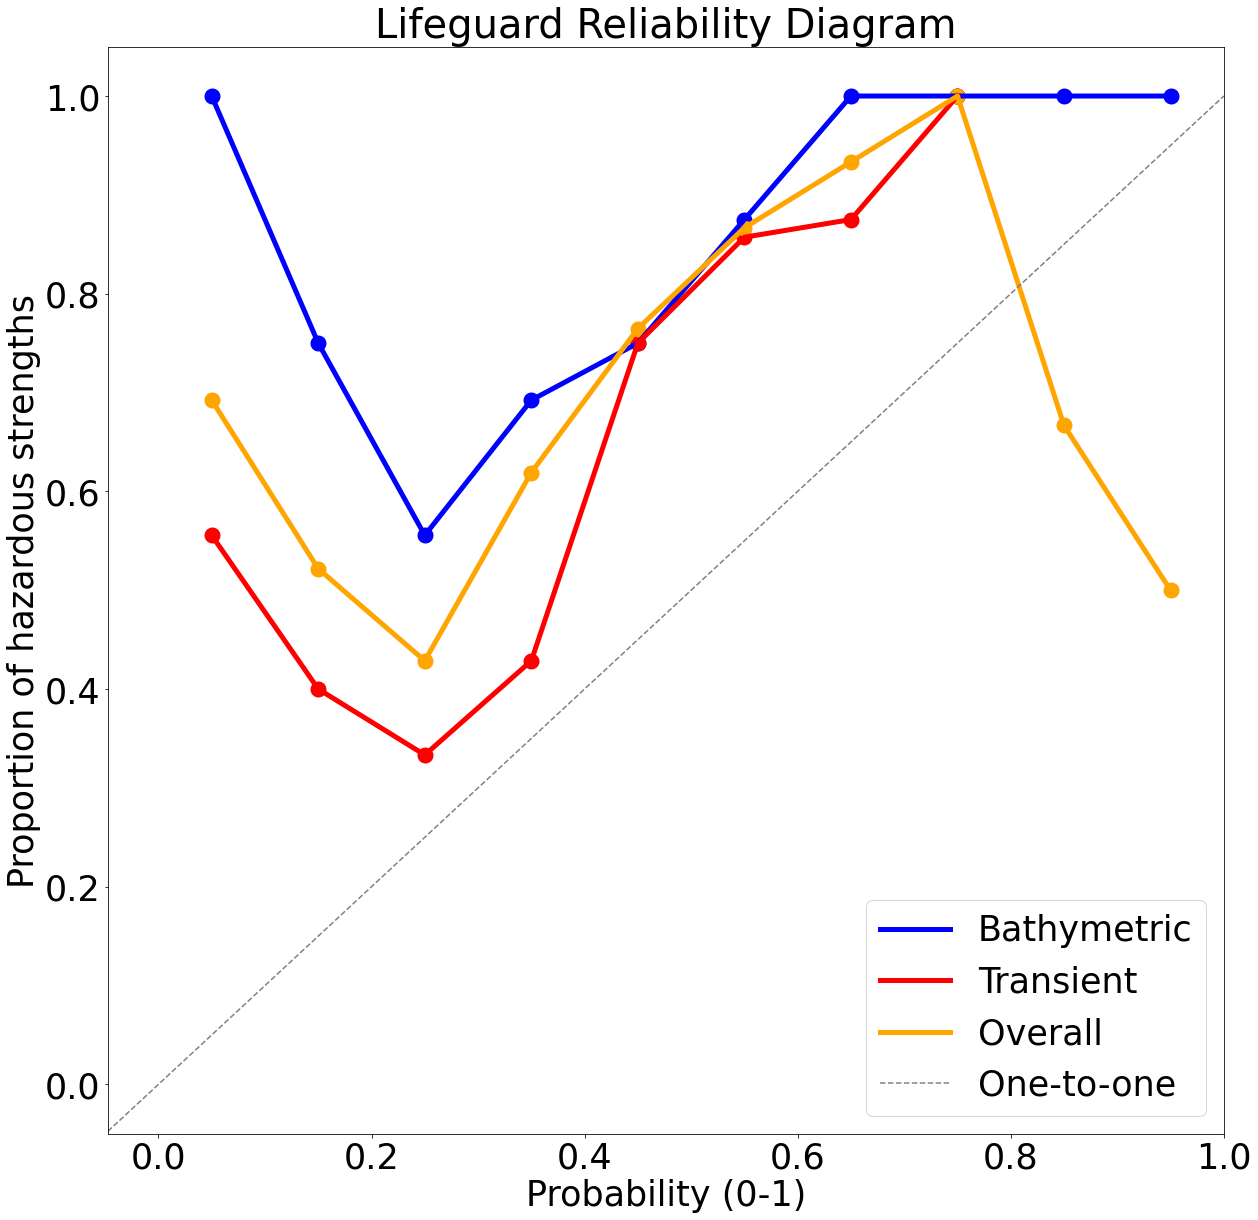

In [66]:
fig, ax = plt.subplots(nrows=1, figsize=(20,20))

bincenter = [0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95]
#bincenter = [0.1, 0.3, 0.5, 0.7, 0.9]

test = np.arange(0,1.1,0.2)
test_str = [str(round(t, 1)) for t in test ]


plt.plot(bincenter, lgbathyproportions, linewidth = 5, color = 'blue')
plt.plot(bincenter, lgtransproportions, linewidth = 5, color = 'red')
plt.plot(bincenter, lgoverallproportions, linewidth = 5, color = 'orange')
plt.axline((0, 0), slope=1, linestyle = 'dashed', color = 'gray')
plt.scatter(bincenter, lgbathyproportions, linewidth = 10, color = 'blue')
plt.scatter(bincenter, lgtransproportions, linewidth = 10, color = 'red')
plt.scatter(bincenter, lgoverallproportions, linewidth = 10, color = 'orange')
ax.set_xticks(test)
ax.set_yticks(test)
ax.set_xticklabels(test_str, fontsize=35)
ax.set_yticklabels(test_str, fontsize=35)
plt.title("Lifeguard Reliability Diagram", fontsize = 40)
plt.xlabel("Probability (0-1)", fontsize = 35)
plt.ylabel("Proportion of hazardous strengths", fontsize = 35)
plt.legend(["Bathymetric", "Transient", "Overall", "One-to-one"], fontsize = 35)

#transient and overall align exactly

Text(0.5, 1.0, 'Overall lifeguard overallrefinement distribution')

Text(0.5, 1.0, 'Overall lifeguard overallrefinement distribution')

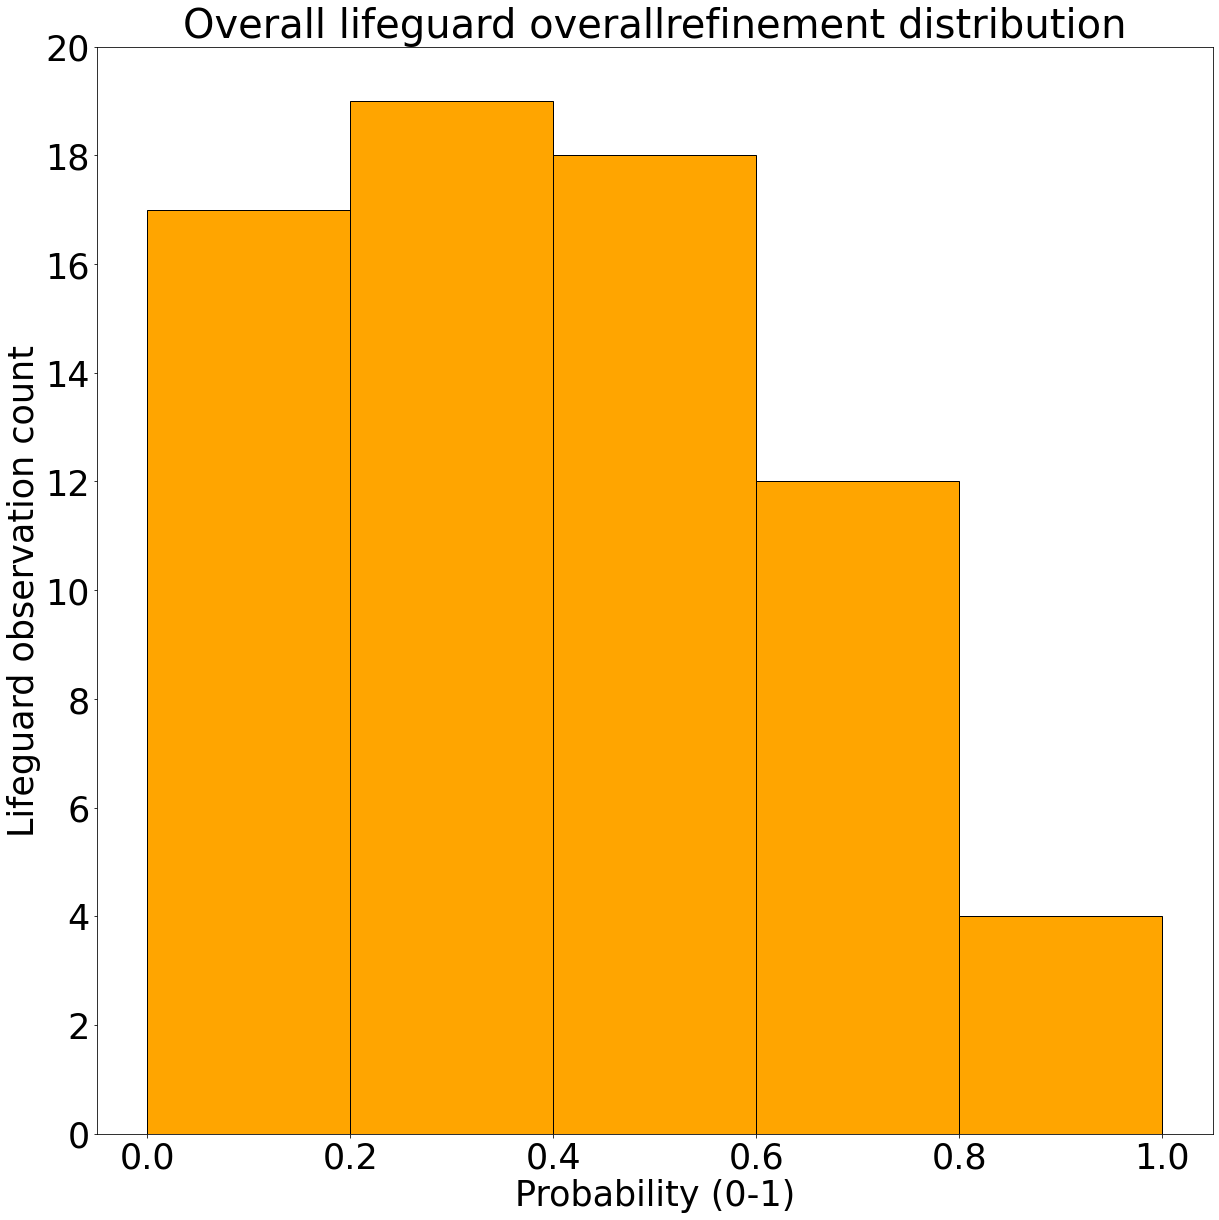

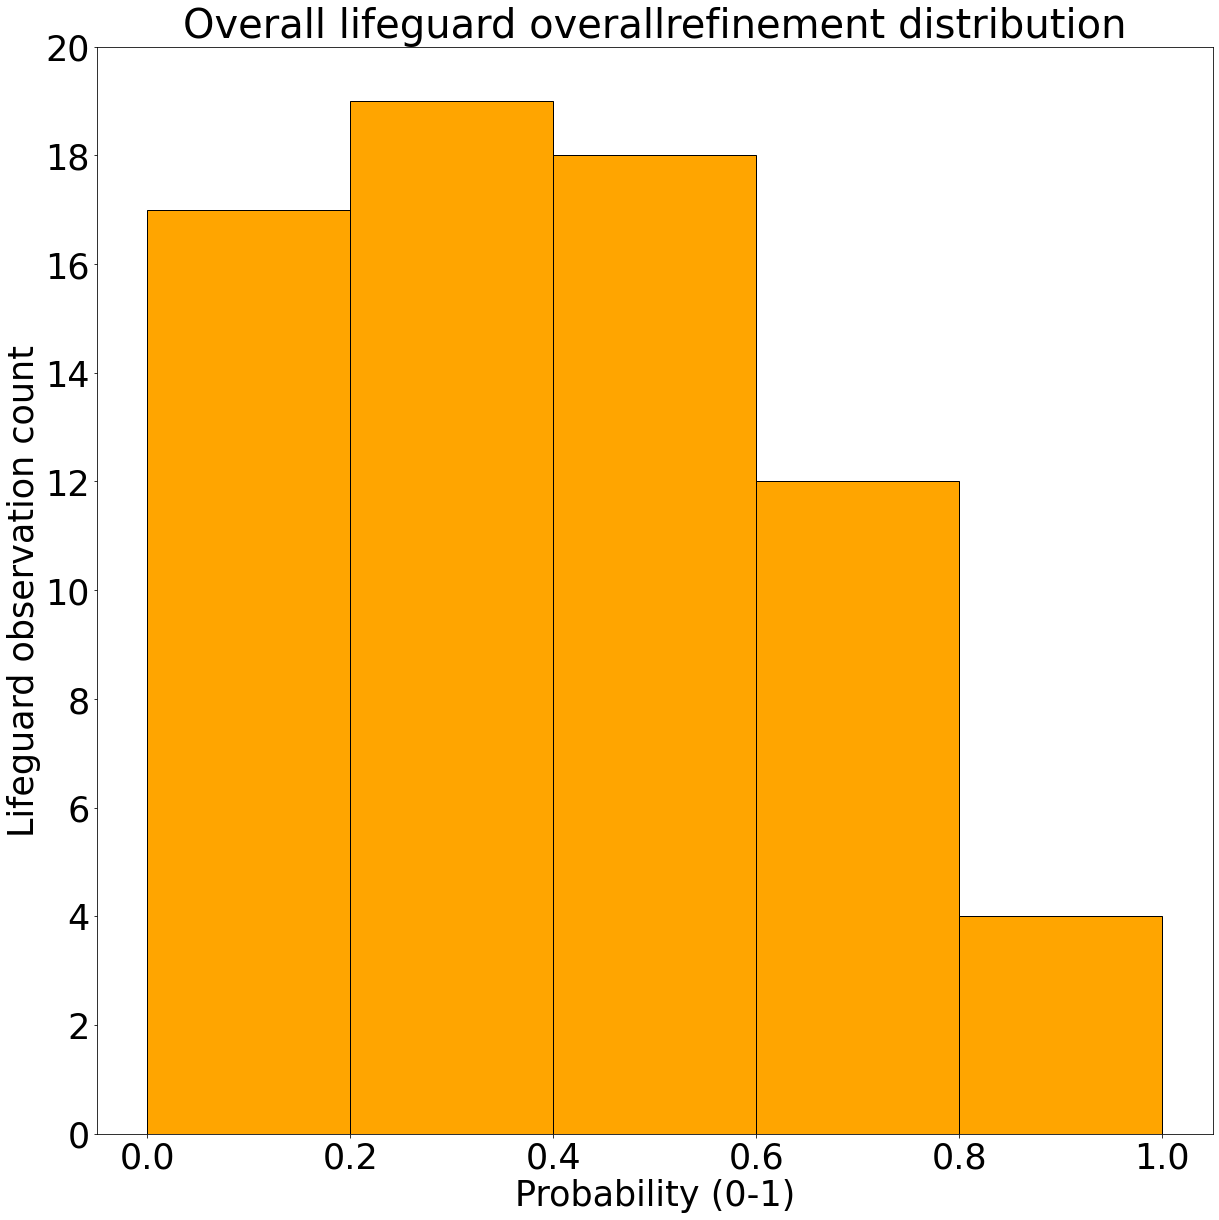

In [67]:
bincenter = [0.1, 0.3, 0.5, 0.7, 0.9]
#bincenter = [0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95]

overallrefinement = [0, 0, 0, 0, 0]
for i in range(len(indices)):
    use = indices[i]
    if probability[use] >= 0 and probability[use] < 0.20:
        overallrefinement[0]+= 1
    if probability[use] >= 0.20 and probability[use] < 0.40:
        overallrefinement[1]+= 1
    if probability[use] >= 0.4 and probability[use] < 0.60:
        overallrefinement[2]+= 1
    if probability[use] >= 0.6 and probability[use] < 0.80:
        overallrefinement[3]+= 1
    if probability[use] >= 0.8 and probability[use] < 1:
        overallrefinement[4]+= 1
        
        
overallrefinement

fig, ax = plt.subplots(nrows=1, figsize=(20,20))

test = np.arange(0,1.1,0.2)
test_str = [str(round(t, 1)) for t in test ]

test2 = np.arange(0,21,2)
test_str2 = [str(round(t, 1)) for t in test2 ]
    
plt.bar(bincenter, overallrefinement, width = 0.2, align="center", color = 'orange', ec="black")
ax.set_xticks(test)
ax.set_yticks(test2)
ax.set_xticklabels(test_str, fontsize=35)
ax.set_yticklabels(test_str2, fontsize=35)
plt.xlabel("Probability (0-1)", fontsize=35)
plt.ylabel("Lifeguard observation count", fontsize=35)
plt.title("Overall lifeguard overallrefinement distribution", fontsize=40)


Text(0.5, 1.0, 'Bathymetric lifeguard refinement distribution')

Text(0.5, 1.0, 'Bathymetric lifeguard refinement distribution')

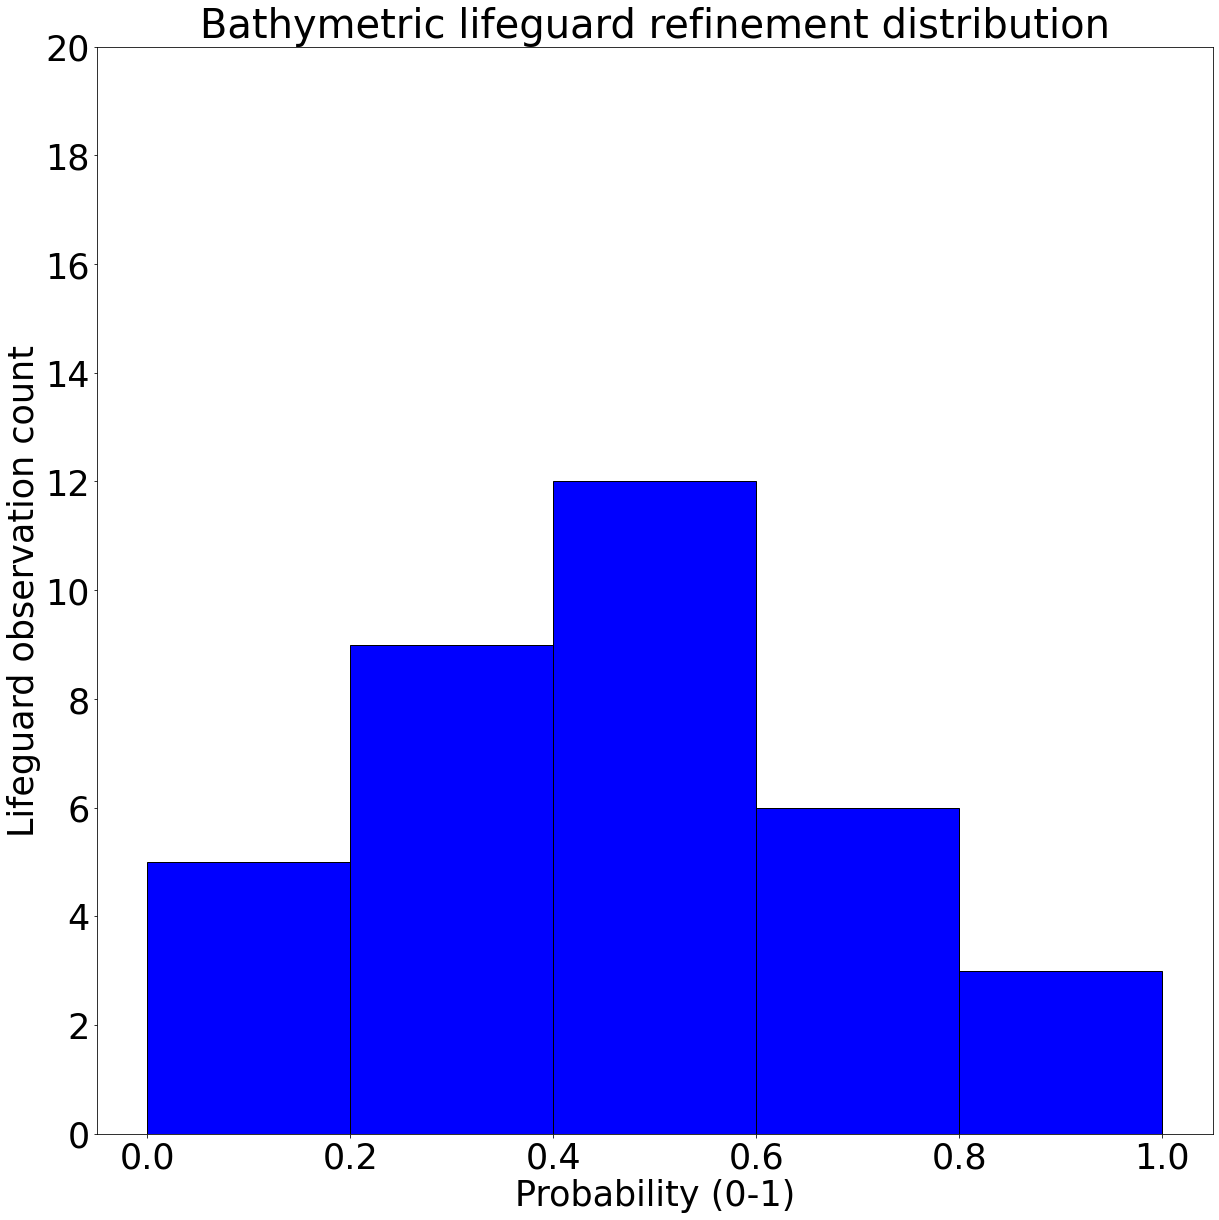

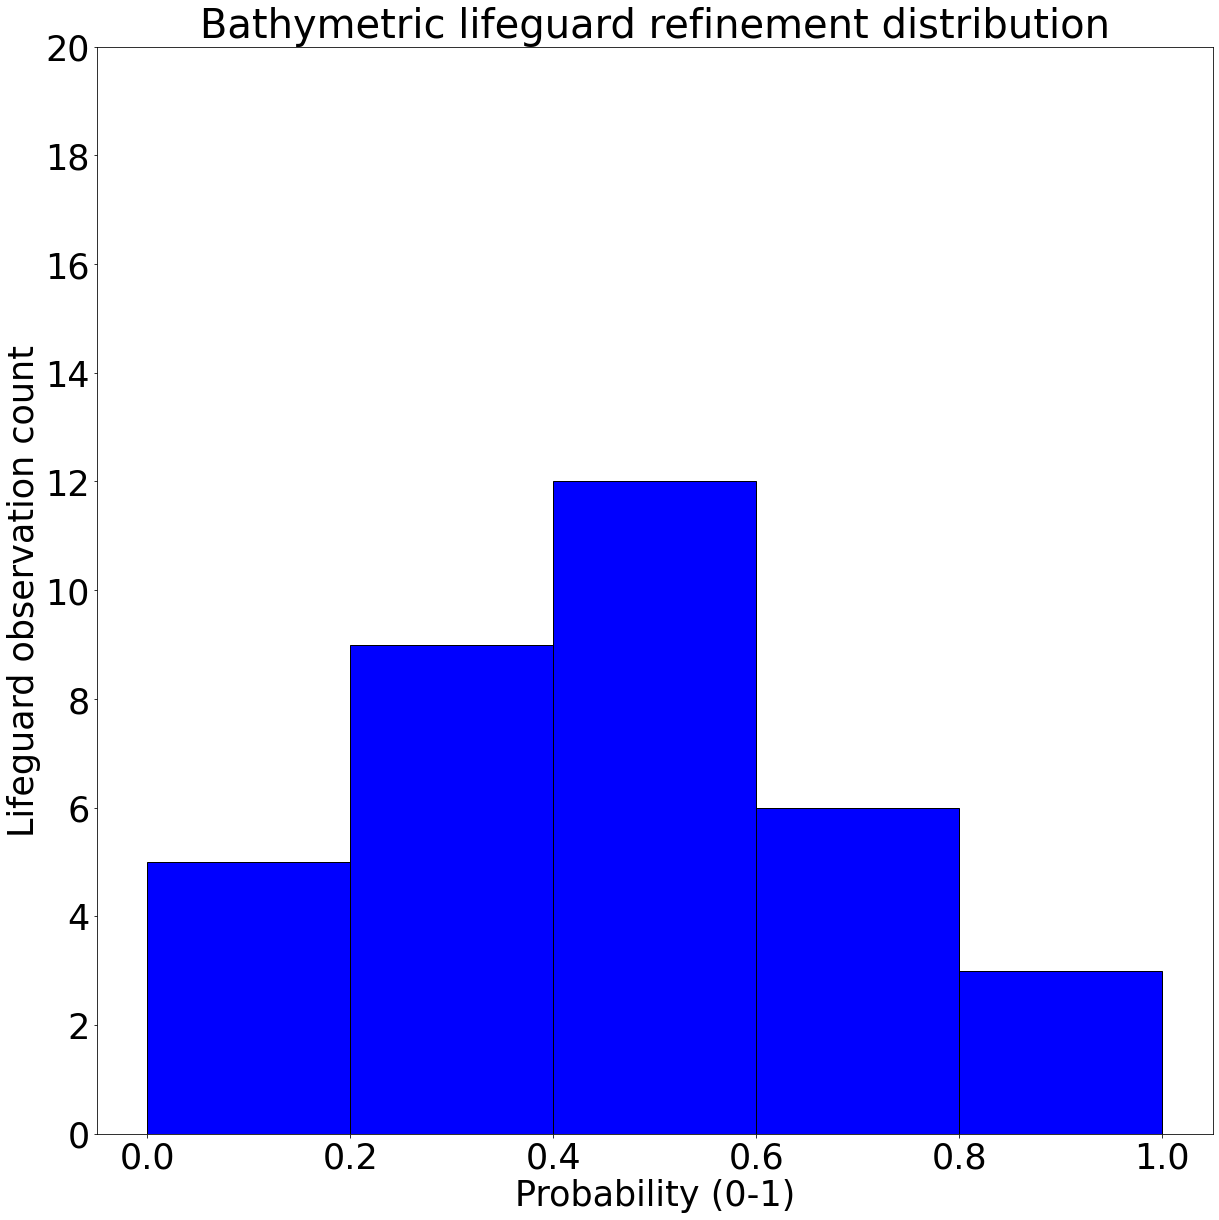

In [68]:
bincenter = [0.1, 0.3, 0.5, 0.7, 0.9]
#bincenter = [0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95]
bathyrefinement = [0, 0, 0, 0, 0]
for i in range(len(bathyindices)):
    use = bathyindices[i]
    if probability[use] >= 0 and probability[use] < 0.20:
        bathyrefinement[0]+= 1
    if probability[use] >= 0.20 and probability[use] < 0.40:
        bathyrefinement[1]+= 1
    if probability[use] >= 0.4 and probability[use] < 0.60:
        bathyrefinement[2]+= 1
    if probability[use] >= 0.6 and probability[use] < 0.80:
        bathyrefinement[3]+= 1
    if probability[use] >= 0.8 and probability[use] < 1:
        bathyrefinement[4]+= 1
        
        
bathyrefinement

fig, ax = plt.subplots(nrows=1, figsize=(20,20))

test = np.arange(0,1.1,0.2)
test_str = [str(round(t, 1)) for t in test ]

test2 = np.arange(0,21,2)
test_str2 = [str(round(t, 1)) for t in test2 ]

    
plt.bar(bincenter, bathyrefinement, width = 0.2, align="center", color = 'blue', ec="black")
ax.set_xticks(test)
ax.set_yticks(test2)
ax.set_xticklabels(test_str, fontsize=35)
ax.set_yticklabels(test_str2, fontsize=35)
plt.xlabel("Probability (0-1)", fontsize = 35)
plt.ylabel("Lifeguard observation count", fontsize = 35)
plt.title("Bathymetric lifeguard refinement distribution", fontsize = 40)

Text(0.5, 1.0, 'Transient lifeguard refinement distribution')

Text(0.5, 1.0, 'Transient lifeguard refinement distribution')

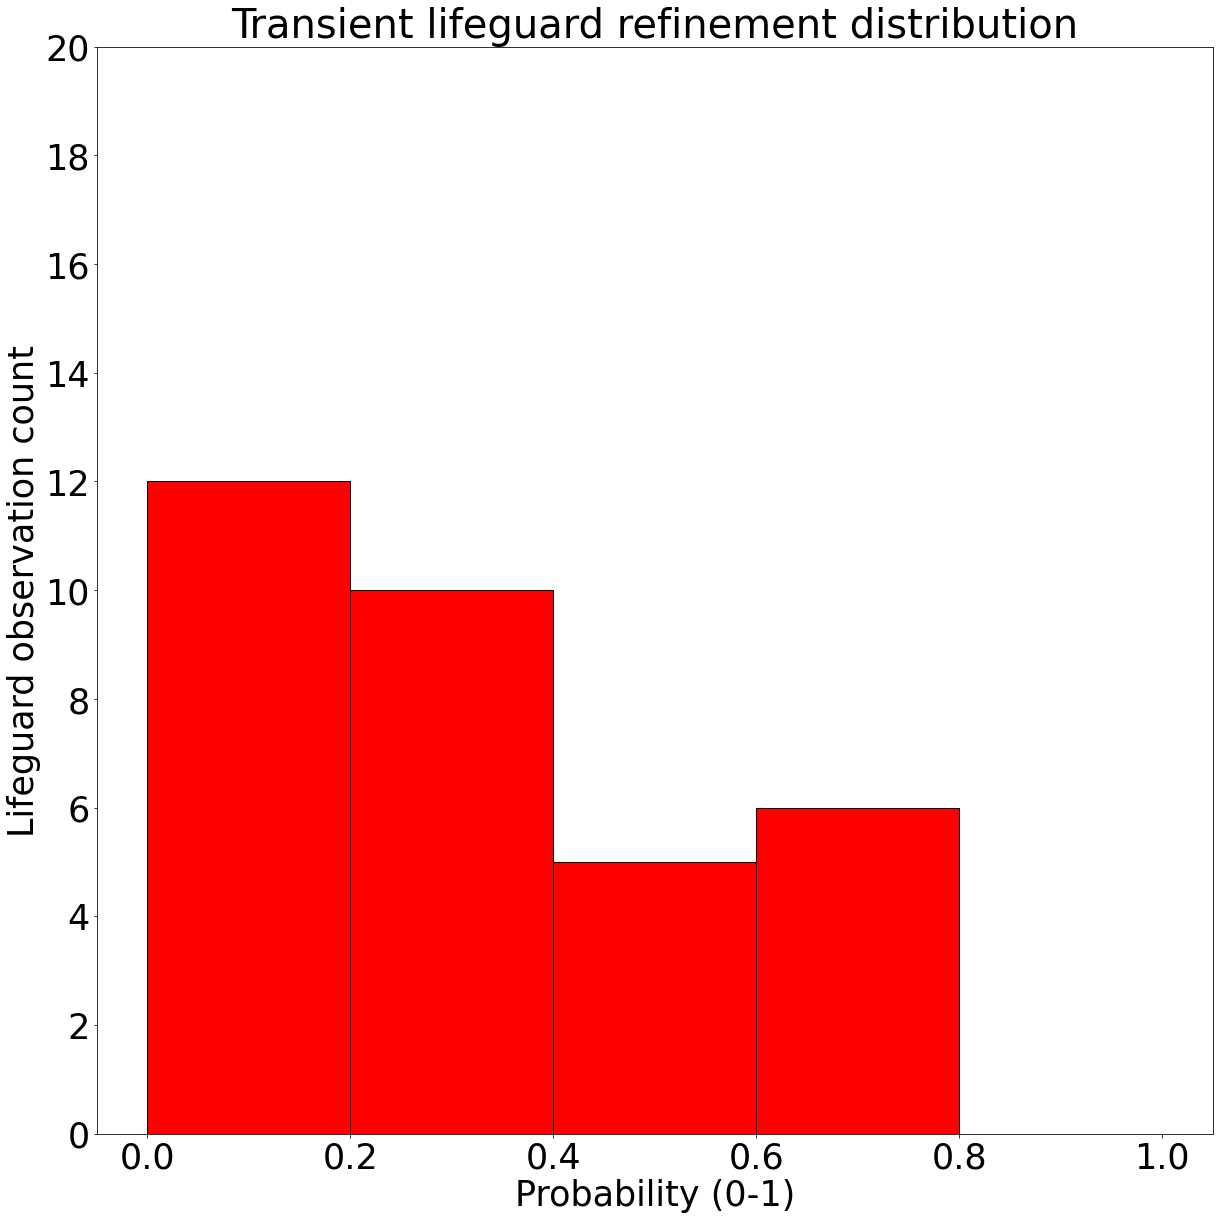

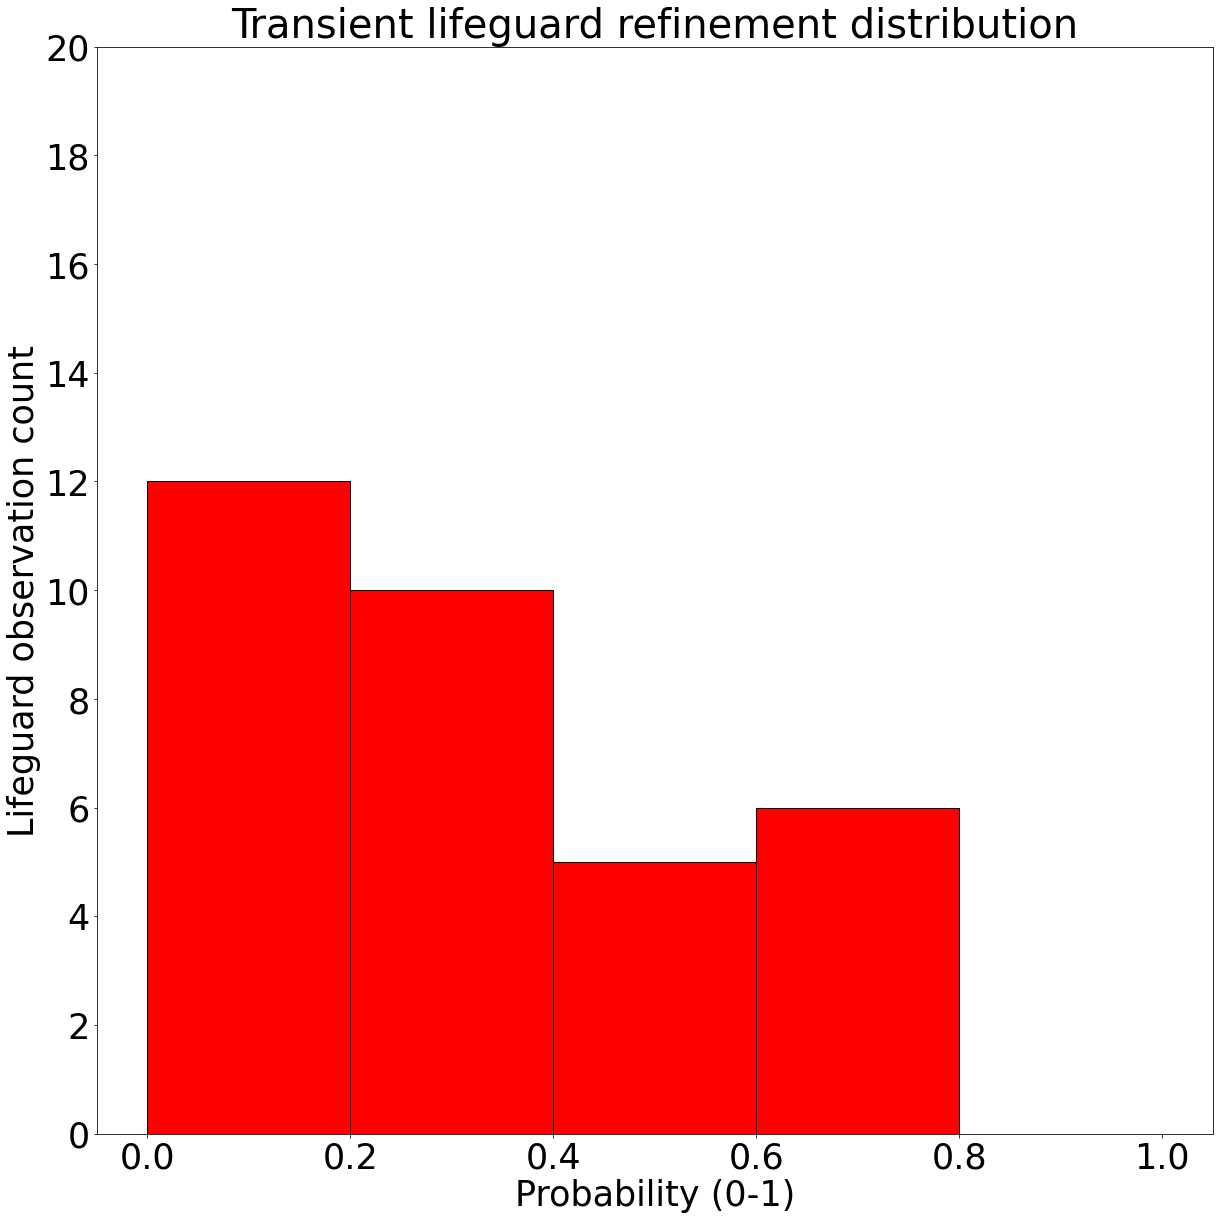

In [69]:
bincenter = [0.1, 0.3, 0.5, 0.7, 0.9]
#bincenter = [0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95]
transrefinement = [0, 0, 0, 0, 0]
for i in range(len(transindices)):
    use = transindices[i]
    if probability[use] >= 0 and probability[use] < 0.20:
        transrefinement[0]+= 1
    if probability[use] >= 0.20 and probability[use] < 0.40:
        transrefinement[1]+= 1
    if probability[use] >= 0.4 and probability[use] < 0.60:
        transrefinement[2]+= 1
    if probability[use] >= 0.6 and probability[use] < 0.80:
        transrefinement[3]+= 1
    if probability[use] >= 0.8 and probability[use] < 1:
        transrefinement[4]+= 1
        
        
transrefinement

fig, ax = plt.subplots(nrows=1, figsize=(20,20))

test = np.arange(0,1.1,0.2)
test_str = [str(round(t, 1)) for t in test ]

test2 = np.arange(0,21,2)
test_str2 = [str(round(t, 1)) for t in test2 ]

    
plt.bar(bincenter, transrefinement, width = 0.2, align="center", color = 'red', ec="black")
ax.set_xticks(test)
ax.set_yticks(test2)
ax.set_xticklabels(test_str, fontsize=35)
ax.set_yticklabels(test_str2, fontsize=35)
plt.xlabel("Probability (0-1)", fontsize=35)
plt.ylabel("Lifeguard observation count", fontsize=35)
plt.title("Transient lifeguard refinement distribution", fontsize=40)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

ValueError: shape mismatch: objects cannot be broadcast to a single shape

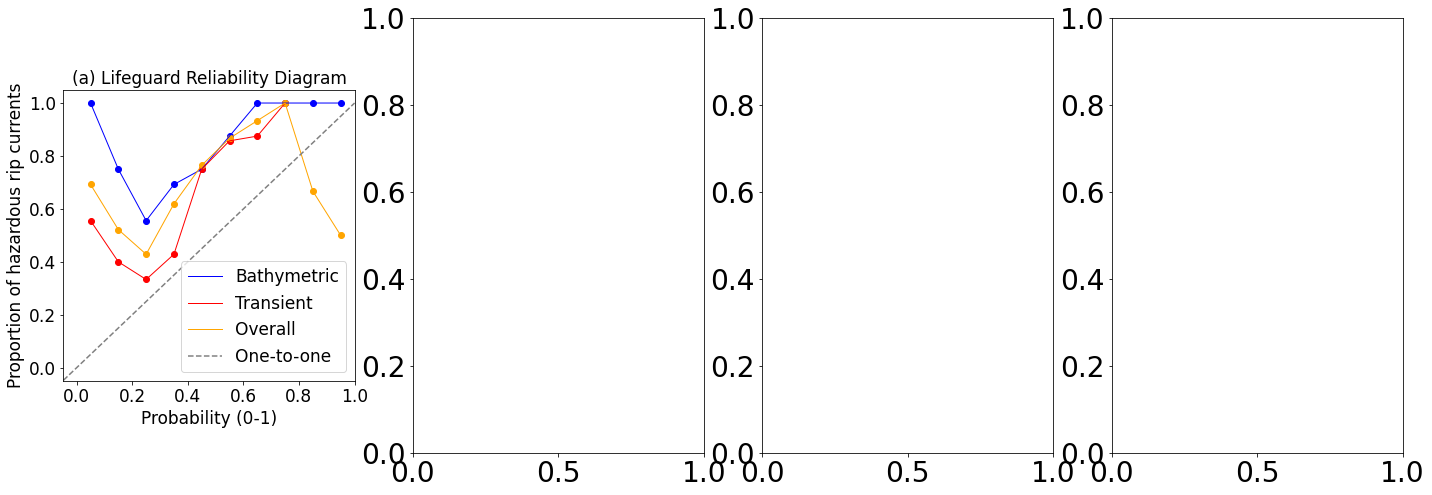

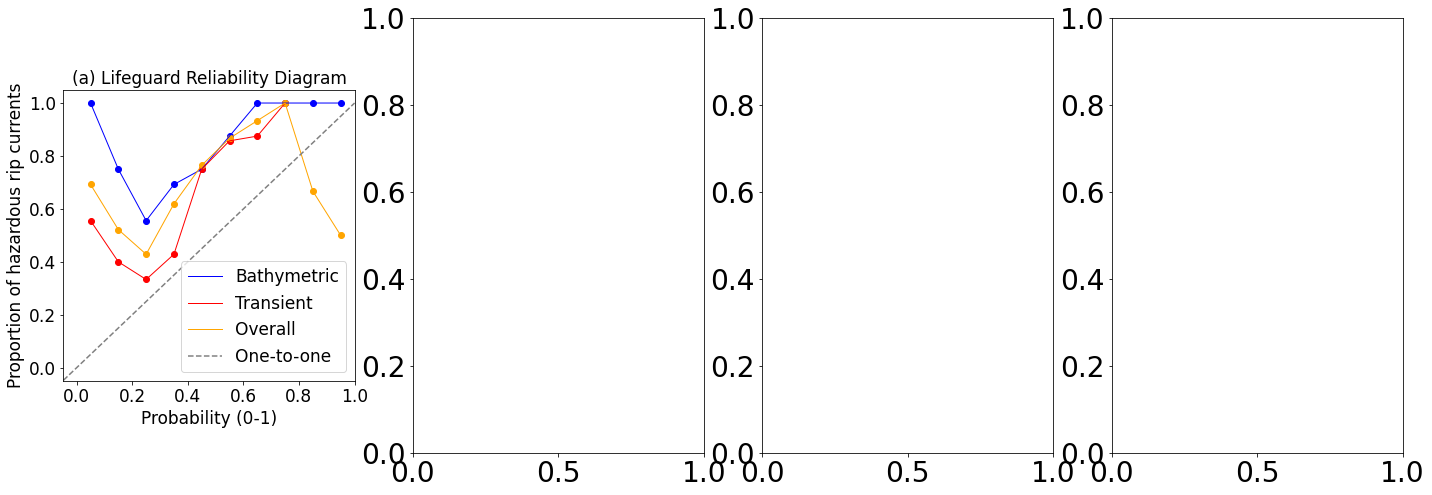

In [72]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24,8))

#bincenter = [0.1, 0.3, 0.5, 0.7, 0.9]
bincenter = [0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95]


test = np.arange(0,1.1,0.2)
test_str = [str(round(t, 1)) for t in test ]


ax1.plot(bincenter, lgbathyproportions, linewidth = 1, color = 'blue')
ax1.plot(bincenter, lgtransproportions, linewidth = 1, color = 'red')
ax1.plot(bincenter, lgoverallproportions, linewidth = 1, color = 'orange')
ax1.axline((0, 0), slope=1, linestyle = 'dashed', color = 'gray')
ax1.scatter(bincenter, lgbathyproportions, linewidth = 1, color = 'blue')
ax1.scatter(bincenter, lgtransproportions, linewidth = 1, color = 'red')
ax1.scatter(bincenter, lgoverallproportions, linewidth = 1, color = 'orange')
ax1.set_xticks(test)
ax1.set_yticks(test)
ax1.set_xticklabels(test_str, fontsize=17)
ax1.set_yticklabels(test_str, fontsize=17)
ax1.set_title("(a) Lifeguard Reliability Diagram", fontsize = 17)
ax1.set_xlabel("Probability (0-1)", fontsize = 17)
ax1.set_ylabel("Proportion of hazardous rip currents", fontsize = 17)
ax1.set_aspect(1.0/ax1.get_data_ratio(), adjustable='box')
ax1.legend(["Bathymetric", "Transient", "Overall", "One-to-one"], fontsize = 17)

test = np.arange(0,1.1,0.2)
test_str = [str(round(t, 1)) for t in test ]

test2 = np.arange(0,21,2)
test_str2 = [str(round(t, 1)) for t in test2 ]

    
ax2.bar(bincenter, bathyrefinement, width = 0.2, align="center", color = 'blue', ec="black")
ax2.set_xticks(test)
ax2.set_yticks(test2)
ax2.set_xticklabels(test_str, fontsize=17)
ax2.set_yticklabels(test_str2, fontsize=17)
ax2.set_xlabel("Probability (0-1)", fontsize = 17)
ax2.set_ylabel("Lifeguard observation count", fontsize = 17)
ax2.set_aspect(1.0/ax2.get_data_ratio(), adjustable='box')
ax2.set_title("(b) Bathymetric refinement distribution", fontsize = 17)

ax3.bar(bincenter, transrefinement, width = 0.2, align="center", color = 'red', ec="black")
ax3.set_xticks(test)
ax3.set_yticks(test2)
ax3.set_xticklabels(test_str, fontsize=17)
ax3.set_yticklabels(test_str2, fontsize=17)
ax3.set_xlabel("Probability (0-1)", fontsize=17)
ax3.set_ylabel("Lifeguard observation count", fontsize=17)
ax3.set_aspect(1.0/ax3.get_data_ratio(), adjustable='box')
ax3.set_title("(c) Transient refinement distribution", fontsize=17)

ax4.bar(bincenter, overallrefinement, width = 0.2, align="center", color = 'orange', ec="black")
ax4.set_xticks(test)
ax4.set_yticks(test2)
ax4.set_xticklabels(test_str, fontsize=17)
ax4.set_yticklabels(test_str2, fontsize=17)
ax4.set_xlabel("Probability (0-1)", fontsize=17)
ax4.set_ylabel("Lifeguard observation count", fontsize=17)
ax4.set_aspect(1.0/ax4.get_data_ratio(), adjustable='box')
ax4.set_title("(d) Overall refinement distribution", fontsize=17)

In [73]:
#chi-squared function

def chi_squared(probabilities, proportions):
    chi_squared = 0
    if len(probabilities) != len(proportions):
        print("Not the same length.")
    else:
        for i in range(len(proportions)):
            if np.isnan(proportions[i]):
                chi_squared += 0
            else:
                chi_squared += (proportions[i]-probabilities[i])**2 / probabilities[i]
    return chi_squared

In [74]:
binwidth = 0.1
bincenter = [0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95]
thresh_list = [0.1, 0.15, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6]
ptenbathy = []
pfifteenbathy = []
ptwentybathy = []
ptwentyonebathy = []
ptwentytwobathy = []
ptwentythreebathy = []
ptwentyfourbathy = []
ptwentyfivebathy = []
pthirtybathy = []
pthirtyfivebathy = []
pfortybathy = []
pfortyfivebathy = []
pfiftybathy = []
pfiftyfivebathy = []
psixtybathy = []
ptentrans = []
pfifteentrans = []
ptwentytrans = []
ptwentyonetrans = []
ptwentytwotrans = []
ptwentythreetrans = []
ptwentyfourtrans = []
ptwentyfivetrans = []
pthirtytrans = []
pthirtyfivetrans = []
pfortytrans = []
pfortyfivetrans = []
pfiftytrans = []
pfiftyfivetrans = []
psixtytrans = []
ptenmax = []
pfifteenmax = []
ptwentymax = []
ptwentyonemax = []
ptwentytwomax = []
ptwentythreemax = []
ptwentyfourmax = []
ptwentyfivemax = []
pthirtymax = []
pthirtyfivemax = []
pfortymax = []
pfortyfivemax = []
pfiftymax = []
pfiftyfivemax = []
psixtymax = []

for i in range(len(thresh_list)):
    histval = []
    threshold = thresh_list[i]
    for i in range(len(bincenter)):
        indexprob = []
        indexspeed = []
        lowedge = bincenter[i] - binwidth/2
        highedge = bincenter[i] + binwidth/2
        for i in range(len(probability)):
            if probability[i] >= lowedge and probability[i] < highedge:
                indexprob.append(i)
        for i in range(len(indexprob)):
            use = indexprob[i]
            if bathyspeed[use] >= threshold:
                indexspeed.append(use)
        if len(indexprob) == 0:
            histval.append(np.nan)
        else:
            histval.append(len(indexspeed)/len(indexprob))
        if threshold == 0.1:
            ptenbathy = histval
        elif threshold == 0.15:
            pfifteenbathy = histval
        elif threshold == 0.20:
            ptwentybathy = histval
        elif threshold == 0.21:
            ptwentyonebathy = histval
        elif threshold == 0.22:
            ptwentytwobathy = histval
        elif threshold == 0.23:
            ptwentythreebathy = histval
        elif threshold == 0.24:
            ptwentyfourbathy = histval
        elif threshold == 0.25:
            ptwentyfivebathy = histval
        elif threshold == 0.3:
            pthirtybathy = histval
        elif threshold == 0.35:
            pthirtyfivebathy = histval
        elif threshold == 0.4:
            pfortybathy = histval
        elif threshold == 0.45:
            pfortyfivebathy = histval
        elif threshold == 0.5:
            pfiftybathy = histval
        elif threshold == 0.55:
            pfiftyfivebathy = histval
        elif threshold == 0.6:
            psixtybathy = histval

for i in range(len(thresh_list)):
    histval = []
    threshold = thresh_list[i]
    for i in range(len(bincenter)):
        indexprob = []
        indexspeed = []
        lowedge = bincenter[i] - binwidth/2
        highedge = bincenter[i] + binwidth/2
        for i in range(len(probability)):
            if probability[i] >= lowedge and probability[i] < highedge:
                indexprob.append(i)
        for i in range(len(indexprob)):
            use = indexprob[i]
            if transspeed[use] >= threshold:
                indexspeed.append(use)
        if len(indexprob) == 0:
            histval.append(np.nan)
        else:
            histval.append(len(indexspeed)/len(indexprob))
        if threshold == 0.1:
            ptentrans = histval
        elif threshold == 0.15:
            pfifteentrans = histval
        elif threshold == 0.20:
            ptwentytrans = histval
        elif threshold == 0.21:
            ptwentyonetrans = histval
        elif threshold == 0.22:
            ptwentytwotrans = histval
        elif threshold == 0.23:
            ptwentythreetrans = histval
        elif threshold == 0.24:
            ptwentyfourtrans = histval
        elif threshold == 0.25:
            ptwentyfivetrans = histval
        elif threshold == 0.3:
            pthirtytrans = histval
        elif threshold == 0.35:
            pthirtyfivetrans = histval
        elif threshold == 0.4:
            pfortytrans = histval
        elif threshold == 0.45:
            pfortyfivetrans = histval
        elif threshold == 0.5:
            pfiftytrans = histval
        elif threshold == 0.55:
            pfiftyfivetrans = histval
        elif threshold == 0.6:
            psixtytrans = histval
            

for i in range(len(thresh_list)):
    histval = []
    threshold = thresh_list[i]
    for i in range(len(bincenter)):
        indexprob = []
        indexspeed = []
        lowedge = bincenter[i] - binwidth/2
        highedge = bincenter[i] + binwidth/2
        for i in range(len(probability)):
            if probability[i] >= lowedge and probability[i] < highedge:
                indexprob.append(i)
        for i in range(len(indexprob)):
            use = indexprob[i]
            if maxspeed[use] >= threshold:
                indexspeed.append(use)
        if len(indexprob) == 0:
            histval.append(np.nan)
        else:
            histval.append(len(indexspeed)/len(indexprob))
        if threshold == 0.1:
            ptenmax = histval
        elif threshold == 0.15:
            pfifteenmax = histval
        elif threshold == 0.20:
            ptwentymax = histval
        elif threshold == 0.21:
            ptwentyonemax = histval
        elif threshold == 0.22:
            ptwentytwomax = histval
        elif threshold == 0.23:
            ptwentythreemax = histval
        elif threshold == 0.24:
            ptwentyfourmax = histval
        elif threshold == 0.25:
            ptwentyfivemax = histval
        elif threshold == 0.3:
            pthirtymax = histval
        elif threshold == 0.35:
            pthirtyfivemax = histval
        elif threshold == 0.4:
            pfortymax = histval
        elif threshold == 0.45:
            pfortyfivemax = histval
        elif threshold == 0.5:
            pfiftymax = histval
        elif threshold == 0.55:
            pfiftyfivemax = histval
        elif threshold == 0.6:
            psixtymax = histval

In [75]:
#chi-squared must be greater than 3.325 to say not close enough to one-to-one
bincenter = [0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95]
chi_ten = [0, 0, 0]
chi_bathy = chi_squared(bincenter, ptenbathy)
chi_trans = chi_squared(bincenter, ptentrans)
chi_max = chi_squared(bincenter, ptenmax)


chi_ten[0] = chi_bathy
chi_ten[1] = chi_trans
chi_ten[2] = chi_max

chi_ten

[2.5264842949515582, 27.665110603191096, 27.665110603191096]

[2.5264842949515582, 27.665110603191096, 27.665110603191096]

In [76]:
#chi-squared must be greater than 3.325 to say not close enough to one-to-one
bincenter = [0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95]
chi_fifteen = [0, 0, 0]
chi_bathy = chi_squared(bincenter, pfifteenbathy)
chi_trans = chi_squared(bincenter, pfifteentrans)
chi_max = chi_squared(bincenter, pfifteenmax)


chi_fifteen[0] = chi_bathy
chi_fifteen[1] = chi_trans
chi_fifteen[2] = chi_max

chi_fifteen

[2.256574091434313, 27.665110603191096, 27.665110603191096]

[2.256574091434313, 27.665110603191096, 27.665110603191096]

In [77]:
#chi-squared must be greater than 3.325 to say not close enough to one-to-one
bincenter = [0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95]
chi_twenty = [0, 0, 0]
chi_bathy = chi_squared(bincenter, ptwentybathy)
chi_trans = chi_squared(bincenter, ptwentytrans)
chi_max = chi_squared(bincenter, ptwentymax)


chi_twenty[0] = chi_bathy
chi_twenty[1] = chi_trans
chi_twenty[2] = chi_max

chi_twenty

[1.9567943472413463, 16.047276706897964, 17.29991833972626]

[1.9567943472413463, 16.047276706897964, 17.29991833972626]

In [78]:
#chi-squared must be greater than 3.325 to say not close enough to one-to-one
bincenter = [0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95]
chi_twentyfive = [0, 0, 0]
chi_bathy = chi_squared(bincenter, ptwentyfivebathy)
chi_trans = chi_squared(bincenter, ptwentyfivetrans)
chi_max = chi_squared(bincenter, ptwentyfivemax)


chi_twentyfive[0] = chi_bathy
chi_twentyfive[1] = chi_trans
chi_twentyfive[2] = chi_max

chi_twentyfive

[1.6625911339494788, 5.121769447311734, 7.410316960191422]

[1.6625911339494788, 5.121769447311734, 7.410316960191422]

In [79]:
#chi-squared must be greater than 3.325 to say not close enough to one-to-one
bincenter = [0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95]
chi_thirty = [0, 0, 0]
chi_bathy = chi_squared(bincenter, pthirtybathy)
chi_trans = chi_squared(bincenter, pthirtytrans)
chi_max = chi_squared(bincenter, pthirtymax)


chi_thirty[0] = chi_bathy
chi_thirty[1] = chi_trans
chi_thirty[2] = chi_max

chi_thirty

[1.2845730292721877, 0.7115727607640346, 1.4814300868762729]

[1.2845730292721877, 0.7115727607640346, 1.4814300868762729]

In [80]:
#chi-squared must be greater than 3.325 to say not close enough to one-to-one
bincenter = [0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95]
chi_thirtyfive = [0, 0, 0]
chi_bathy = chi_squared(bincenter, pthirtyfivebathy)
chi_trans = chi_squared(bincenter, pthirtyfivetrans)
chi_max = chi_squared(bincenter, pthirtyfivemax)


chi_thirtyfive[0] = chi_bathy
chi_thirtyfive[1] = chi_trans
chi_thirtyfive[2] = chi_max

chi_thirtyfive

[1.0715307312539493, 3.1957800296251078, 1.0598688817897708]

[1.0715307312539493, 3.1957800296251078, 1.0598688817897708]

In [81]:
#chi-squared must be greater than 3.325 to say not close enough to one-to-one
bincenter = [0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95]
chi_forty = [0, 0, 0]
chi_bathy = chi_squared(bincenter, pfortybathy)
chi_trans = chi_squared(bincenter, pfortytrans)
chi_max = chi_squared(bincenter, pfortymax)


chi_forty[0] = chi_bathy
chi_forty[1] = chi_trans
chi_forty[2] = chi_max

chi_forty

[0.9606031101918054, 3.6690906605878317, 0.906775277638043]

[0.9606031101918054, 3.6690906605878317, 0.906775277638043]

In [82]:
#chi-squared must be greater than 3.325 to say not close enough to one-to-one
bincenter = [0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95]
chi_fortyfive = [0, 0, 0]
chi_bathy = chi_squared(bincenter, pfortyfivebathy)
chi_trans = chi_squared(bincenter, pfortyfivetrans)
chi_max = chi_squared(bincenter, pfortyfivemax)


chi_fortyfive[0] = chi_bathy
chi_fortyfive[1] = chi_trans
chi_fortyfive[2] = chi_max

chi_fortyfive

[0.9436028336066152, 3.9318638542815316, 0.8103178438636588]

[0.9436028336066152, 3.9318638542815316, 0.8103178438636588]

In [83]:
#chi-squared must be greater than 3.325 to say not close enough to one-to-one
bincenter = [0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95]
chi_fifty = [0, 0, 0]
chi_bathy = chi_squared(bincenter, pfiftybathy)
chi_trans = chi_squared(bincenter, pfiftytrans)
chi_max = chi_squared(bincenter, pfiftymax)


chi_fifty[0] = chi_bathy
chi_fifty[1] = chi_trans
chi_fifty[2] = chi_max

chi_fifty

[1.051020639542259, 4.227510173439371, 0.8753193711331633]

[1.051020639542259, 4.227510173439371, 0.8753193711331633]

In [84]:
#chi-squared must be greater than 3.325 to say not close enough to one-to-one
bincenter = [0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95]
chi_fiftyfive = [0, 0, 0]
chi_bathy = chi_squared(bincenter, pfiftyfivebathy)
chi_trans = chi_squared(bincenter, pfiftyfivetrans)
chi_max = chi_squared(bincenter, pfiftyfivemax)


chi_fiftyfive[0] = chi_bathy
chi_fiftyfive[1] = chi_trans
chi_fiftyfive[2] = chi_max

chi_fiftyfive

[1.345621899614172, 4.416666573387942, 1.2125048376884888]

[1.345621899614172, 4.416666573387942, 1.2125048376884888]

In [85]:
bincenter = [0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95]
chi_sixty = [0, 0, 0]
chi_bathy = chi_squared(bincenter, psixtybathy)
chi_trans = chi_squared(bincenter, psixtytrans)
chi_max = chi_squared(bincenter, psixtymax)


chi_sixty[0] = chi_bathy
chi_sixty[1] = chi_trans
chi_sixty[2] = chi_max

chi_sixty

[2.102235937152563, 4.529265151595006, 1.8524375326795073]

[2.102235937152563, 4.529265151595006, 1.8524375326795073]

In [86]:
classes = ['0.10 m/s', '0.15 m/s', '0.20 m/s', '0.25 m/s', '0.30 m/s', '0.35 m/s', '0.40 m/s', '0.45 m/s', '0.50 m/s', '0.55 m/s', '0.60 m/s']
cases = ['Bathymetric', 'Transient', 'Maximum']
df = pd.DataFrame([chi_ten, chi_fifteen, chi_twenty, chi_twentyfive, chi_thirty, chi_thirtyfive, chi_forty, chi_fortyfive, chi_fifty, chi_fiftyfive, chi_sixty], classes, cases)

In [87]:
chi = pd.concat(
    [pd.concat(
        [df],
        keys=['Chi-squared value'], axis=1)],
    keys=['Threshold speed']
)

chi

Chi-squared value                      
                               Bathymetric  Transient    Maximum
Threshold speed 0.10 m/s          2.526484  27.665111  27.665111
                0.15 m/s          2.256574  27.665111  27.665111
                0.20 m/s          1.956794  16.047277  17.299918
                0.25 m/s          1.662591   5.121769   7.410317
                0.30 m/s          1.284573   0.711573   1.481430
                0.35 m/s          1.071531   3.195780   1.059869
                0.40 m/s          0.960603   3.669091   0.906775
                0.45 m/s          0.943603   3.931864   0.810318
                0.50 m/s          1.051021   4.227510   0.875319
                0.55 m/s          1.345622   4.416667   1.212505
                0.60 m/s          2.102236   4.529265   1.852438

Chi-squared value                      
                               Bathymetric  Transient    Maximum
Threshold speed 0.10 m/s          2.526484  27.665111  27.665111
                0.15 m/s          2.256574  27.665111  27.665111
                0.20 m/s          1.956794  16.047277  17.299918
                0.25 m/s          1.662591   5.121769   7.410317
                0.30 m/s          1.284573   0.711573   1.481430
                0.35 m/s          1.071531   3.195780   1.059869
                0.40 m/s          0.960603   3.669091   0.906775
                0.45 m/s          0.943603   3.931864   0.810318
                0.50 m/s          1.051021   4.227510   0.875319
                0.55 m/s          1.345622   4.416667   1.212505
                0.60 m/s          2.102236   4.529265   1.852438

In [88]:
chi.to_csv(r'C:\Moulton_Data\chi.csv', index = True, header = True)

In [89]:
#rerun reliability diagram with new bincenter to get

bincenter = [0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95]


chi_lg = [0, 0, 0]
chi_bathy = chi_squared(bincenter, lgbathyproportions)
chi_trans = chi_squared(bincenter, lgtransproportions)
chi_max = chi_squared(bincenter, lgoverallproportions)


chi_lg[0] = chi_bathy
chi_lg[1] = chi_trans
chi_lg[2] = chi_max


chi_lg = pd.DataFrame([chi_lg])
chi_lg

0         1         2
0  21.851184  6.106551  10.36877

0         1         2
0  21.851184  6.106551  10.36877

In [90]:
bincenter = [0.1, 0.3, 0.5, 0.7, 0.9]
chi_lg = [0, 0, 0]
chi_bathy = chi_squared(bincenter, lgbathyproportions)
chi_trans = chi_squared(bincenter, lgtransproportions)
chi_max = chi_squared(bincenter, lgoverallproportions)


chi_lg[0] = chi_bathy
chi_lg[1] = chi_trans
chi_lg[2] = chi_max


chi_lg = pd.DataFrame([chi_lg])
chi_lg

Not the same length.
Not the same length.
Not the same length.


0  1  2
0  0  0  0

Not the same length.
Not the same length.
Not the same length.


0  1  2
0  0  0  0

In [91]:
chi_lg
chi_lg.to_csv(r'C:\Moulton_Data\chi_lg.csv', index = True, header = True)

In [92]:
chi_lg

0  1  2
0  0  0  0

0  1  2
0  0  0  0

In [93]:
riptype = data['riptype'].to_numpy()
ripstrength = data['ripstrength'].to_numpy()
bathystrength = data['bathystrength'].to_numpy()
transstrength = data['transstrength'].to_numpy()

In [94]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

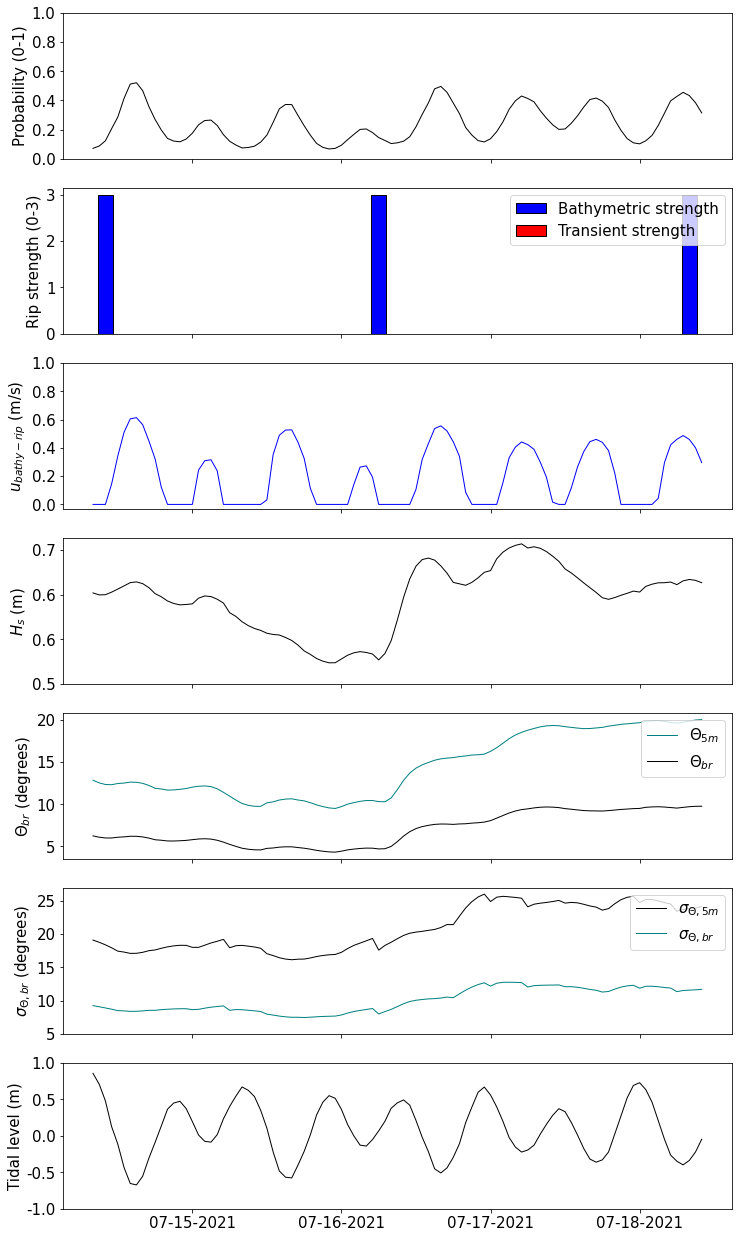

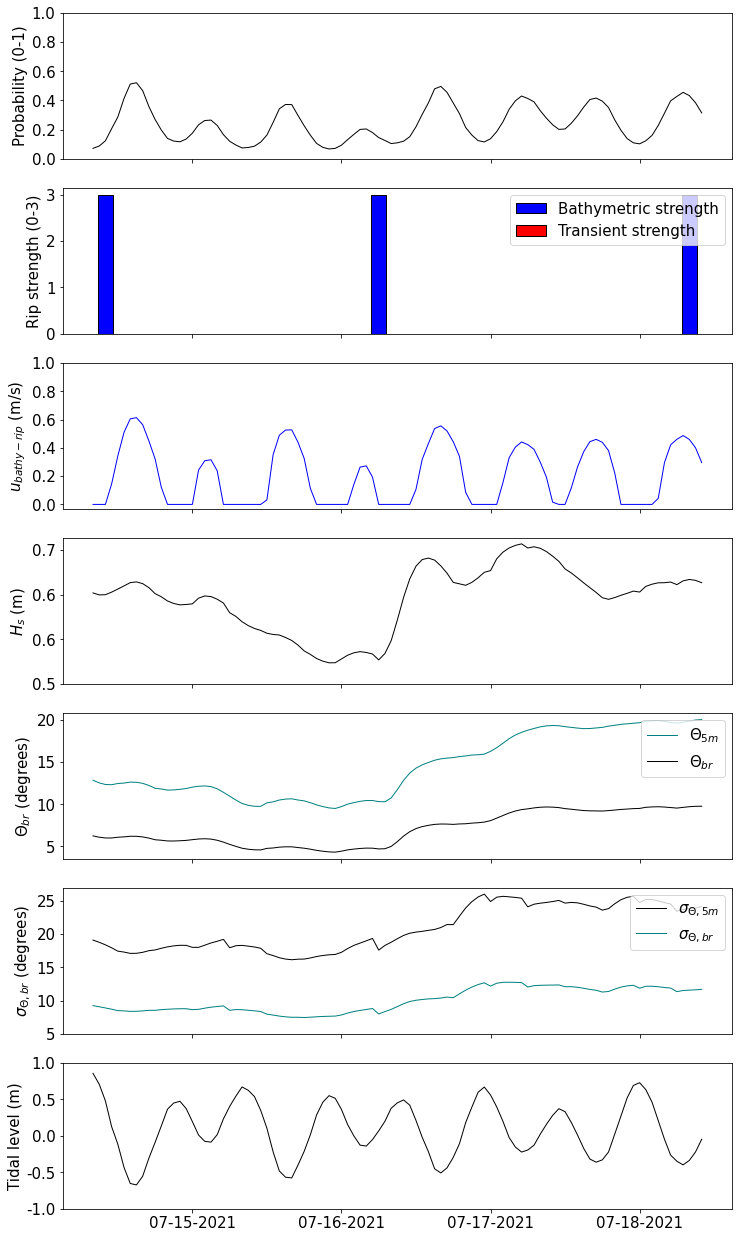

In [95]:
f, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(7, figsize=(12, 22), sharex=True, sharey=False)

test = np.arange(0,1.1,0.2)
test_str = [str(round(t, 1)) for t in test ]

test2 = np.arange(0, 4, 1)
test_str2 = [str(round(t, 1)) for t in test2 ]

test3 = np.arange(0, 1.1, 0.2)
test_str3 = [str(round(t, 1)) for t in test3 ]

test4 = np.arange(0.5, 0.7, 0.05)
test_str4 = [str(round(t, 1)) for t in test4 ]

test5 = np.arange(5, 25, 5)
test_str5 = [str(round(t, 1)) for t in test5 ]

test6 = np.arange(5, 26, 5)
test_str6 = [str(round(t, 1)) for t in test6 ]

test7 = np.arange(-1, 1.1, 0.5)
test_str7 = [str(round(t, 1)) for t in test7 ]

date_form = DateFormatter("%m-%d-%Y")
data['dates'] = pd.to_datetime(data['dates'])


ax1.plot(data['dates'].iloc[320:419], probability[320:419], linewidth = 1, color = 'black')
ax1.set_yticks(test)
ax1.set_yticklabels(test_str, fontsize=15)
ax1.set_ylabel("Probability (0-1)", fontsize = 15)

ax2.bar(data['dates'].iloc[320:419], bathystrength[320:419], width = 0.1, align="center", ec="black", color = 'blue')
ax2.bar(data['dates'].iloc[320:419], transstrength[320:419], width = 0.1, align="center", ec="black", color = 'red')
ax2.set_yticks(test2)
ax2.set_yticklabels(test_str2, fontsize=15)
ax2.legend(["Bathymetric strength", "Transient strength"], loc = 'upper right', fontsize = 15)
ax2.set_ylabel("Rip strength (0-3)", fontsize = 15)

ax3.plot(data['dates'].iloc[320:419], bathyspeed[320:419], color = 'blue', linewidth = 1)
ax3.set_yticks(test3)
ax3.set_yticklabels(test_str3, fontsize=15)
ax3.set_ylabel("$u_{bathy-rip}$ (m/s)", fontsize = 15)

ax4.plot(data['dates'].iloc[320:419], Hs[320:419], linewidth = 1, color = 'black')
ax4.set_yticks(test4)
ax4.set_yticklabels(test_str4, fontsize=15)
ax4.set_ylabel("$H_{s}$ (m)", fontsize = 15)

ax5.plot(data['dates'].iloc[320:419], origmwdsn[320:419], linewidth = 1, color = 'teal')
ax5.plot(data['dates'].iloc[320:419], mwdsn[320:419], linewidth = 1, color = 'black')
ax5.set_yticks(test5)
ax5.set_yticklabels(test_str5, fontsize=15)
ax5.legend(["$\Theta_{5m}$", "$\Theta_{br}$"], loc = 'upper right', fontsize = 15)
ax5.set_ylabel("$\Theta_{br}$ (degrees)", fontsize = 15)

ax6.plot(data['dates'].iloc[320:419], spread[320:419], linewidth = 1, color = 'black')
ax6.plot(data['dates'].iloc[320:419], counterspread[320:419], linewidth = 1, color = 'teal')
ax6.set_yticks(test6)
ax6.set_yticklabels(test_str6, fontsize=15)
ax6.legend(["$\sigma_{\Theta, 5m}$", "$\sigma_{\Theta, br}$"], loc = 'upper right', fontsize = 15)
ax6.set_ylabel("$\sigma_{\Theta, br}$ (degrees)", fontsize = 15)

ax7.tick_params(axis='both', which='major', labelsize=15)

ax7.plot(data['dates'].iloc[320:419], level[320:419], linewidth = 1, color = 'black')
ax7.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%Y'))
ax7.set_yticks(test7)
ax7.set_yticklabels(test_str7, fontsize=15)
ax7.set_ylabel("Tidal level (m)", fontsize = 15)
ax7.xaxis.set_major_locator(plt.MaxNLocator(5))


plt.savefig('bathytime')




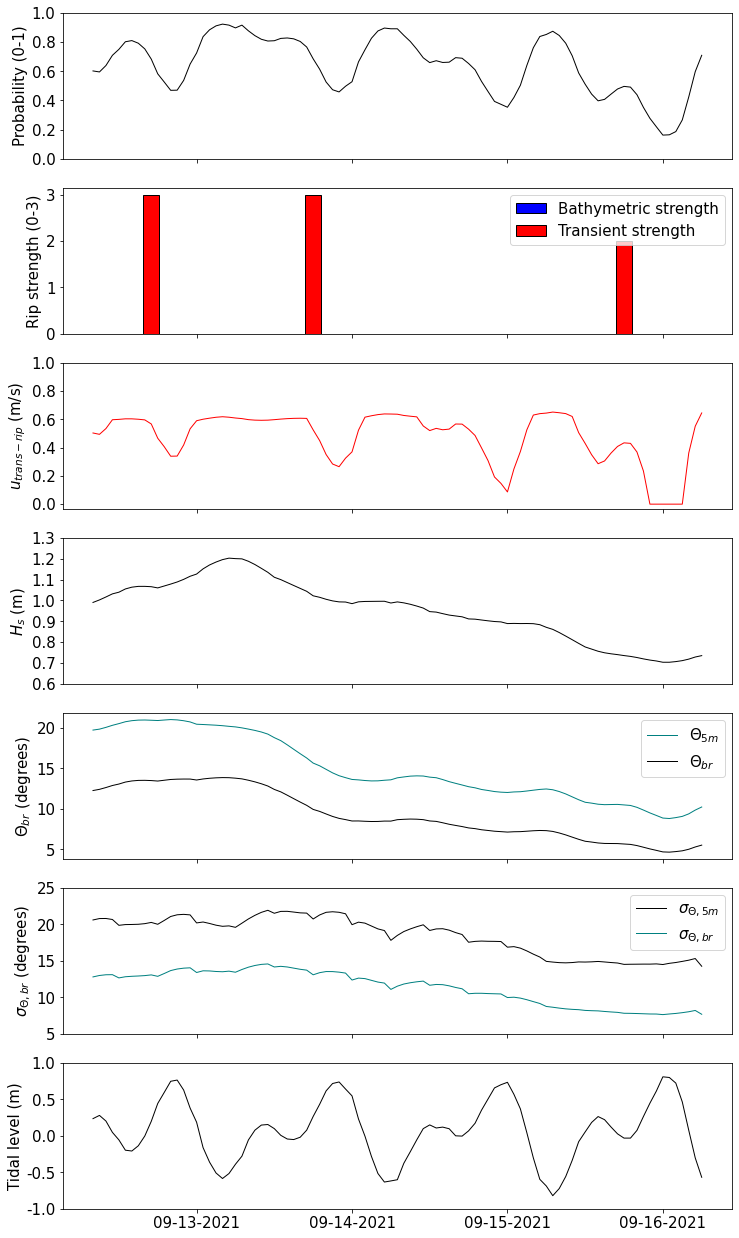

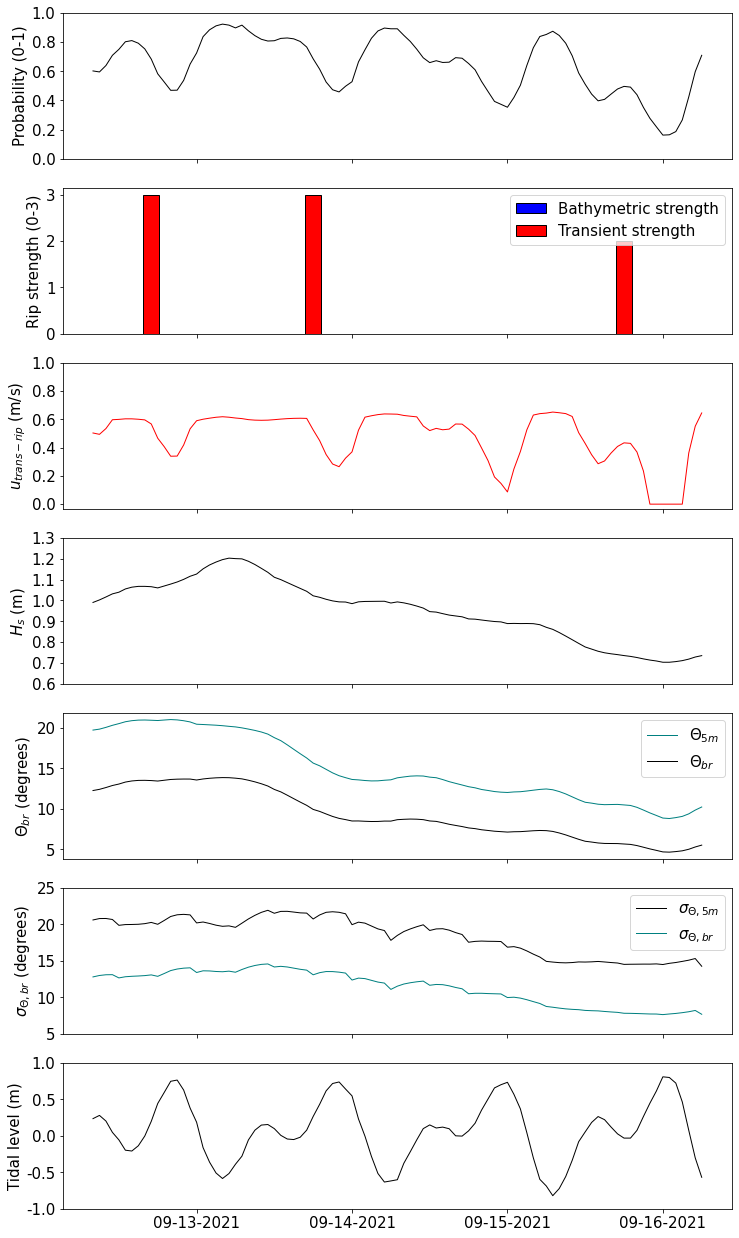

In [96]:
f, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(7, figsize=(12, 22), sharex=True, sharey=False)

test = np.arange(0,1.1,0.2)
test_str = [str(round(t, 1)) for t in test ]

test2 = np.arange(0, 4, 1)
test_str2 = [str(round(t, 1)) for t in test2 ]

test3 = np.arange(0, 1.1, 0.2)
test_str3 = [str(round(t, 1)) for t in test3 ]

test4 = np.arange(0.6, 1.4, 0.1)
test_str4 = [str(round(t, 1)) for t in test4 ]

test5 = np.arange(5, 25, 5)
test_str5 = [str(round(t, 1)) for t in test5 ]

test6 = np.arange(5, 26, 5)
test_str6 = [str(round(t, 1)) for t in test6 ]

test7 = np.arange(-1, 1.1, 0.5)
test_str7 = [str(round(t, 1)) for t in test7 ]

date_form = DateFormatter("%m-%d-%Y")
data['dates'] = pd.to_datetime(data['dates'])


ax1.plot(data['dates'].iloc[1760:1855], probability[1760:1855], linewidth = 1, color = 'black')
ax1.set_yticks(test)
ax1.set_yticklabels(test_str, fontsize=15)
ax1.set_ylabel("Probability (0-1)", fontsize = 15)

ax2.bar(data['dates'].iloc[1760:1855], bathystrength[1760:1855], width = 0.1, align="center", ec="black", color = 'blue')
ax2.bar(data['dates'].iloc[1760:1855], transstrength[1760:1855], width = 0.1, align="center", ec="black", color = 'red')
ax2.set_yticks(test2)
ax2.set_yticklabels(test_str2, fontsize=15)
ax2.legend(["Bathymetric strength", "Transient strength"], loc = 'upper right', fontsize = 15)
ax2.set_ylabel("Rip strength (0-3)", fontsize = 15)

ax3.plot(data['dates'].iloc[1760:1855], bathyspeed[1760:1855], color = 'red', linewidth = 1)
ax3.set_yticks(test3)
ax3.set_yticklabels(test_str3, fontsize=15)
ax3.set_ylabel("$u_{trans-rip}$ (m/s)", fontsize = 15)

ax4.plot(data['dates'].iloc[1760:1855], Hs[1760:1855], linewidth = 1, color = 'black')
ax4.set_yticks(test4)
ax4.set_yticklabels(test_str4, fontsize=15)
ax4.set_ylabel("$H_{s}$ (m)", fontsize = 15)

ax5.plot(data['dates'].iloc[1760:1855], origmwdsn[1760:1855], linewidth = 1, color = 'teal')
ax5.plot(data['dates'].iloc[1760:1855], mwdsn[1760:1855], linewidth = 1, color = 'black')
ax5.set_yticks(test5)
ax5.set_yticklabels(test_str5, fontsize=15)
ax5.legend(["$\Theta_{5m}$", "$\Theta_{br}$"], loc = 'upper right', fontsize = 15)
ax5.set_ylabel("$\Theta_{br}$ (degrees)", fontsize = 15)

ax6.plot(data['dates'].iloc[1760:1855], spread[1760:1855], linewidth = 1, color = 'black')
ax6.plot(data['dates'].iloc[1760:1855], counterspread[1760:1855], linewidth = 1, color = 'teal')
ax6.set_yticks(test6)
ax6.set_yticklabels(test_str6, fontsize=15)
ax6.legend(["$\sigma_{\Theta, 5m}$", "$\sigma_{\Theta, br}$"], loc = 'upper right', fontsize = 15)
ax6.set_ylabel("$\sigma_{\Theta, br}$ (degrees)", fontsize = 15)

ax7.tick_params(axis='both', which='major', labelsize=15)

ax7.plot(data['dates'].iloc[1760:1855], level[1760:1855], linewidth = 1, color = 'black')
ax7.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%Y'))
ax7.set_yticks(test7)
ax7.set_yticklabels(test_str7, fontsize=15)
ax7.set_ylabel("Tidal level (m)", fontsize = 15)
ax7.xaxis.set_major_locator(plt.MaxNLocator(5))


plt.savefig('transtime')



In [97]:
pbathyaverages = []

pbathyaverages.append((np.mean(np.asarray(ptenbathy))))
pbathyaverages.append((np.mean(np.asarray(pfifteenbathy))))
pbathyaverages.append((np.mean(np.asarray(ptwentybathy))))
pbathyaverages.append((np.mean(np.asarray(ptwentyfivebathy))))
pbathyaverages.append((np.mean(np.asarray(pthirtybathy))))
pbathyaverages.append((np.mean(np.asarray(pthirtyfivebathy))))
pbathyaverages.append((np.mean(np.asarray(pfortybathy))))
pbathyaverages.append((np.mean(np.asarray(pfortyfivebathy))))
pbathyaverages.append((np.mean(np.asarray(pfiftybathy))))
pbathyaverages.append((np.mean(np.asarray(pfiftybathy))))
pbathyaverages.append((np.mean(np.asarray(pfiftyfivebathy))))
pbathyaverages.append((np.mean(np.asarray(psixtybathy))))


In [98]:
ptransaverages = []

ptransaverages.append((np.mean(np.asarray(ptentrans))))
ptransaverages.append((np.mean(np.asarray(pfifteentrans))))
ptransaverages.append((np.mean(np.asarray(ptwentytrans))))
ptransaverages.append((np.mean(np.asarray(ptwentyfivetrans))))
ptransaverages.append((np.mean(np.asarray(pthirtytrans))))
ptransaverages.append((np.mean(np.asarray(pthirtyfivetrans))))
ptransaverages.append((np.mean(np.asarray(pfortytrans))))
ptransaverages.append((np.mean(np.asarray(pfortyfivetrans))))
ptransaverages.append((np.mean(np.asarray(pfiftytrans))))
ptransaverages.append((np.mean(np.asarray(pfiftytrans))))
ptransaverages.append((np.mean(np.asarray(pfiftyfivetrans))))
ptransaverages.append((np.mean(np.asarray(psixtytrans))))

In [99]:
pmaxaverages = []

pmaxaverages.append((np.mean(np.asarray(ptenmax))))
pmaxaverages.append((np.mean(np.asarray(pfifteenmax))))
pmaxaverages.append((np.mean(np.asarray(ptwentymax))))
pmaxaverages.append((np.mean(np.asarray(ptwentyfivemax))))
pmaxaverages.append((np.mean(np.asarray(pthirtymax))))
pmaxaverages.append((np.mean(np.asarray(pthirtyfivemax))))
pmaxaverages.append((np.mean(np.asarray(pfortymax))))
pmaxaverages.append((np.mean(np.asarray(pfortyfivemax))))
pmaxaverages.append((np.mean(np.asarray(pfiftymax))))
pmaxaverages.append((np.mean(np.asarray(pfiftymax))))
pmaxaverages.append((np.mean(np.asarray(pfiftyfivemax))))
pmaxaverages.append((np.mean(np.asarray(psixtymax))))

Text(0.5, 1.0, 'Proxy Observation Refinement Distribution')

Text(0.5, 1.0, 'Proxy Observation Refinement Distribution')

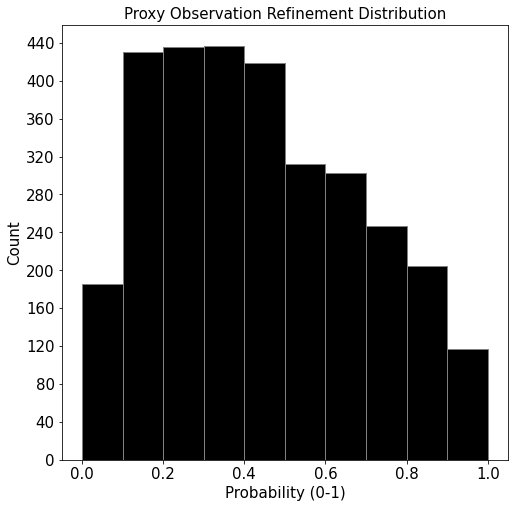

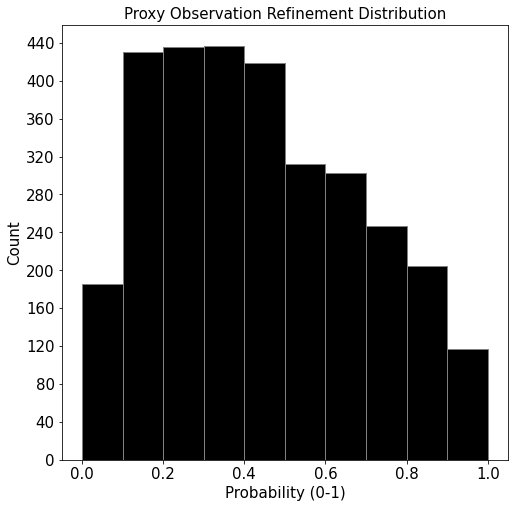

In [100]:
bincenter = [0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95]
proxyrefinement = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for i in range(len(dates)):
    if probability[i] >= 0 and probability[i] < 0.10:
        proxyrefinement[0]+= 1
    if probability[i] >= 0.10 and probability[i] < 0.20:
        proxyrefinement[1]+= 1
    if probability[i] >= 0.2 and probability[i] < 0.30:
        proxyrefinement[2]+= 1
    if probability[i] >= 0.3 and probability[i] < 0.40:
        proxyrefinement[3]+= 1
    if probability[i] >= 0.4 and probability[i] < 0.50:
        proxyrefinement[4]+= 1
    if probability[i] >= 0.5 and probability[i] < 0.60:
        proxyrefinement[5]+= 1
    if probability[i] >= 0.60 and probability[i] < 0.70:
        proxyrefinement[6]+= 1
    if probability[i] >= 0.7 and probability[i] < 0.80:
        proxyrefinement[7]+= 1
    if probability[i] >= .8 and probability[i] < 0.90:
        proxyrefinement[8]+= 1
    if probability[i] >= .9 and probability[i] < 1:
        proxyrefinement[9]+= 1
        
        
proxyrefinement
        
fig, ax = plt.subplots(nrows=1, figsize=(8,8))

test = np.arange(0,1.1,0.2)
test_str = [str(round(t, 1)) for t in test ]

test2 = np.arange(0,480,40)
test_str2 = [str(round(t, 1)) for t in test2 ]
    
plt.bar(bincenter, proxyrefinement, width = 0.1, align="center", color = 'black', ec="gray")
ax.set_xticks(test)
ax.set_yticks(test2)
ax.set_xticklabels(test_str, fontsize=15)
ax.set_yticklabels(test_str2, fontsize=15)
plt.xlabel("Probability (0-1)", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.title("Proxy Observation Refinement Distribution", fontsize = 15)

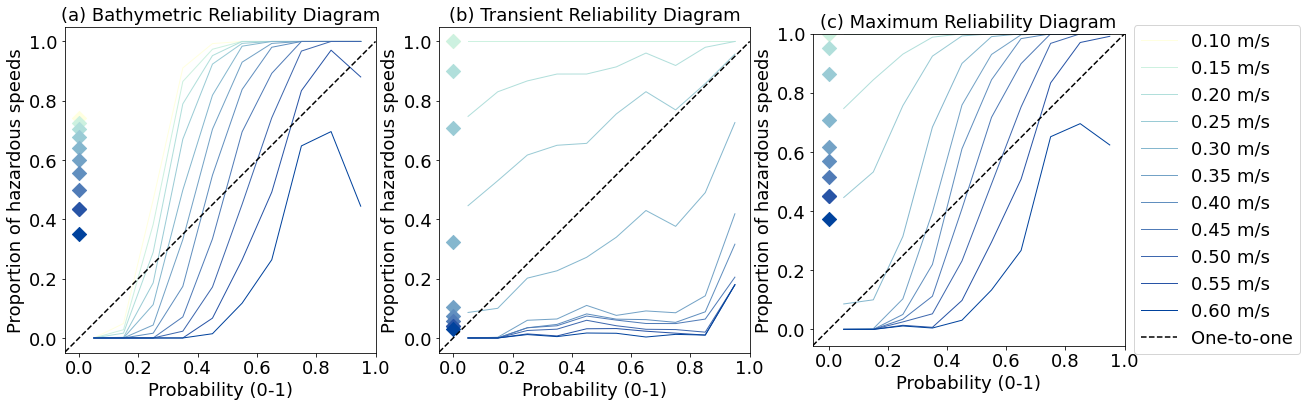

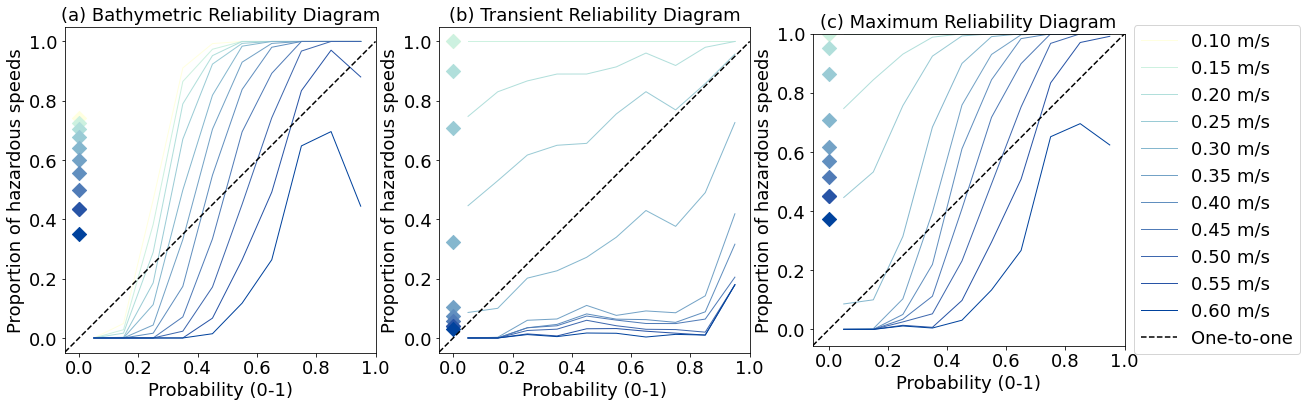

In [101]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize = (19, 6))

bincenter = [0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95]

test = np.arange(0,1.1,0.2)
test_str = [str(round(t, 1)) for t in test ]

plt.axis('square')


ax1.plot(bincenter, ptenbathy, linewidth = 1, color = '#ffffe0')
ax1.plot(bincenter, pfifteenbathy, linewidth = 1, color = '#cdf1e0')
ax1.plot(bincenter, ptwentybathy, linewidth = 1, color = '#b1dfdb')
ax1.plot(bincenter, ptwentyfivebathy, linewidth = 1, color = '#9acbd5')
ax1.plot(bincenter, pthirtybathy, linewidth = 1, color = '#85b7ce')
ax1.plot(bincenter, pthirtyfivebathy, linewidth = 1, color = '#73a2c6')
ax1.plot(bincenter, pfortybathy, linewidth = 1, color = '#618fbf')
ax1.plot(bincenter, pfortyfivebathy, linewidth = 1, color = '#507bb7')
ax1.plot(bincenter, pfiftybathy, linewidth = 1, color = '#3e67ae')
ax1.plot(bincenter, pfiftyfivebathy, linewidth = 1, color = '#2854a6')
ax1.plot(bincenter, psixtybathy, linewidth = 1, color = '#00429d')
ax1.axline((0, 0), slope=1, color = 'black', linestyle = 'dashed')
ax1.scatter(0, pbathyaverages[0], marker = 'D', s=100, color = '#ffffe0')
ax1.scatter(0, pbathyaverages[1], marker = 'D', s=100, color = '#cdf1e0')
ax1.scatter(0, pbathyaverages[2], marker = 'D', s=100, color = '#b1dfdb')
ax1.scatter(0, pbathyaverages[3], marker = 'D', s=100, color = '#9acbd5')
ax1.scatter(0, pbathyaverages[4], marker = 'D', s=100, color = '#85b7ce')
ax1.scatter(0, pbathyaverages[5], marker = 'D', s=100, color = '#73a2c6')
ax1.scatter(0, pbathyaverages[6], marker = 'D', s=100, color = '#618fbf')
ax1.scatter(0, pbathyaverages[7], marker = 'D', s=100, color = '#507bb7')
ax1.scatter(0, pbathyaverages[8], marker = 'D', s=100, color = '#3e67ae')
ax1.scatter(0, pbathyaverages[9], marker = 'D', s=100, color = '#2854a6')
ax1.scatter(0, pbathyaverages[10], marker = 'D', s=100, color = '#00429d')
ax1.set_xticks(test)
ax1.set_yticks(test)
ax1.set_xticklabels(test_str, fontsize=18)
ax1.set_yticklabels(test_str, fontsize=18)
ax1.set_title("(a) Bathymetric Reliability Diagram", fontsize=18)
ax1.set_xlabel("Probability (0-1)", fontsize=18)
ax1.set_ylabel("Proportion of hazardous speeds", fontsize=18)
ax1.set_aspect('equal', adjustable='box')


ax2.plot(bincenter, ptentrans, linewidth = 1, color = '#ffffe0')
ax2.plot(bincenter, pfifteentrans, linewidth = 1, color = '#cdf1e0')
ax2.plot(bincenter, ptwentytrans, linewidth = 1, color = '#b1dfdb')
ax2.plot(bincenter, ptwentyfivetrans, linewidth = 1, color = '#9acbd5')
ax2.plot(bincenter, pthirtytrans, linewidth = 1, color = '#85b7ce')
ax2.plot(bincenter, pthirtyfivetrans, linewidth = 1, color = '#73a2c6')
ax2.plot(bincenter, pfortytrans, linewidth = 1, color = '#618fbf')
ax2.plot(bincenter, pfortyfivetrans, linewidth = 1, color = '#507bb7')
ax2.plot(bincenter, pfiftytrans, linewidth = 1, color = '#3e67ae')
ax2.plot(bincenter, pfiftyfivetrans, linewidth = 1, color = '#2854a6')
ax2.plot(bincenter, psixtytrans, linewidth = 1, color = '#00429d')
ax2.axline((0, 0), slope=1, color = 'black', linestyle = 'dashed')
ax2.scatter(0, ptransaverages[0], marker = 'D', s=100, color = '#ffffe0')
ax2.scatter(0, ptransaverages[1], marker = 'D', s=100, color = '#cdf1e0')
ax2.scatter(0, ptransaverages[2], marker = 'D', s=100, color = '#b1dfdb')
ax2.scatter(0, ptransaverages[3], marker = 'D', s=100, color = '#9acbd5')
ax2.scatter(0, ptransaverages[4], marker = 'D', s=100, color = '#85b7ce')
ax2.scatter(0, ptransaverages[5], marker = 'D', s=100, color = '#73a2c6')
ax2.scatter(0, ptransaverages[6], marker = 'D', s=100, color = '#618fbf')
ax2.scatter(0, ptransaverages[7], marker = 'D', s=100, color = '#507bb7')
ax2.scatter(0, ptransaverages[8], marker = 'D', s=100, color = '#3e67ae')
ax2.scatter(0, ptransaverages[9], marker = 'D', s=100, color = '#2854a6')
ax2.scatter(0, ptransaverages[10], marker = 'D', s=100, color = '#00429d')
ax2.set_xticks(test)
ax2.set_yticks(test)
ax2.set_xticklabels(test_str, fontsize=18)
ax2.set_yticklabels(test_str, fontsize=18)
ax2.set_title("(b) Transient Reliability Diagram", fontsize=18)
ax2.set_xlabel("Probability (0-1)", fontsize=18)
ax2.set_ylabel("Proportion of hazardous speeds", fontsize=18)
ax2.set_aspect('equal', adjustable='box')



ax3.plot(bincenter, ptenmax, linewidth = 1, color = '#ffffe0')
ax3.plot(bincenter, pfifteenmax, linewidth = 1, color = '#cdf1e0')
ax3.plot(bincenter, ptwentymax, linewidth = 1, color = '#b1dfdb')
ax3.plot(bincenter, ptwentyfivemax, linewidth = 1, color = '#9acbd5')
ax3.plot(bincenter, pthirtymax, linewidth = 1, color = '#85b7ce')
ax3.plot(bincenter, pthirtyfivemax, linewidth = 1, color = '#73a2c6')
ax3.plot(bincenter, pfortymax, linewidth = 1, color = '#618fbf')
ax3.plot(bincenter, pfortyfivemax, linewidth = 1, color = '#507bb7')
ax3.plot(bincenter, pfiftymax, linewidth = 1, color = '#3e67ae')
ax3.plot(bincenter, pfiftyfivemax, linewidth = 1, color = '#2854a6')
ax3.plot(bincenter, psixtymax, linewidth = 1, color = '#00429d')
ax3.axline((0, 0), slope=1, color = 'black', linestyle = 'dashed')
ax3.scatter(0, pmaxaverages[0], marker = 'D', s=100, color = '#ffffe0')
ax3.scatter(0, pmaxaverages[1], marker = 'D', s=100, color = '#cdf1e0')
ax3.scatter(0, pmaxaverages[2], marker = 'D', s=100, color = '#b1dfdb')
ax3.scatter(0, pmaxaverages[3], marker = 'D', s=100, color = '#9acbd5')
ax3.scatter(0, pmaxaverages[4], marker = 'D', s=100, color = '#85b7ce')
ax3.scatter(0, pmaxaverages[5], marker = 'D', s=100, color = '#73a2c6')
ax3.scatter(0, pmaxaverages[6], marker = 'D', s=100, color = '#618fbf')
ax3.scatter(0, pmaxaverages[7], marker = 'D', s=100, color = '#507bb7')
ax3.scatter(0, pmaxaverages[8], marker = 'D', s=100, color = '#3e67ae')
ax3.scatter(0, pmaxaverages[9], marker = 'D', s=100, color = '#2854a6')
ax3.scatter(0, pmaxaverages[10], marker = 'D', s=100, color = '#00429d')
ax3.set_xticks(test)
ax3.set_yticks(test)
ax3.set_xticklabels(test_str, fontsize=18)
ax3.set_yticklabels(test_str, fontsize=18)
ax3.set_title("(c) Maximum Reliability Diagram", fontsize=18)
ax3.set_xlabel("Probability (0-1)", fontsize=18)
ax3.set_ylabel("Proportion of hazardous speeds", fontsize=18)
ax3.set_aspect('equal', adjustable='box')
ax3.legend(["0.10 m/s", "0.15 m/s", "0.20 m/s", "0.25 m/s", "0.30 m/s", "0.35 m/s", "0.40 m/s", "0.45 m/s", "0.50 m/s", "0.55 m/s", "0.60 m/s", "One-to-one"], fontsize=18, loc='center left', bbox_to_anchor=(1, 0.5))



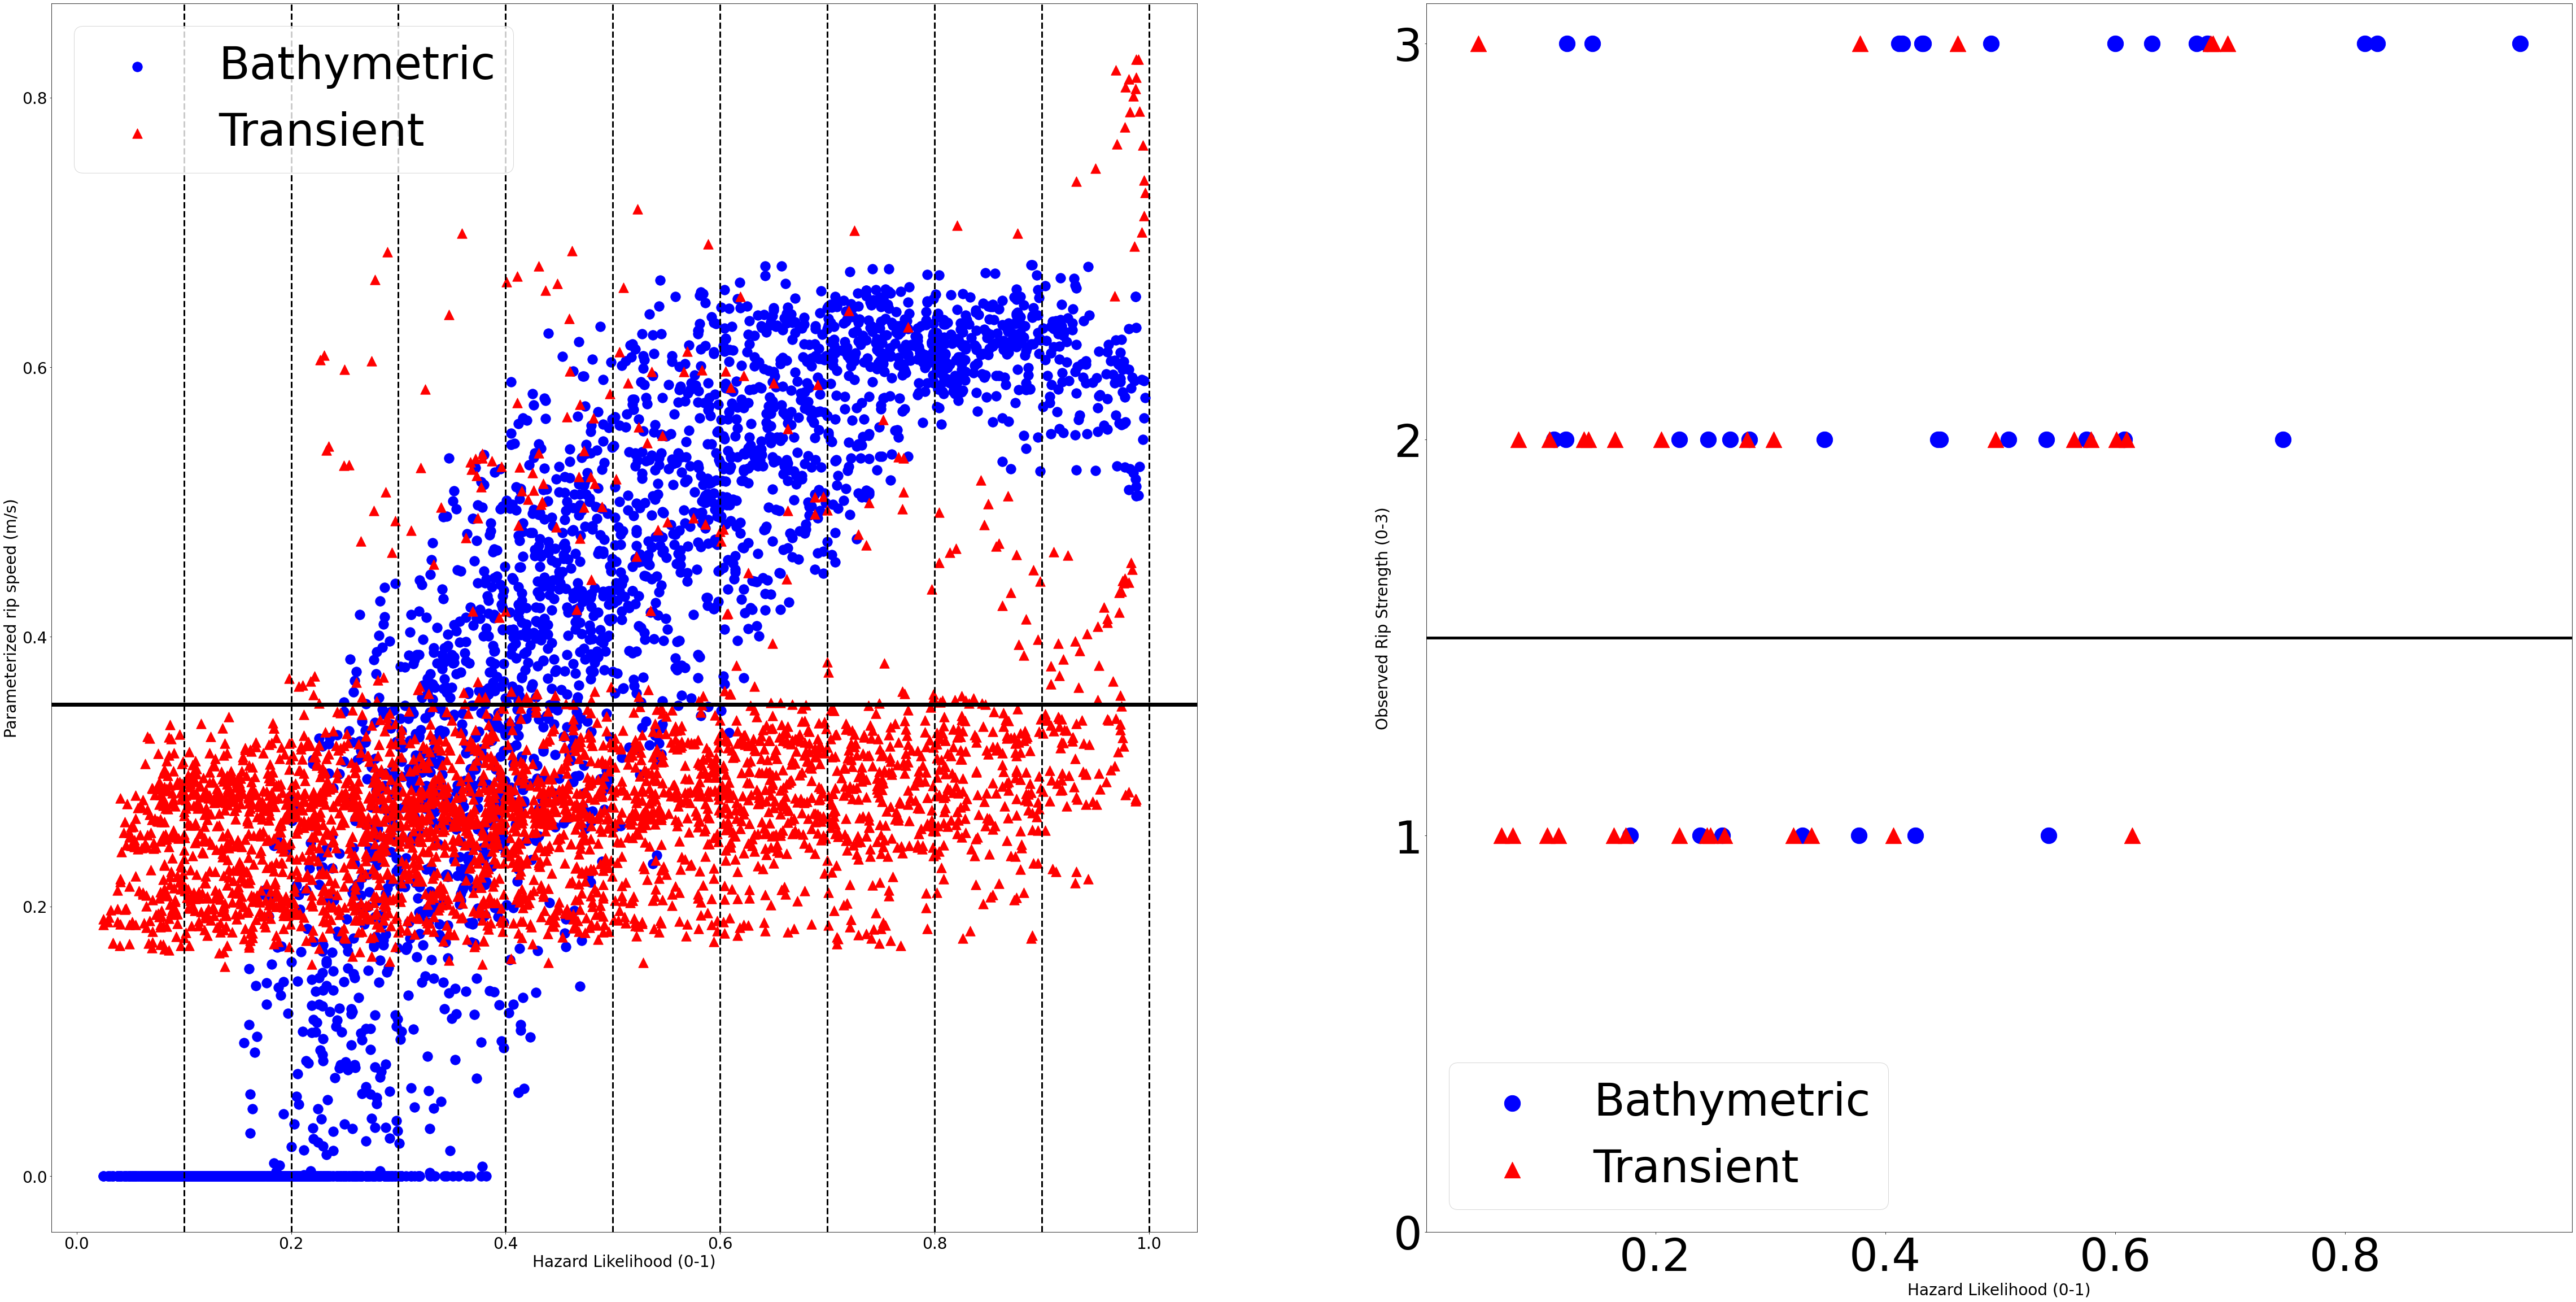

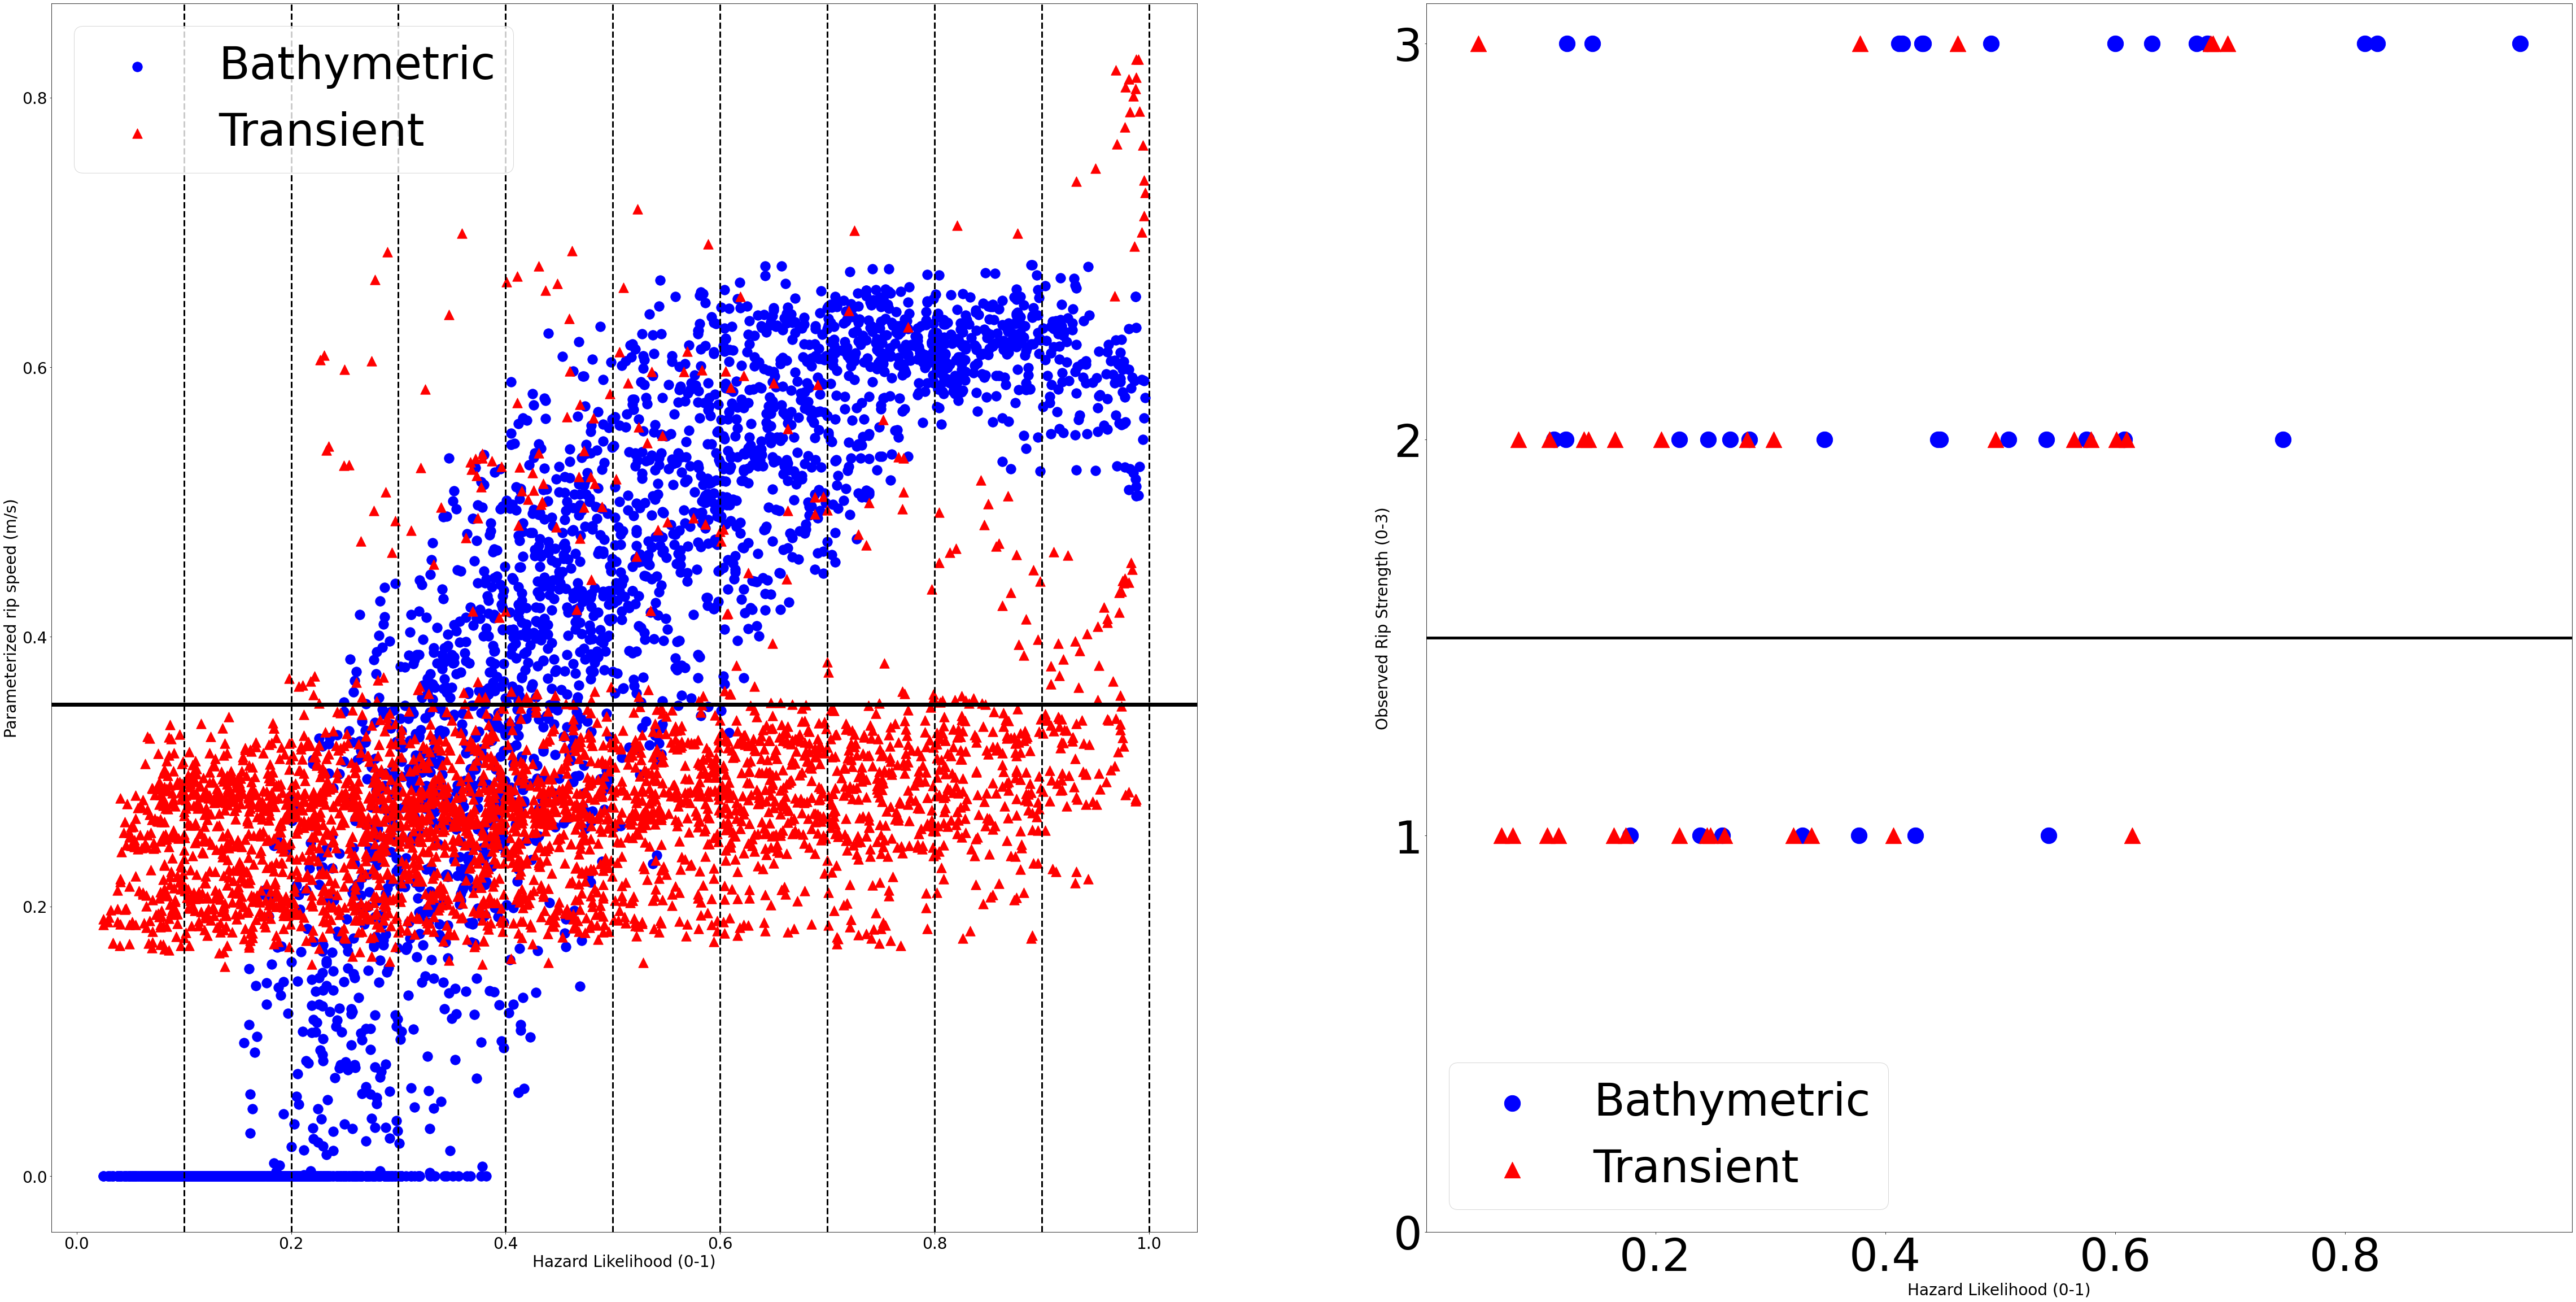

In [102]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (80, 40))

plt.rcParams['font.size'] = '80'
plt.tick_params(axis='both', which='major', labelsize=80)
plt.tick_params(axis='both', which='minor', labelsize=80)


ax1.scatter(probability, bathyspeed, color = 'blue', marker = 'o', s=300)
ax1.scatter(probability, transspeed, color = 'red', marker = '^', s=300)
ax1.axvline(x = 0.1, linestyle = '--', color = 'black', linewidth = 3)
ax1.axvline(x = 0.2, linestyle = '--', color = 'black', linewidth = 3)
ax1.axvline(x = 0.3, linestyle = '--', color = 'black', linewidth = 3)
ax1.axvline(x = 0.4, linestyle = '--', color = 'black', linewidth = 3)
ax1.axvline(x = 0.5, linestyle = '--', color = 'black', linewidth = 3)
ax1.axvline(x = 0.6, linestyle = '--', color = 'black', linewidth = 3)
ax1.axvline(x = 0.7, linestyle = '--', color = 'black', linewidth = 3)
ax1.axvline(x = 0.8, linestyle = '--', color = 'black', linewidth = 3)
ax1.axvline(x = 0.9, linestyle = '--', color = 'black', linewidth = 3)
ax1.axvline(x = 1, linestyle = '--', color = 'black', linewidth = 3)
ax1.axhline(y = 0.35, color = 'black', linewidth = 7)
ax1.set_xlabel("Hazard Likelihood (0-1)")
ax1.set_ylabel("Parameterized rip speed (m/s)")
ax1.legend(["Bathymetric", "Transient"])

ax2.scatter(probability, bathystrength, color = 'blue', marker = 'o', s=800)
ax2.scatter(probability, transstrength, color = 'red', marker = '^', s=800)
ax2.axhline(y=1.5, color = 'black', linewidth = 5)
ax2.set_yticks(np.arange(0, 3.1, 1.0))
ax2.set_xlabel("Hazard Likelihood (0-1)")
ax2.set_ylabel("Observed Rip Strength (0-3)")
ax2.legend(["Bathymetric", "Transient"])

In [103]:
add = 0
for i in range(len(transindices)):
    add += probability[i]
add/=len(transindices)

print(add)

0.3707575757575758
0.3707575757575758


In [104]:
add = 0
for i in range(len(bathyindices)):
    add += probability[i]
add/=len(bathyindices)

print(add)

0.3716571428571429
0.3716571428571429


In [105]:
lgbathyproportions

[1.0,
 0.75,
 0.5555555555555556,
 0.6923076923076923,
 0.75,
 0.875,
 1.0,
 1.0,
 1.0,
 1.0]

[1.0,
 0.75,
 0.5555555555555556,
 0.6923076923076923,
 0.75,
 0.875,
 1.0,
 1.0,
 1.0,
 1.0]

In [106]:
lgtransproportions

[0.5555555555555556,
 0.4,
 0.3333333333333333,
 0.42857142857142855,
 0.75,
 0.8571428571428571,
 0.875,
 1.0,
 nan,
 nan]

[0.5555555555555556,
 0.4,
 0.3333333333333333,
 0.42857142857142855,
 0.75,
 0.8571428571428571,
 0.875,
 1.0,
 nan,
 nan]

In [107]:
lgoverallproportions

[0.6923076923076923,
 0.5217391304347826,
 0.42857142857142855,
 0.6190476190476191,
 0.7647058823529411,
 0.8666666666666667,
 0.9333333333333333,
 1.0,
 0.6666666666666666,
 0.5]

[0.6923076923076923,
 0.5217391304347826,
 0.42857142857142855,
 0.6190476190476191,
 0.7647058823529411,
 0.8666666666666667,
 0.9333333333333333,
 1.0,
 0.6666666666666666,
 0.5]

In [108]:
data.to_csv('proxy', index = True, header = True)

In [109]:
lifeguard.to_csv('lifeguard', index = True, header = True)

In [110]:
res = [idx for idx, val in enumerate(riptype) if riptype[idx] == 2]
print(res)



values = []
for i in range(len(res)):
    use = res[i]
    values.append(probability[use])
    
print(values)

print(np.min(np.asarray(values)))
print(np.max(np.asarray(values)))
print(np.mean(np.asarray(values)))


[184, 608, 1050, 1093, 1122, 1170, 1287, 1383, 1528, 1554, 1675, 1698, 1722, 1769, 1794, 1842, 1914, 1937, 1969, 2052, 2130, 2152, 2223, 2251, 2270, 2299, 2390, 2440, 2605, 2633, 2729, 2917, 3040]
[0.698, 0.046, 0.205, 0.564, 0.40700000000000003, 0.46299999999999997, 0.336, 0.615, 0.106, 0.221, 0.076, 0.081, 0.066, 0.6829999999999999, 0.685, 0.496, 0.138, 0.174, 0.61, 0.579, 0.248, 0.37799999999999995, 0.303, 0.28, 0.26, 0.245, 0.142, 0.601, 0.10800000000000001, 0.11599999999999999, 0.32, 0.16399999999999998, 0.165]
0.046
0.698
0.3205757575757575
[184, 608, 1050, 1093, 1122, 1170, 1287, 1383, 1528, 1554, 1675, 1698, 1722, 1769, 1794, 1842, 1914, 1937, 1969, 2052, 2130, 2152, 2223, 2251, 2270, 2299, 2390, 2440, 2605, 2633, 2729, 2917, 3040]
[0.698, 0.046, 0.205, 0.564, 0.40700000000000003, 0.46299999999999997, 0.336, 0.615, 0.106, 0.221, 0.076, 0.081, 0.066, 0.6829999999999999, 0.685, 0.496, 0.138, 0.174, 0.61, 0.579, 0.248, 0.37799999999999995, 0.303, 0.28, 0.26, 0.245, 0.142, 0.601, 0

In [111]:
transspread = []
transprob = []
for i in range(len(transindices)):
    use = transindices[i]
    transspread.append(spread[use])
    transprob.append(probability[use])
    
bathyspread = []
bathyprob = []

for i in range(len(bathyindices)):
    use = bathyindices[i]
    bathyspread.append(spread[use])
    bathyprob.append(probability[use])

In [112]:
print(np.min(np.asarray(transprob)))
print(np.mean(np.asarray(transprob)))
print(np.max(np.asarray(transprob)))

0.046
0.3205757575757575
0.698
0.046
0.3205757575757575
0.698


In [113]:
print(np.min(np.asarray(bathyprob)))
print(np.mean(np.asarray(bathyprob)))
print(np.max(np.asarray(bathyprob)))

0.11199999999999999
0.4412857142857143
0.9520000000000001
0.11199999999999999
0.4412857142857143
0.9520000000000001


In [114]:
print(np.min(np.asarray(transspread)))
print(np.mean(np.asarray(transspread)))
print(np.max(np.asarray(transspread)))

14.519
21.084051515151515
27.4897
14.519
21.084051515151515
27.4897


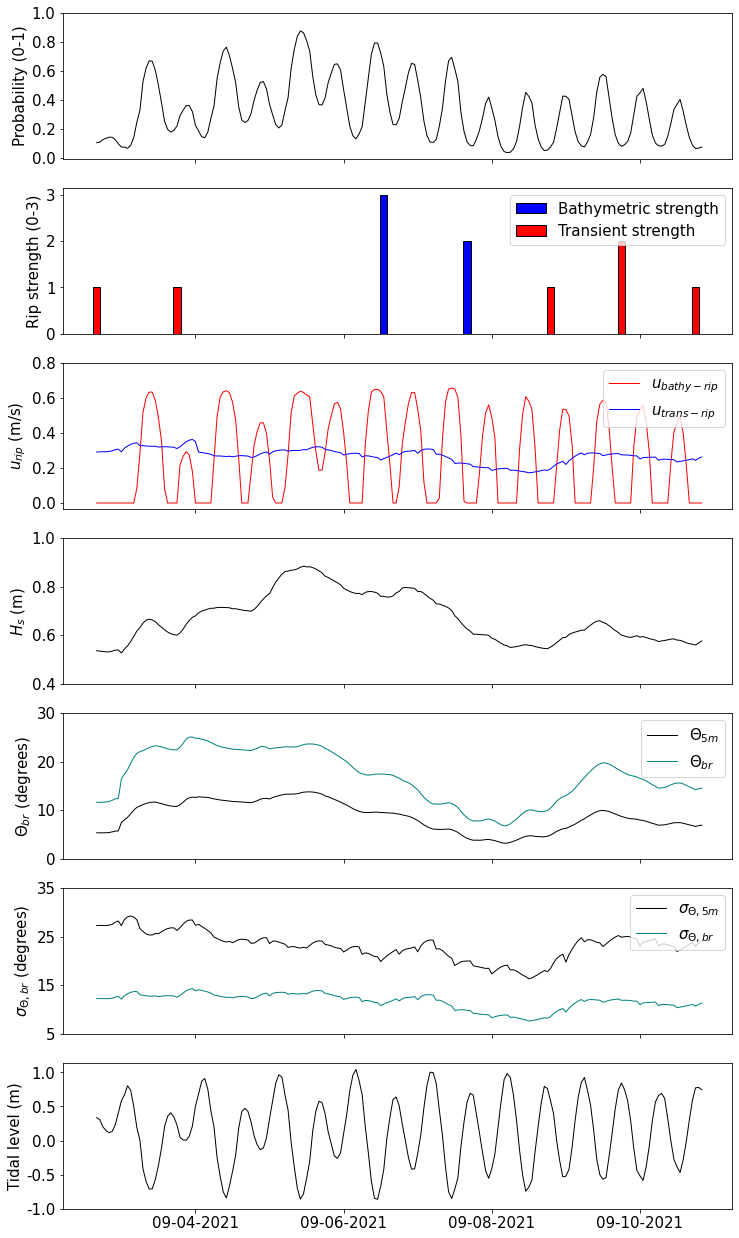

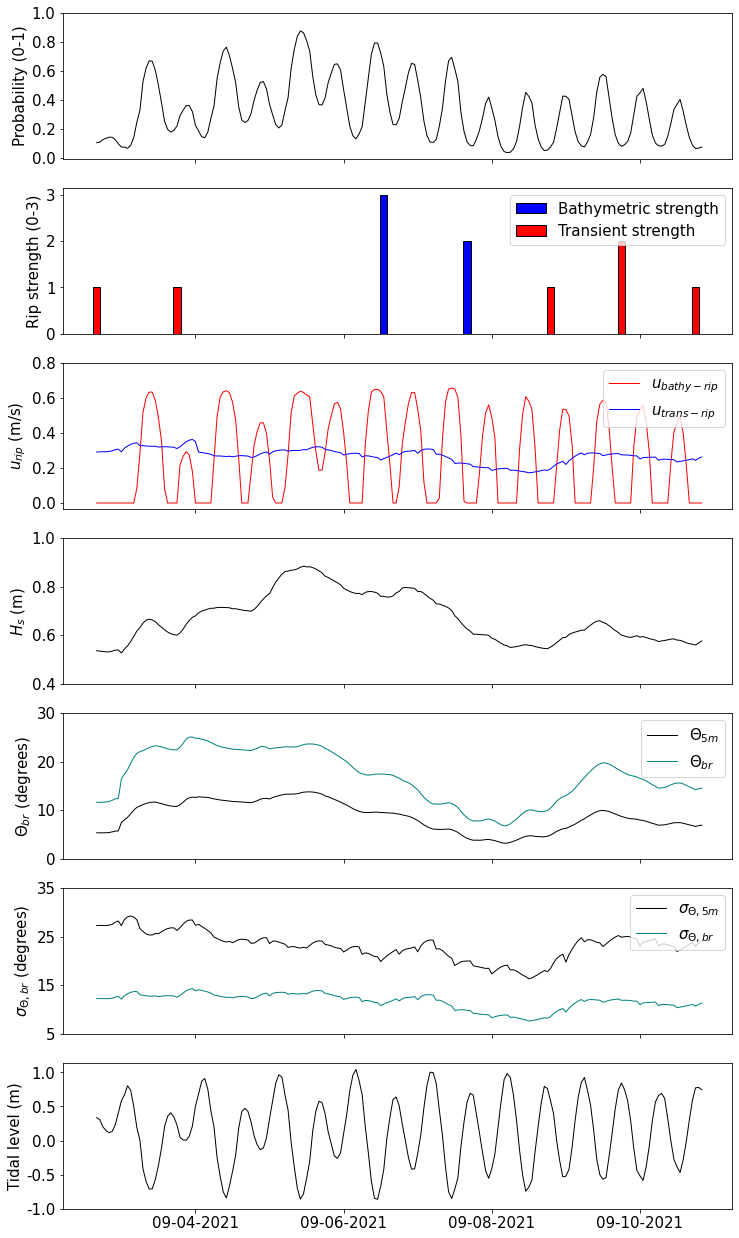

In [118]:
f, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(7, figsize=(12, 22), sharex=True, sharey=False)

test = np.arange(0,1.1,0.2)
test_str = [str(round(t, 1)) for t in test ]

test2 = np.arange(0, 4, 1)
test_str2 = [str(round(t, 1)) for t in test2 ]

test3 = np.arange(0, 0.9, 0.2)
test_str3 = [str(round(t, 1)) for t in test3 ]

test4 = np.arange(0.4, 1.1, 0.2)
test_str4 = [str(round(t, 1)) for t in test4 ]

test5 = np.arange(0, 31, 10)
test_str5 = [str(round(t, 1)) for t in test5 ]

test6 = np.arange(5, 41, 10)
test_str6 = [str(round(t, 1)) for t in test6 ]

test7 = np.arange(-1, 1.1, 0.5)
test_str7 = [str(round(t, 1)) for t in test7 ]

date_form = DateFormatter("%m-%d-%Y")
data['dates'] = pd.to_datetime(data['dates'])

ax1.plot(data['dates'].iloc[1528:1725], probability[1528:1725], linewidth = 1, color = 'black')
ax1.set_yticks(test)
ax1.set_yticklabels(test_str, fontsize=15)
ax1.set_ylabel("Probability (0-1)", fontsize = 15)

ax2.bar(data['dates'].iloc[1528:1725], bathystrength[1528:1725], width = 0.1, align="center", ec="black", color = 'blue')
ax2.bar(data['dates'].iloc[1528:1725], transstrength[1528:1725], width = 0.1, align="center", ec="black", color = 'red')
ax2.set_yticks(test2)
ax2.set_yticklabels(test_str2, fontsize=15)
ax2.legend(["Bathymetric strength", "Transient strength"], loc = 'upper right', fontsize = 15)
ax2.set_ylabel("Rip strength (0-3)", fontsize = 15)

ax3.plot(data['dates'].iloc[1528:1725], bathyspeed[1528:1725], color = 'red', linewidth = 1)
ax3.plot(data['dates'].iloc[1528:1725], transspeed[1528:1725], color = 'blue', linewidth = 1)
ax3.set_yticks(test3)
ax3.set_yticklabels(test_str3, fontsize=15)
ax3.legend(["$u_{bathy-rip}$", "$u_{trans-rip}$"], loc = 'upper right', fontsize = 15)
ax3.set_ylabel("$u_{rip}$ (m/s)", fontsize = 15)

ax4.plot(data['dates'].iloc[1528:1725], Hs[1528:1725], linewidth = 1, color = 'black')
ax4.set_yticks(test4)
ax4.set_yticklabels(test_str4, fontsize=15)
ax4.set_ylabel("$H_{s}$ (m)", fontsize = 15)

ax5.plot(data['dates'].iloc[1528:1725], mwdsn[1528:1725], linewidth = 1, color = 'black')
ax5.plot(data['dates'].iloc[1528:1725], origmwdsn[1528:1725], linewidth = 1, color = 'teal')
ax5.set_yticks(test5)
ax5.set_yticklabels(test_str5, fontsize=15)
ax5.legend(["$\Theta_{5m}$", "$\Theta_{br}$"], loc = 'upper right', fontsize = 15)
ax5.set_ylabel("$\Theta_{br}$ (degrees)", fontsize = 15)

ax6.plot(data['dates'].iloc[1528:1725], spread[1528:1725], linewidth = 1, color = 'black')
ax6.plot(data['dates'].iloc[1528:1725], counterspread[1528:1725], linewidth = 1, color = 'teal')
ax6.set_yticks(test6)
ax6.set_yticklabels(test_str6, fontsize=15)
ax6.legend(["$\sigma_{\Theta, 5m}$", "$\sigma_{\Theta, br}$"], loc = 'upper right', fontsize = 15)
ax6.set_ylabel("$\sigma_{\Theta, br}$ (degrees)", fontsize = 15)

ax7.tick_params(axis='both', which='major', labelsize=15)

ax7.plot(data['dates'].iloc[1528:1725], level[1528:1725], linewidth = 1, color = 'black')
ax7.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%Y'))
ax7.set_yticks(test7)
ax7.set_yticklabels(test_str7, fontsize=15)
ax7.set_ylabel("Tidal level (m)", fontsize = 15)
ax7.xaxis.set_major_locator(plt.MaxNLocator(5))


plt.savefig('transtime')





In [116]:
 from sklearn.linear_model import LinearRegression

In [140]:
x = mwdsn.reshape((-1, 1))
y = spread

In [141]:
model = LinearRegression().fit(x, y)

In [142]:
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.0022068964733898966
coefficient of determination: 0.0022068964733898966


In [143]:
print(f"slope: {model.coef_}")

slope: [-0.04196727]
slope: [-0.04196727]


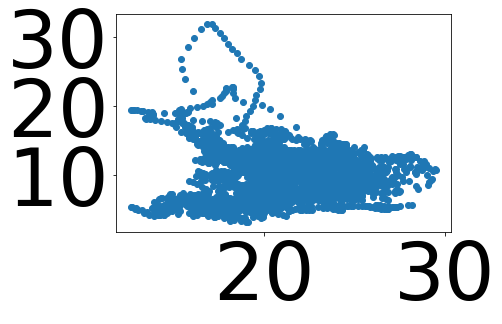

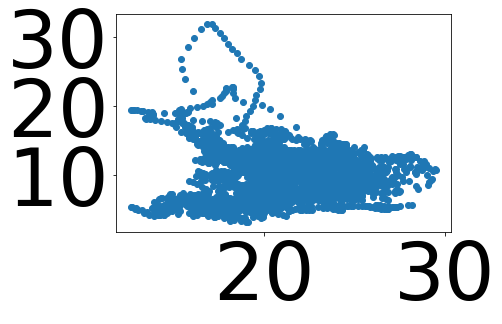

In [129]:
plt.scatter(spread, mwdsn)

In [134]:
import scipy

In [135]:
from scipy.stats import pearsonr

In [137]:
corr, _ = pearsonr(spread, mwdsn)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.047
Pearsons correlation: -0.047
